In [ ]:
!pip install imbalanced-learn

 **PREDICCIÓN DE DIABETES EN MUJERES DE LA COMUNIDAD PIMA**

# **Estructura general del proyecto en Google Colab + Drive: organización del proyecto y guardado de datos**





Antes de comenzar con el análisis y procesamiento de datos, se establece una estructura ordenada de carpetas dentro de Google Drive para facilitar la trazavilidad, evolución y comprensión por otros. Esto permite separar claramente los datos originales, los datos procesados, los modelos entrenados, los pipelines y los resultados.

Esta organización facilitará el seguimiento del proyecto, su mantenimiento y posibles mejoras o reutilización en el futuro.

**Estructura del proyecto:**

Se crean carpetas de almacenamiento de los diferentes documentos del proyecto.
- datos_originales/: Contiene el dataset original cargado.
- datos_procesados/: Aquí se almacenarán los conjuntos X_train, X_test, y_train y y_test ya procesados.
- pipelines/: Guardaremos aquí los pipelines de procesamiento y modelado.(.joblib)
- modelos/: Se almacenarán los modelos entrenados (.pkl).
- modelos optimizados/: Modelos tras GridSearch (.pkl)
- resultados/: Métricas, visualizaciones (gráficas ROC, matrices, tablas comparativas, etc.) (.png. .csv)
- notebooks/: versiones del notebook organizadas por fases del proyecto.

Esto permite reiniciar y continuar el proyecto en cualquier momento con total control.

El siguiente bloque mueve automáticamente los archivos generados en /content a su carpeta correspondiente en Drive.
- Ver qué archivos hay en /content`
- Moverlos automáticamente a su carpeta correspondiente

## **Estructura del proyecto y guardado de datos**

### **Cargar las librerias y montar Google Drive**

In [ ]:
from google.colab import drive
import os
import shutil
from datetime import datetime
import pandas as pd

# 1. Montar Google Drive
drive.mount('/content/drive')

# 2. Ruta base de tu proyecto
base_path = "/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes"

# 3. Carpetas principales
folders = [
    "datos_originales", # (dataset original descargado)
    "datos_procesados", #(división en subcarpetas específicas)
    "pipelines",
    "modelos",
    "modelos_optimizados",
    "resultados",
    "notebooks"
]

# 4. Subcarpetas dentro de datos_procesados
subfolders_datos_procesados = [
    "original", # (división inicial: X_train, X_test, y_train, y_test)
    "limpieza", #  (X_train_procesado → ceros a NaN)
    "imputado",
    "escalado",
    "smote",
    "final",
    "backup" #asegura que se trabaja siempre con las últimas versiones definitivas de los datos transformados y listos para modelado.
]

# 5. Crear carpetas principales
for folder in folders:
    os.makedirs(os.path.join(base_path, folder), exist_ok=True)

# 6. Crear subcarpetas dentro de datos_procesados
for sub in subfolders_datos_procesados:
    os.makedirs(os.path.join(base_path, "datos_procesados", sub), exist_ok=True)

# 7. Confirmación visual
print("Estructura de carpetas creada correctamente:")
print(" Carpeta base:", base_path)
print(" Subcarpetas:")
print(os.listdir(base_path))

In [ ]:
print("Contenido en datos_procesados:")
print(os.listdir(os.path.join(base_path, "datos_procesados")))

### **Crear rutas directas a las carpetas**

In [ ]:
import shutil

# Rutas base
base_path = "/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes"
ruta_datos_procesados = os.path.join(base_path, "datos_procesados")
ruta_datos_originales = os.path.join(base_path, "datos_originales")
ruta_modelos = os.path.join(base_path, "modelos")
ruta_modelos_opt = os.path.join(base_path, "modelos_optimizados")
ruta_pipelines = os.path.join(base_path, "pipelines")
ruta_resultados = os.path.join(base_path, "resultados")
ruta_notebooks = os.path.join(base_path, "notebooks")

# Archivos que hay en el entorno de trabajo (Colab '/content')
archivos = os.listdir("/content")

# Clasificar y mover
for archivo in archivos:
    ruta_origen = os.path.join("/content", archivo)

    if archivo.endswith(".csv"):
        shutil.move(ruta_origen, os.path.join(ruta_datos_procesados, archivo))
    elif archivo.endswith(".pkl"):
        destino = ruta_modelos_opt if "optimizado" in archivo else ruta_modelos
        shutil.move(ruta_origen, os.path.join(destino, archivo))
    elif archivo.endswith(".png") or archivo.endswith(".jpg"):
        shutil.move(ruta_origen, os.path.join(ruta_resultados, archivo))
    elif archivo.endswith(".joblib"):
        shutil.move(ruta_origen, os.path.join(ruta_pipelines, archivo))
    elif archivo.endswith(".ipynb"):
        shutil.move(ruta_origen, os.path.join(ruta_notebooks, archivo))
    elif "original" in archivo.lower() or archivo.endswith((".gsheet", ".xlsx")):
        shutil.move(ruta_origen, os.path.join(ruta_datos_originales, archivo))

print(" Todos los archivos han sido organizados correctamente.")

### **Reubicación automática de archivos**

En este bloque se revisan todos los archivos generados en /content al volver a cargar el notebook, y se mueven automáticamente a su carpeta correspondiente dentro del proyecto.

Esto asegura que no queden archivos sueltos y que todo esté correctamente guardado para la continuidad del proyecto.

In [ ]:
# Reubicar archivos generados automáticamente al volver a ejecutar el notebook
import shutil

# 1. Revisar los archivos que hay en /content
archivos_content = os.listdir("/content")
print("Archivos en /content antes de mover:")
for archivo in archivos_content:
    print(" -", archivo)

# 2. Clasificación y movimiento
for archivo in archivos_content:
    ruta_origen = os.path.join("/content", archivo)

    if archivo.endswith(".csv"):
        shutil.move(ruta_origen, os.path.join(ruta_datos_procesados, archivo))
    elif archivo.endswith(".pkl"):
        destino = ruta_modelos_opt if "optimizado" in archivo else ruta_modelos
        shutil.move(ruta_origen, os.path.join(destino, archivo))
    elif archivo.endswith(".png") or archivo.endswith(".jpg"):
        shutil.move(ruta_origen, os.path.join(ruta_resultados, archivo))
    elif archivo.endswith(".joblib"):
        shutil.move(ruta_origen, os.path.join(ruta_pipelines, archivo))
    elif archivo.endswith(".ipynb"):
        shutil.move(ruta_origen, os.path.join(base_path, "notebooks", archivo))
    elif "original" in archivo.lower() or archivo.endswith((".gsheet", ".xlsx")):
        shutil.move(ruta_origen, os.path.join(ruta_datos_originales, archivo))

print(" Todos los archivos han sido organizados correctamente.")

## **Crear archivo para Trazabilidad de los archivos del proyecto: trazabilidad_archivos_proyecto.csv**

Este bloque genera un archivo.csv con todos los archivos presentes en cada carpeta del proyecto (datos, modelos, pipelines, resultados, notebooks), incluyendo una marca de tiempo en el nombre del archivo.

Esto permite guardar versiones diarias y comparar cambios en el proyecto.

El archivo se guarda en: resultados/trazabilidad_archivos_proyecto_YYYYMMDD_HHMM.csv

In [ ]:
# Crear diccionario con carpetas relevantes
carpetas_a_rastrear = {
    "datos_originales": ruta_datos_originales,
    "datos_procesados": ruta_datos_procesados,
    "modelos": ruta_modelos,
    "modelos_optimizados": ruta_modelos_opt,
    "pipelines": ruta_pipelines,
    "resultados": ruta_resultados,
    "notebooks": os.path.join(base_path, "notebooks"),
}

# Recoger los archivos de cada carpeta
contenido = {"Carpeta": [], "Archivo": []}

for nombre_carpeta, ruta in carpetas_a_rastrear.items():
    try:
        archivos = os.listdir(ruta)
        for archivo in archivos:
            contenido["Carpeta"].append(nombre_carpeta)
            contenido["Archivo"].append(archivo)
    except Exception as e:
        print(f" Error leyendo {nombre_carpeta}: {e}")

# Crear DataFrame
df_trazabilidad = pd.DataFrame(contenido)

# Obtener fecha y hora actual
fecha_actual = datetime.now().strftime("%Y%m%d_%H%M")

# Nombre con marca de tiempo
nombre_archivo = f"trazabilidad_archivos_proyecto_{fecha_actual}.csv"

# Guardar en .csv dentro de la carpeta resultados
ruta_guardado = os.path.join(ruta_resultados, "trazabilidad_archivos_proyecto.csv")
df_trazabilidad.to_csv(ruta_guardado, index=False)

print(" Trazabilidad guardada correctamente en:", ruta_guardado)

# **Definición del problema y contexto del dataset**

## 1 Objetivo del proyecto

El objetivo de este proyecto es **predecir la presencia de diabetes** en pacientes en función de diferentes características médicas como:

- Edad  
- Nivel de glucosa en sangre  
- Presión arterial  
- Índice de Masa Corporal (IMC)  
- Función del pedigrí de la diabetes (factor genético)
- Embarazos
- Presión arterial (diastólica)
- Insulina

El modelo pretende ayudar en la **detección temprana** y permitir una mejor **gestión del riesgo** en personas con posibles indicios de desarrollar esta enfermedad.

## 2 Importancia del problema

La diabetes es una enfermedad crónica de gran prevalencia que puede tener consecuencias graves si no se detecta y trata a tiempo: enfermedades cardiovasculares, daño renal, pérdida de visión, entre otras.

Desarrollar un modelo predictivo puede aportar beneficios clave:

- **Detección temprana** de casos de alto riesgo  
- **Apoyo a profesionales** para una mejor toma de decisiones  
- **Optimización de recursos** en pruebas médicas  
- **Mejora de programas de salud pública y prevención**

## 3 ¿Quién se beneficiaría?

- **Profesionales de la salud**: apoyo en diagnóstico y priorización de pacientes  
- **Pacientes y ciudadanos**: conocer su riesgo y actuar preventivamente  
- **Instituciones de salud pública**: campañas de prevención más dirigidas  

## 4 Soluciones actuales vs. modelo propuesto

Actualmente, la diabetes se diagnostica con análisis clínicos como la glucosa en sangre. Sin embargo, estos diagnósticos suelen realizarse cuando los síntomas ya están presentes.

Un modelo predictivo podría:

- Estimar el riesgo antes de que se manifiesten síntomas  
- Priorizar la atención en poblaciones de riesgo  
- Automatizar parte del análisis de grandes volúmenes de datos  
- Complementar el diagnóstico clínico, **sin sustituirlo**

## 5 Enfoque de Machine Learning

- **Tipo de problema**: Clasificación supervisada  
- **Etiquetas disponibles**:  
  - 1: paciente con diabetes  
  - 0: paciente sin diabetes  
- **Entrada esperada**: Variables clínicas cuantitativas
- **Modelo a entrenar**: Clasificador que predice si una persona tiene o no diabetes a partir de sus variables médicas

## 6 Evaluación del rendimiento del modelo

Las métricas principales que se utilizarán para evaluar el rendimiento serán:

- Accuracy (Exactitud)  
- Precision (Precisión)  
- Recall (Sensibilidad)  
- F1-score  
- ROC-AUC  

Un objetivo razonable es lograr un modelo con **recall elevado**, para minimizar falsos negativos (riesgo no detectado).

## 7 Supuestos iniciales

- Los datos son representativos y no presentan sesgos importantes, aunque se revisará esto.  
- No hay información personal identificable (dataset anonimizado).  
- La distribución de clases está desbalanceada.  
- Se asume que algunos valores cero en variables como Glucosa o Insulina representan **valores faltantes**, no datos reales.  
- Se detectarán y tratarán valores extremos o inconsistentes.  
- La población es limitada a mujeres de etnia indígena Pima, lo que puede no generalizar bien a otras poblaciones.

## 8 Procedencia del dataset

- **Fuente**: Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales (EE.UU.)  
- **Publicado en**: Kaggle  
- **Contexto**: Estudios clínicos en Phoenix, Arizona  
- **Población**: Mujeres de ascendencia india Pima, mayores de 21 años  
- **Formato**: CSV  
- **Tamaño**: 768 registros y 9 columnas  
- **Acceso**: Libre y sin restricciones  
- **Contenido**: Datos anónimos (sin información personal)
- **Variables**: 8 predictoras + 1 variable objetivo (`Outcome`)

## 9 Descripción de las variables

### Variables predictoras (`X`)

- Pregnancies: Número de embarazos  
  _ Relacionado con riesgo de diabetes gestacional y futura diabetes tipo 2_

- Glucose: Concentración de glucosa en sangre tras prueba de tolerancia  
  _ Indicador clave para diagnóstico de diabetes_

- BloodPressure: Presión arterial diastólica (mm Hg)  
  _ La hipertensión es común en personas con diabetes_

- SkinThickness: Grosor del pliegue cutáneo del tríceps  
  _ Relacionado con acumulación de grasa subcutánea_

- BMI: Índice de Masa Corporal  
  _ La obesidad es un factor determinante en la resistencia a la insulina_

- Insulin: Niveles séricos de insulina  
  _ Puede indicar resistencia a la insulina_

- DiabetesPedigreeFunction: Función de pedigrí de diabetes  
  _ Riesgo genético de padecer diabetes_

- Age: Edad en años  
  _ Riesgo mayor con el envejecimiento_

### Variable objetivo (`Y`)

- Outcome: 0 = No tiene diabetes | 1 = Tiene diabetes

## 10 Posibles problemas en los datos

- **Valores cero** en variables clínicas pueden indicar datos faltantes.  
- **Población limitada** a mujeres indígenas Pima, bajo poder generalizador.  
- **Clase desbalanceada**: más registros de pacientes sin diabetes.  
- **Presencia de outliers** en variables como Insulin, SkinThickness.

## 11 Carga, almacenamiento y acceso al dataset

- El dataset ha sido descargado en formato `.csv` y guardado tanto en en **Google Drive** como en**entorno local**.  
- Será cargado en Google Colab para su análisis.  
- El proyecto tendrá una estructura ordenada de carpetas para almacenar datos, modelos y resultados.

## 12 Distribución de los datos

Se usará la siguiente partición para el modelado:

- **80%** para entrenamiento, X_train, y_train, de estos:
  - 80% para entrenamiento real
  - 20% validación (para tuning, curvas ROC, comparación de modelos, etc).
- **20%** para test, X_test, y_test (conjunto virgen para evaluación final)



# **1. Obtención de datos**

## **1.1. Cargar las librerias necesarias**

In [ ]:
#Importar librerias de manipulación de datos y análisis
import pandas as pd # Se usa para el procesamiento y limpieza de datos
import numpy as np # Operaciones matemáticas
#Importar librerias de visualización
import seaborn as sns # Visualización de datos
import matplotlib as plt # Visualización de datos
import matplotlib.pyplot as plt # Visualización de datos

## **1.2. Descargar los datos del Dataset- Crear el DataFrame desde csv**

Nombre: diabetes_informe.csv.csv

In [ ]:
# Definir la ruta al dataset
ruta_dataset = '/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes/datos_originales/diabetes_informe.csv.csv'

# Cargar el dataset original
diabetes_informe = pd.read_csv(ruta_dataset)

# Guardar el dataset original en la carpeta datos_originales
ruta_datos_originales = "/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes/datos_originales"

## **1.3. Exploración inicial del dataset**

Empezar a visualizar el contenido del dataset para valorar que datos hay.

Por ser mi primer proyecto, he optado por visualizar los datos con todas las posibilidades, aunque para un primer análisis me centraré en en algunos concretos:

Visualizar el dataset: si se ha cargado correctamente (ver las primeras / últimas 5 filas y las variables)
Explicación general del dataset: Ver la estructura: nº de filas, columnas, tipos de datos, et.
Posteriomente realizaré las adecuaciones y modificaciones

### **1.3.1. Visualizar el dataset**
Voy a mostrar las primeras y las últimas 5 filas para visualizar si el dataset se ha cargado correctamente.

Realizaré un primer análisis e interpretación de las variables y datos obtenidos.

In [ ]:
# Mostrar las primeras 5 filas del dataset por defecto, no voy a mostrar más
diabetes_informe.head()

In [ ]:
# Mostrar las últimas  5 filas del dataset por defecto, no voy a mostrar más
diabetes_informe.tail()

### **1.3.2. Visualizaciones iniciales sin valor analítico**

Visualizaciones del dataset que he descrito pero que no aportan valor para el análisis, solo como consulta por si preciso alguna información determinante.

In [ ]:
# Nº de filas y de columnas
diabetes_informe.shape

In [ ]:
#Nombre de columnas
diabetes_informe.columns

In [ ]:
#Qué indices
diabetes_informe.index

In [ ]:
#Contar valores
diabetes_informe.count()

In [ ]:
#Tipo de valor
diabetes_informe.dtypes

In [ ]:
#len(diabetes_informe['ID'].unique()) # solo si hay columna id. en este caso, no lo llamo porque no hay columna id

In [ ]:
#variables categóricas
diabetes_informe.value_counts()

# **2. Exploración del Dataset (EDA - Exploratory Data Analysis)**

## Esquema de la sección 2: EDA- Exploratory Data

✔ Analizar la estructura del dataset y sus variables.

✔ Resumen estadístico:

Identificar patrones, tendencias y relaciones entre variables.

Detectar problemas como valores nulos, outliers y distribuciones sesgadas.

✔ Visualizar datos para detectar valores atípicos

✔ Establecer correlaciones entre las variables.

✔ Informe exploratorio automático

## **2.1 Revisión inicial del dataset**

Este paso es clave porque nos da una vista rápida del dataset y entender

- la estructura de los datos.
- Nos dice cuántas filas y columnas hay en el dataset.
- Nos muestra los tipos de datos de cada columna.
- Nos indica si hay valores nulos explícitos en alguna variable.
- Estadísticas generales (media, min, max, etc.): df.describe()

### **2.1.1. Estructura del dataset**

In [ ]:
# Resumen general del dataset: Nº de columnas, Nº de filas, tipo dde datos, datos nulos No nulos, memoria usada
diabetes_informe.info()

**Análisis e interpretación**

- **Tamaño**: 768 entradas y 9 columnas. - Indica que tengo datos de 768 pacientes con 9 variables.
- **Valores nulos:** DiabetesPedigreeFunction tiene 695 registros, por tanto 73 registros tienen valores nulos o faltantes. - Indica que tengo que decidir cómo tratar estos valores faltantes (rellenar con la media, mediana, eliinarlos, etc))
- **Variables clínicas sin valores nulos pero con posibles datos erróneos** Glucose, BloodPressure, SkinThickness, Insulin y BMI no tienen valores nulos explícitos , pero es probable que tengan valores 0 que representen datos faltantes-- Utilizaré describe() para ver los valores mínimos.
- **Datos**: Las 7 columnas son números enteros int64 y 2 columnas son decimales float64( IMC, DiabetesPedigreeFunction). No hay columnas object, por tanto, no tengo que transformar a numero.
- **Tamaño datos**: 54.1 KB. Me parece que es un cnjunto pequeño, fácil de manejar en memoria, aunque puede resultar pequeño para el muestro. Tengo que determinarlo bien.

**Próximos pasos**
- Realizar y revisar el resumen estadístico
- Verificar cuántos valores 0 hay en las variables clínicas

### **2.1.2. Resumen estadístico**

In [ ]:
#Obtener resumen de estadísticas generales: media, desvición, min, max.. para ver como se distribuyen los datos, ver valores nulos o anómalos
diabetes_informe.describe()

**Análisis e interpretación**

1. Pregnancies: Media: 3.85, mínimo 0, máximo 17.
- Hay valores altos máx 17 y un mínimo 0 que puede ser real
2. Glucosa: Media 120.89, mínimo 0 máximo 199
- El valor mínimo de 0 no es fisiológicamente posible → tratar como NaN.
3. BloodPressure: Media 69.10, mínimo 0  máximo 122
- Presión arterial en 0 también es irreal → tratar como NaN.
4. SkinThickness: Media 20.54, mínimo 0  máximo 99
- Grosor en 0 es un valor faltante enmascarado. 99 puede ser un outlier.
5. Insulin: Media 79.80, mínimo 0 máximo 846
- 	Muchísimos valores en 0, y 846 puede ser un outlier extremo
6. BMI: Media 31.99, mínimo 0  máximo 67.10
- El valor 0 no es posible → imputar. El resto tiene distribución aparentemente normal.
7. DiabetesPedigreeFunction: Media 0.47, mínimo 0.078  máximo 2.42
- No hay 0 pero hay valores altos que podrían considerarse outliers
8. Age: Media  33.24, mínimo 21 máximo 81.
- Distribución razonable, sin 0 ni problemas aparentes
9. Outcome: Media 0.35, mínimo 0 máximo 1
- Dataset desbalanceado. 65% no tienen diabetes. 35% si

**Primera conclusión**
- Valores "0" como datos faltantes en: Glucose, BloodPressure, SkinThickness, Insulin, BMI.
- Outliers extremos detectados en: Insulin (>500), SkinThickness (=99), DPF (>2).
- Variables sin incidencias: Pregnancies, Age, Outcome.

### **2.1.3 Detetar o Identificar los valores nulos o sospechosos**

1. Identificar valores nulos: Permite saber qué columnas tienen datos faltantes antes de analizarlos. Es clave para decidir sy hay que limpiar los datos antes de analizarlos.

2. Identificar valores == 0 Permite saber si tenemos valores == 0 que pueden ser datos faltantes enmascarados o incongruentes con las variables

In [ ]:
#Identificar valores nulos
diabetes_informe.isnull().sum()

In [ ]:
#Identificar valores ==0 en variables clínicas
(diabetes_informe == 0).sum()

**Conclusiones clave:**
1. **Valores 0 como datos faltantes**

Se detectan valores 0 en variables clínicas donde fisiológicamente no es posible que existan:
-  Glucose: una glucosa en sangre de 0 mg/dL no es viable.
- BloodPressure: presión arterial diastólica de 0 mmHg tampoco es posible.
- SkinThickness: un grosor de pliegue cutáneo de 0 mm indica dato faltante.
- Insulin: valores en 0 reflejan claramente ausencia de datos.
- BMI (Índice de Masa Corporal): un IMC de 0 no tiene sentido clínico.

Estas variables requieren transformar los ceros en NaN para poder tratarlos mediante imputación adecuada.
2. **Presencia de outliers clínicos y estadísticos**
- Insulin: valores extremadamente altos (hasta 846 μU/mL), muy por encima de lo esperable: analizar y posiblemente tratar como outliers.
- SkinThickness: valor máximo de 99 mm podría estar fuera del rango clínico habitual: revisar.
- DiabetesPedigreeFunction (DPF): aunque no tiene ceros, algunos valores son extremadamente elevados (>2.0), lo que podría afectar la distribución: evaluar si es necesario aplicar transformación logarítmica o técnica de escalado robusto.
3. **Variables sin incidencias directas**
- Pregnancies y Age presentan valores coherentes dentro de un rango razonable.
- Outcome (variable objetivo) contiene únicamente 0 y 1, como se espera.

**Implicaciones para el preprocesamiento**
Es necesario aplicar una estrategia clara para:
- Transformar los ceros fisiológicamente imposibles en NaN.
- Imputar los valores nulos de manera adecuada (por media, mediana o técnica avanzada).
- Detectar y tratar outliers clínicamente significativos o estadísticamente extremos.

Esto garantizará que los datos utilizados en el modelo de entrenamiento estén limpios, consistentes y sean clínicamente coherentes.





### **2.1.4. Identificar filas duplicadas**

In [ ]:
# Verificar si hay filas duplicadas
duplicated_rows = diabetes_informe.duplicated()
num_duplicated_rows = duplicated_rows.sum()
print(f'Número de filas duplicadas: {num_duplicated_rows}')

## **2.2. Visualización de la distribución de variables: datos y tendencias**

Voy a graficar las distribuciones de los datos y detectar sospechosos que pueden afectar al análisis. Para ello voy a realizar las siguientes visualizaciones

1: Entender cómo están distribuidos los datos, utilizaré histogramas que me permiten ver la distribución de cada variable. Identificar sesgos y valores extremos. Nos dicen si una variable es normal o está desequilibrada.

2: Visualizar y detectar valores atípicos y mostrar la dispersión de los datos, para elo utilizaré el diagramas de caja.

3: Mostrar y analizar la relación entre las variables con el mapa de calor de correlaciones: Me ayudará a ver qué variables están más relacionadas y decidir qué variables pueden ser útiles en el modelo.

### **2.2.1. Histograma**

In [ ]:
#librerias importadas

# Histograma de todas las variables para ver cómo están distribuidas todos los valroes de una variable en diferentes rangos
diabetes_informe.hist(figsize=(12,8), bins=20)
plt.suptitle('Distribución de las variables')
plt.show() # Muestra la figura con todos los subgráficos generados.

**Análisis e interpretación variable a variable**

1. **Pregnancies**  
   - La mayoría de los pacientes tiene entre 0 y 2 embarazos.  
   - Hay valores elevados (hasta 17), lo que genera un sesgo a la derecha.  
   - **No hay valores imposibles**, por lo tanto, no requiere imputación.

2. **Glucose**  
   - Tiene una distribución aproximadamente normal.  
   - **Se detectan valores 0**, lo cual **no es fisiológicamente posible**: se imputarán como NaN.

3. **BloodPressure**  
   - Distribución centrada entre 60-80 mmHg.  
   - Presencia de **valores 0**, lo que indica datos faltantes: se imputarán como NaN.

4. **SkinThickness**  
   - Distribución con pico en 0 → indica datos faltantes.  
   - Parece seguir una curva normal tras eliminar ceros.  
   - **Requiere imputación** y revisión de posibles outliers.

5. **Insulin**  
   - Distribución altamente sesgada.  
   - Gran número de valores 0 (inexistencia fisiológica).  
   - Presencia de valores extremos (hasta 846): **outliers severos**.  
   - Se imputarán los 0 y se evaluará el tratamiento de los extremos.

6. **BMI**  
   - Distribución bastante normal.  
   - Existen **algunos valores en 0**, lo cual **no es clínicamente posible**: se imputarán.

7. **DiabetesPedigreeFunction**  
   - Distribución sesgada a la derecha.  
   - No hay ceros, pero **hay valores muy altos** (>2.0) que pueden ser outliers.  
   - Se considerará normalización o escalado robusto.

8. **Age**  
   - Distribución sesgada a la izquierda.  
   - La mayoría tiene entre 20 y 50 años.  
   - Sin valores 0 ni extremos visibles: no requiere limpieza.

9. **Outcome (variable objetivo)**  
   - Única **variable tipo categórica** y está desbalanceada:  
     - Clase 0 (sin diabetes) ≈ 65%  
     - Clase 1 (con diabetes) ≈ 35%  
   - Este desequilibrio puede hacer que los modelos predictivos aprendan a predecir mayoritariamente la clase 0. Si no se trata, el modelo podría tener una alta precisión global, pero un **recall muy bajo** para los casos de diabetes (los que realmente nos interesan detectar) y será necesario aplicar técnicas de **balanceo** como:
      - **SMOTE (Synthetic Minority Over-sampling Technique)**
      - **Class weights** en los modelos
     - **Resampling** (undersampling/oversampling)
   -Este punto será abordado más adelante en la fase de entrenamiento.

**Conclusiones**:

- Variables con **valores 0 fisiológicamente imposibles**:  
  Glucose, BloodPressure, SkinThickness, Insulin, BMI: se transformarán a NaN.

- **Posibles Outliers detectados**:  
  - Insulin (>500)  
  - SkinThickness (=99)  
  - DiabetesPedigreeFunction (>2.0)

- Variables sin incidencias:  
  Pregnancies, Age.

- Variables desbalanceadas:
  -Outcome

Estas observaciones guiarán el proceso de **limpieza y transformación** en el conjunto de entrenamiento, **siempre después del split para evitar data leakage**.


### **2.2.2. Diagrama de caja: Boxplots-Visualizar y detectar valores atípicos**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))
# Crear un boxplot para cada variable
sns.boxplot(data=diabetes_informe, orient="h")
# Título del gráfico
plt.title("Boxplot de las Variables del Dataset")
# Mostrar el gráfico
plt.show()

Modifico esta visión porque la escala aparece desbalanceada.

Algunas variables tienen valores que son muy altos y no permiten visualizar el resto de los datos y aparecen muchos puntos fuera de los bogotes, lo que puede indicar presencia de valores atípicos.


In [ ]:
#Configurar el tamaño del gráfico y crear subgráficos (3 filas x 3 columnas)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
fig.suptitle("Boxplots de las Variables del Dataset")

#Seleccionar las variables a graficar excluyendo 'Outcome' porque solo tiene 0 y 1
columnas = diabetes_informe.columns[:-1]  # Toma todas las columnas excepto la última ('Outcome')

#Iterar sobre cada variable y graficarla en su respectivo subplot
for ax, col in zip(axes.flatten(), columnas):  # axes.flatten() convierte la matriz de subplots en una lista
    sns.boxplot(y=diabetes_informe[col], ax=ax, color="lightblue")  # Crea el boxplot en cada subplot
    ax.set_title(col)  # Agrega el título con el nombre de la variable

plt.show()  # Muestra el gráfico

**1. Embazaros**: La mayoría de los valores están entre 0 y 7 embarazos.
Hay valores atípicos con valores superiores a 13 embarazos. La mediana está alrededor de 3 embarazos .
- Conclusión: Hay algunos valores atípicos, pero pueden ser reales, ya que hay mujeres con más de 10 embarazos. Se mantienen.

**2. Glucosa**: Distribución algo asimétrica con algunos valores atípicos en el extremo inferior (0) detectado como outliers. La mediana está alrededor de 120 mg/dl. Hay valores en 0 mg/dl (fisiológicamente imposible).
- Conclusión: Transformar los valores 0 como datos faltantes (NaN) y evaluar sesgo.

**3. TAD**: Distribución casi normal, con valores entre 60 y 90 mmHg. Se observan valores en 0, lo cual es irreal. Algunos valores atípicos por encima de 120 mmHg.
- Conclusión: Los valores en 0 como (NaN), los datos atípicos, valorar.

**4. Grosor de la piel** Tiene una distribución con sesgo. La mediana está en 23 mm Pico en 0 y outliers en 99mm.
- Conclusión : Los valores en 0 (NaN) y analizar 99 como outlier

**5. Insulina** Muchos valores atípicos por encima de 300 μU/ml, hasta 846. Hay un gran número de valores en 0, poco realista.
- Conclusión :Reemplazar los valores 0 por NaN y los valores atípicos, analizarlos, considerar imputación o exclusión.

**6. IMC** Tiene una distribución cercana a normal, con la mediana en 32. Hay valores 0, y supuestos outliers en > 50.
- Conclusión : Reemplazar los valores 0 por NaN, analizar outliers.

**7. DiabetesPedigreeFunction** Distribución muy sesgada a la derecha. Outliers >1.5 hasta 2.42. No tiene valores en 0.
- Conclusión: Mantener, posible transformación logarítmica.

**8. Edad** Distribución aceptable. La mayoría de los pacientes tienen entre 25 y 50 años. Existen algunos valores atípicos mayores de 70 años.
- Conclusión : Parece correcto, sin necesidad de cambios.

**Conclusiones generales:**

Presencia de valores 0 fisiológicamente imposibles en:
- Glucose, BloodPressure, SkinThickness, Insulin, BMI: Se deben transformar a NaN antes de imputar

Outliers clínicamente significativos en:
- Insulin (>500), SkinThickness (=99), DPF (>2): Se revisarán con criterios clínicos y estadísticos (IQR o percentiles)

Variables sin incidencias:
- Pregnancies, Age,

### **2.2.3. Guardado de las visualizaciones**
Guardardo de las visualizaciones generadas en la carpeta resultados de Drive para asegurar la trazabilidad.

In [ ]:
from datetime import datetime

# Obtener fecha y hora actual
fecha_actual = datetime.now().strftime("%Y%m%d_%H%M")

# Ruta para guardar las visualizaciones
ruta_boxplot = f"/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes/resultados/boxplot_distribucion_{fecha_actual}.png"
ruta_histogramas = f"/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes/resultados/histogramas_distribucion_{fecha_actual}.png"

# Guardar Boxplots
plt.figure(figsize=(16, 10))
sns.boxplot(data=diabetes_informe, orient="h")
plt.title("Distribución de las variables - Boxplots")
plt.savefig(ruta_boxplot)
plt.close()
print("Boxplot guardado correctamente en:", ruta_boxplot)

# Guardar Histogramas
diabetes_informe.hist(bins=20, figsize=(16, 12), layout=(3, 3), color='skyblue', edgecolor='black')
plt.suptitle("Distribución de las variables - Histogramas", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig(ruta_histogramas)
plt.close()
print("Histogramas guardados correctamente en:", ruta_histogramas)

## **2.3. Análisis de correlación**

**Mapa de calor o de correlaciones:**

Para ver la relación entre las variables e identificar aquellas que están correlacionadas entre sí:

Como realizar el código: Explicación del Código para facilitar mi aprendizaje:
- plt.figure(figsize=(10, 8)) Ajusta el tamaño del gráfico.
- sns.heatmap() Crea el mapa de calor:
  - diabetes_informe.corr() Calcula la matriz de evaluación entre todas las variables.
  - annot=True Muestra los valores numéricos en cada celda.
  - cmap="coolwarm" Colores azul-rojo para diferencias visuales.
  - fmt=".2f" Formato con dos decimales.
  - linewidths=0.5 Separa las celdas con líneas finas.
- plt.title() Agrega un título al gráfico.
- plt.show() Muestra el gráfico.

### **2.3.1. Mapa de calor: Establecer correlaciones entre variables****

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración del tamaño del mapa
plt.figure(figsize=(10, 8))

# Crear el mapa de calor con correlaciones- Ver qué variables están relacionadas
correlation_matrix = diabetes_informe.corr()
sns.heatmap(correlation_matrix,
            annot=True,              # Mostrar los valores
            cmap="coolwarm",         # Colores de calor (rojo-azul)
            fmt=".2f",               # Formato de decimales
            linewidths=0.5,          # Líneas entre celdas
            square=True,             # Cuadrícula perfecta
            cbar_kws={'shrink': 0.75}) # Tamaño de la barra de color

# Título y visualización
plt.title("Mapa de Correlaciones entre Variables", fontsize=16)
plt.tight_layout()
plt.show()



### **2.3.2. Guardado y trazabilidad del Mapa de Correlación**

In [ ]:
# Obtener fecha y hora actual
fecha_actual = datetime.now().strftime("%Y%m%d_%H%M")

# Ruta y nombre de guardado con fecha
ruta_guardado_heatmap = f"/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes/resultados/heatmap_correlacion_{fecha_actual}.png"

# Guardar
plt.tight_layout()
plt.savefig(ruta_guardado_heatmap)
plt.close()

print(" Heatmap guardado correctamente en:", ruta_guardado_heatmap)

### **2.3.3. Análisis e interpretación del Mapa de Correlación**

Análizar de las correlaciones y determinar si es relevante para el estudio

**La variable objetivo (Resultado - Diabetes)** correlaciones con otras variables
- Glucosa (0,47) Presenta la mayor correlación con la variable objetivo. Es la variable más importante tanto clínica como estadísticamente. En el diagnóstico de diabetes tipo 2, un valor de glucosa en ayunas ≥126 mg/dL es uno de los criterios clínicos principales.
- IMC (0,29) El IMC también está moderadamente correlacionado con la diabetes. Un mayor IMC está asociado a mayor resistencia a la insulina, esto aumenta riesgo DM2. La obesidad uno de los principales factores de DM2.
- Edad (0,24) Muestra una correlación moderada, en línea con la evidencia de que el riesgo de diabetes tipo 2 se incrementa con la edad por cambios metabólicos progresivos. También aumenta la resistencia a la insulina con los años.
- Embarazos(0.22) La cantidad de embarazos tiene una evaluación moderada con la diabetes. Posiblemente porque la diabetes gestacional es un factor de riesgo.

**Otras correlaciones entre variables**
- Embarazo y Edad (0.54) a mayor edad más probabilidad de embarazo.
 - Relación con diabetes: En cierta medida. Diabetes gestacional es factor de riesgo para la DM2. Más embarazos más probabilidad de cambios metabólicos.
- Insulin y SkinThickness (0.44) Una comparación relativamente alta. Niveles altos de insulina estén relacionados con mayor acumulación de grasa subcutánea y ambos están relacionados con la resistencia a la insulina.
 - IMC y SkinThickess (0.39) Correlación bastante alta. Es un indicador de obesidad y resistencia a la insulina. Un exceso de grasa está relacionado con mayor resistencia a la insulina( clave en la diabetes tipo 2).

- Insulina y Glucosa (0.33) La insulina y la glucosa están correlacionadas, lo cual es esperable, ya que ambas están directamente relacionadas con el metabolismo del azúcar.
- TAD y IMC (0.28) La obesidad o IMC alto suele estar relacionada con la HTA, en esta ocasión es la TAD y tienen cierta relación.

Conclusión general


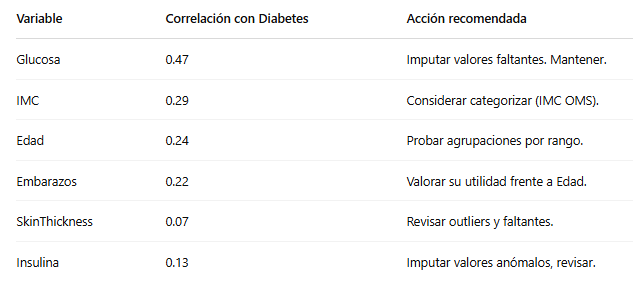

El análisis de correlación revela las siguientes relaciones importantes con la variable objetivo (Outcome):

- **Glucose**: 0.47 → Mayor predictor lineal de diabetes. Muy relevante.
- **BMI**: 0.29 → Relación clara con la diabetes. Altamente informativa.
- **Age**: 0.24 → Relación positiva: a mayor edad, más probabilidad de diabetes.
- **DPF**: 0.17 → Ligera correlación con Outcome, representa carga genética.

Variables con baja correlación como **Insulin**, **BloodPressure**, y **SkinThickness** se mantienen por ahora, ya que pueden aportar valor en modelos no lineales o al ser combinadas.

Aunque algunas variables presentan correlaciones entre sí (p. ej., Embarazos -Edad o IMC -SkinThickness), no se observan niveles críticos de multicolinealidad. Aun así, se recomienda considerar estas relaciones al seleccionar características o aplicar métodos de reducción de dimensionalidad si es necesario.

Por tanto, NO se eliminará ninguna variable en esta etapa. Se decidirá tras el análisis de importancia de características y los resultados del modelo.

## **2.4. Comparativa por clase  (Outcome 0 = No diabetes, 1 = Diabetes)**

**Objetivo**:

Analizar cómo se comportan las variables en función de la clase (Outcome).

Identificar diferencias claras entre los pacientes con y sin diabetes.

Visualizar las distribuciones para detectar patrones y diferencias.

### **2.4.1. Agrupar por clase y obtener estadísticas desccriptivas**

**Cálculo de medidas: Media y Mediana por Clase**

Calcularé las medidas estadísticas (media y mediana) para cada variable, separadas por clase (Outcome).

Esto permitirá ver diferencias claras entre las clases.

In [ ]:
# Media de cada variable según Outcome
media_por_clase = diabetes_informe.groupby("Outcome").mean()

# Mediana de cada variable según Outcome
mediana_por_clase = diabetes_informe.groupby("Outcome").median()

# Mostramos ambas
print("Media por clase:\n", media_por_clase)
print("\nMediana por clase:\n", mediana_por_clase)

### **2.4.2. Visualización comparativa con boxplots**

Utilizaré seaborn para crear boxplots que muestran la distribución de cada variable por clase.

Esto permitirá ver cómo se comportan las distribuciones y detectar posibles outliers.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir las variables numéricas para comparar
variables_numericas = ['Pregnancies', 'Glucose', 'BloodPressure',
                       'SkinThickness', 'Insulin', 'BMI',
                       'DiabetesPedigreeFunction', 'Age']

# Crear un gráfico de boxplots para cada variable
plt.figure(figsize=(16, 12))
for i, variable in enumerate(variables_numericas):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='Outcome', y=variable, data=diabetes_informe, palette='Set2')
    plt.title(f"Distribución de {variable} por Clase")

plt.tight_layout()
plt.show()


### **2.4.3. Análisis e interpretación**

1. Glucose
- Media: 109.98 (sin) vs 141.26 (con)
-Mediana: 107 vs 140
- Boxplot: diferencia clara y bien separada. Claramente mayor en pacientes con diabetes.
- **Interpretación**: es la variable más discriminante, tiene sentido clínico porque se basa en criterios diagnósticos reales.
- **Decisión**: mantener, imputar ceros como NaN, esencial para el modelo.

2. BMI (Índice de Masa Corporal)
- Media: 30.3 vs 35.14
- Mediana: 30.05 vs 34.25
- Boxplot: Diferencias notables
- **Interpretación** Las personas con diabetes tienden a tener un IMC más alto: sobrepeso y obesidad como factores de riesgo.
- **Decisión**: mantener, imputar 0 como NaN, podrías considerar clasificar en categorías después.

3. Age
- Media: 31.2 vs 37.07
- Mediana: 27 vs 36
-  Boxplot: Claramente mayor edad en promedio para pacientes con diabetes, coherente con el riesgo asociado a la edad.
- **Interpretación** La edad es un predictor potente y coherente con la evidencia clínica
- **Decisión**: mantener, incluso puedes probar agrupar en rangos de edad más adelante.

4. Pregnancies
- Media: 3.30 vs 4.87
- Mediana: 2 vs 4
- Boxplot muestra una ligera diferencia.
- Los pacientes con diabetes tienden a tener más embarazos.
- **Interpretación:** Tiene relación con diabetes gestacional y edad
- **Decisión**: mantener, aunque podría correlacionarse con la edad.

5. Blood Pressure (TAD)
- Media: 68.18 vs 70.82
- Mediana: 70 vs 74
- Boxplot: Diferencia leve aunque ligeramente mayor en pacientes con diabetes, pero con más variabilidad.
- **Interpretación**: Aunque es clínicamente relevante, no discrimina tanto
- **Decisión:** mantener, pero revisar su impacto en correlación con IMC.

6. SkinThickness
- Media: 19.66 vs 22.16
- Mediana: 21 vs 27
- Boxplot: Valores similares, pero con más outliers en clase 1, aunque es leve aumento en pacientes con diabetes.
- **Decisión**: tiene muchos ceros: imputar y analizar importancia después

7. Insulin
- Media: 68.79 vs 100.33
- Mediana: 39 vs 0 → ¡curioso!
- Boxplot muestra gran dispersión y muchos ceros
- Notablemente más alta en pacientes con diabetes, aunque con gran variabilidad.
- **Decisión**: gran cantidad de ceros, posibles outliers. Es candidata a:
  - Imputación
  - Análisis con o sin esta variable

8. Diabetes Pedigree Function
- Media: 0.43 vs 0.55
- Mediana: 0.33 vs 0.45
- Boxplot: Ligeramente superior en clase 1. Mayor en pacientes con diabetes, refleja una mayor carga genética.
- **Decisión**: mantener, pero revisar outliers (valores altos), y ya sabemos que tiene nulos

### **2.4.4. Guardado de kas visualizaciones**

In [ ]:
# Obtener fecha y hora actual
fecha_actual = datetime.now().strftime("%Y%m%d_%H%M")

# Ruta y nombre de guardado con fecha
ruta_guardado_boxplots = f"/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes/resultados/boxplots_comparativa_{fecha_actual}.png"


plt.tight_layout()
plt.savefig(ruta_guardado_boxplots)
plt.close()
print("Boxplots guardados correctamente en:", ruta_guardado_boxplots)

### **2.4.5. Conclusiones finales de la comparativa**

En este apartado se realiza una comparación entre pacientes con y sin diabetes para analizar las diferencias en cada variable.

**Análisis de Media y Mediana por Clase**

| Variable                  | Media (0) | Media (1) | Mediana (0) | Mediana (1) | Observaciones |
|--------------------------|-----------|-----------|--------------|--------------|----------------|
| Pregnancies              | 3.30      | 4.87      | 2            | 4            | Ligeramente más embarazos en clase 1 |
| Glucose                  | 109.98    | 141.26    | 107          | 140          | Variable más discriminante |
| BloodPressure            | 68.18     | 70.82     | 70           | 74           | Diferencia leve |
| SkinThickness            | 19.66     | 22.16     | 21           | 27           | Afectada por ceros y outliers |
| Insulin                  | 68.79     | 100.33    | 39           | 0            | Valores atípicos y muchos ceros |
| BMI                      | 30.30     | 35.14     | 30.05        | 34.25        | Diferencia clara y relevante |
| DiabetesPedigreeFunction | 0.43      | 0.55      | 0.336        | 0.449        | Ligera diferencia, con outliers |
| Age                      | 31.19     | 37.07     | 27           | 36           | Claramente mayor en clase 1 |


**Conclusiones y decisiones para limpieza de datos**

Las diferencias en estas variables son estadísticamente significativas y clínicamente relevantes.

- **Glucose, BMI, Age**: Variables altamente informativas. Se conservarán y se imputarán los valores `0` como `NaN`.
- **Pregnancies**: Mantener, posible correlación con edad.
- **BloodPressure**: Diferencia leve, pero se conservará y se imputarán ceros.
- **SkinThickness**: Muy afectada por ceros y outliers. Imputar y analizar.
- **Insulin**: Muchos ceros y outliers. Evaluar si se mantiene o se descarta.
- **DiabetesPedigreeFunction**: Tiene valores faltantes (NaN) y outliers altos. Mantener y tratar los valores extremos.


**Conclusión final del EDA:**

El análisis exploratorio ha revelado:

- Valores 0 fisiológicamente imposibles: serán tratados como `NaN`.
- La clase positiva (diabetes) muestra claras diferencias en variables clave como Glucose, BMI y Age.
- Se realizará imputación basada en estadística robusta (mediana) o transformaciones, solo tras el split de los datos para evitar data leakage.


## **2.5. Informe exploratorio automático**

Voy a tratar de ver los datos de manera automática antes de empezar con transformaciones y además para validad si los datos que yo he sacado tienen coherencia con esta visualización

In [ ]:
!pip install ydata-profiling


In [ ]:
from ydata_profiling import ProfileReport

# Generar el reporte de pandas-profiling
profile = ProfileReport(diabetes_informe, title="Reporte de Análisis Exploratorio de Datos Diabetes", explorative=True)

# Mostrar el reporte
profile.to_notebook_iframe()

In [ ]:
# Guardar el informe
# Obtener fecha y hora actual
fecha_actual = datetime.now().strftime("%Y%m%d_%H%M")

# Definir la ruta para guardar el reporte
ruta_guardado_reporte = f"/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes/resultados/informe_eda_diabetes_{fecha_actual}.html"

# Guardar el reporte como archivo HTML
profile.to_file(ruta_guardado_reporte)

print(" Informe EDA guardado correctamente en:", ruta_guardado_reporte)

## **2.6. Conclusiones del Análisis Exploratorio de Datos (EDA)**

### **2.6.1. Objetivo**

Resumir los hallazgos clave obtenidos en el EDA.

Identificar las implicaciones para el preprocesamiento y modelado.

Establecer los pasos siguientes para el procesamiento avanzado.

### **2.6.2. Aspectos analizados y hallazgos clave del EDA**

Tras realizar un análisis exploratorio completo y contrastarlo con un informe automatizado, se destacan las siguientes conclusiones clave sobre el dataset:

**Aspecto Analizado:**
1. **Estructura del Dataset:**:  
  - El dataset contiene 768 filas y 9 columnas.
  - Las variables incluyen medidas clínicas y demográficas de pacientes (Glucose, BMI, Age, etc.) y la variable objetivo (Outcome).
2. **Calidad de los datos**
  - Se identifican valores nulos y ceros no fisiológicos en variables clínicas como Glucose, BloodPressure, SkinThickness, Insulin y BMI, que son fisiológicamente imposibles.
  - No se detectan filas duplicadas.
3. **Distribución de variables**	Variables como Insulin, SkinThickness, DPF y Age presentan distribuciones sesgadas.
  - Glucose: Distribución asimétrica a la derecha (sesgo positivo), necesario considerar transformación.
  - Insulin: Distribución altamente asimétrica y con valores extremos.
  - BMI: Distribución ligeramente sesgada, pero dentro de valores clínicamente razonables.
  - DiabetesPedigreeFunction: Distribución sesgada, pero sin valores fuera de rango clínico.
   -Age: Distribución normal, sin valores extremos
4. **Outliers**	Se han identificado valores atípicos clínicamente relevantes, que deben tratarse para evitar impacto negativo en los modelos.
5. **Correlaciones**	Glucose, BMI y Age presentan correlaciones positivas con el diagnóstico de diabetes (Outcome).
  - Glucose: Presenta la mayor correlación con la variable objetivo (Outcome) 0.47.
  - BMI: Correlación moderada con Outcome 0.29.
  - Age: Correlación moderada con Outcome 0.24.
  - Pregnancies: Relación moderada con Outcome 0.22.
  - Insulin: Baja correlación directa con Outcome, pero posible importancia no lineal.
  - DPF: Baja correlación con Outcome, pero relevante clínicamente.
6. **Comparativa por Clase (Outcome):**
- Los pacientes con diabetes tienen valores promedio más altos en:
  - Glucose: Principal marcador de diabetes.
  - BMI: Relacionado con la obesidad y resistencia a la insulina.
  - Insulin: Relacionado con la resistencia a la insulina.
  - Age: Los pacientes diabéticos son generalmente mayores.
  - DPF: Mayor carga genética en pacientes diabéticos.
- Estas diferencias son clínicamente relevantes y refuerzan la importancia de las variables.   
7. **Balance de clases**	La variable Outcome está desbalanceada (65% no diabéticos, 35% diabéticos), lo cual requerirá técnicas de balanceo como SMOTE.
8. **Validación automática**	El informe exploratorio automático coincide con los hallazgos obtenidos manualmente, validando la fiabilidad del análisis y el enfoque realizado.

**Próximos pasos: Implicación para el Preprocesamiento**
A partir de este análisis, el siguiente paso será abordar el bloque:

- **3. Prepocesamiento avanzado de Datos**:
  - Transformación de valores 0 a NaN
  - Tratamiento de valores nulos o incorrectos.
  - Tratamiento de outliers (con criterio estadístico y clínico).
  - Análisis de la distribución de variables para aplicar transformaciones si es necesario.
  - Separación en conjunto de entrenamiento y test antes de transformar.
  - Escalado y codificación de variables.
  - Balanceo de clases
  - Construcción de un Feature Pipeline.







# **3. Preprocesamiento avanzado de datos**

## Esquema de la sección 3. Procesamiento de datos

3.1 División del dataset:
- variables predictoras vs objetivo + split train/test
- Separación de X (predictoras) y y (objetivo: Outcome)
- División del dataset en X_train y X_test usando train_test_split
- Guardado y verificación de tamaños

3.2 Análisis inicial del conjunto de entrenamiento (X_train)
- Revisión de estructura, tipos de datos y estadísticas generales
- Exploración de posibles problemas (valores anómalos, skewness, etc.)
- Análisis con describe(), info()
- Visualizaciones generales

3.3. Preparación del dataset para imputación

3.4 Análisis de valores faltantes y ceros no fisiológicos
- Detección de ceros como valores inválidos en variables como Glucose, Insulin, BloodPressure, etc.
- Sustitución por NaN en X_train únicamente (sin tocar test)
- Visualización de missing values con gráficas y isnull().sum()

3.5 Análisis clínico y estadístico variable por variable
- Justificación clínica por variable (Pregnancies, Glucose, BMI, etc.)
- Cálculo de outliers con IQR y percentiles
- Visualizaciones: Boxplot + Histograma
- Decisión preliminar (mantener, imputar, transformar, eliminar) Sin ejecutar imputación aún, solo documentado



## **3.1. División del dataset**


### **3.1.1. Separar variables predictoras vs objetivo + split train/test**

In [ ]:
# Seleccionar las muestras para train- validation y test
from sklearn.model_selection import train_test_split

# Separar X (features) de y (target)
X = diabetes_informe.drop(['Outcome'], axis=1)#variables predictoras
y = diabetes_informe["Outcome"]

### **3.1.2. División inicial train-test-split**

In [ ]:
# División inicial: 80% entrenamiento, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y) #Uso stratify=ypara mantener la proporción de clases para que las clases (0 y 1) estén balanceadas proporcionalmente en ambos conjuntos.


### **3.1.3 Resultado de la división**

In [ ]:
# Comprobar dimensiones
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train distribución:\n{y_train.value_counts(normalize=True)}")
print(f"y_test distribución:\n{y_test.value_counts(normalize=True)}")

### **3.1.4.Conclusión**

Antes de comenzar con imputaciones o transformaciones, es fundamental dividir el conjunto de datos para evitar **data leakage** y mantener un conjunto "virgen" para evaluar el modelo.

3.1 Separación de variables predictoras y objetivo; se separa la variable objetivo (Outcome) del resto de variables predictoras.

3.2 División train_test_split: se realiza una división del 80% para entrenamiento y 20% para test, **estratificando por clase** para conservar la proporción entre personas con y sin diabetes.

3.3 Resultados de la división
- X_train.shape: (614, 8)
- X_test.shape: (154, 8)

Distribución en y_train:
- Clase 0: 65.15%
- Clase 1: 34.85%

Distribución en y_test:
- Clase 0: 64.94%
- Clase 1: 35.06%

3.4 Guardado de los datos
Se guardan los conjuntos divididos en la carpeta datos_procesados para facilitar su reutilización.

### **3.1.5. Guardado de datasets originales (X_train, X_test, y_train, y_test)**

Guardamos el conjunto de datos tras la división inicial en entrenamiento y test, sin modificaciones.

In [ ]:
# Ruta donde guardar los datos tras limpieza
ruta_limpieza = os.path.join(ruta_datos_procesados, "original")

# Obtener fecha y hora actual
fecha_actual = datetime.now().strftime("%Y%m%d_%H%M")

# Guardar datasets procesados con fecha
X_train.to_csv(os.path.join(ruta_datos_procesados, "original", f"X_train_{fecha_actual}.csv"), index=False)
X_test.to_csv(os.path.join(ruta_datos_procesados, "original", f"X_test_{fecha_actual}.csv"), index=False)
y_train.to_csv(os.path.join(ruta_datos_procesados, "original", f"y_train_{fecha_actual}.csv"), index=False)
y_test.to_csv(os.path.join(ruta_datos_procesados, "original", f"y_test_{fecha_actual}.csv"), index=False)

print(" Datasets de entrenamiento y test guardados correctamente en la carpeta priginal/ con fecha:", fecha_actual)

## **3.2. Análisis inicial del conjunto de entrenamiento (X_train)**

El propósito de este análisis es conocer en profundidad las variables del conjunto de entrenamiento, detectar posibles problemas en los datos (valores nulos, outliers, sesgos) y preparar el terreno para una correcta imputación, limpieza y transformación posterior, asegurando un flujo profesional de trabajo y evitando el data leakage.

### **3.2.1. Revisión básica del dataset de entrenamiento**

In [ ]:
# Visualizar las primeras filas del conjunto de entrenamiento
X_train.head()

### **3.2.2. Estructura general del conjunto de entrenamiento**

In [ ]:
# Información general
X_train.info()

### **Conclusión:**

Observaciones:
- 614 registros,
- 8 variables predictoras.

Tipos de datos:
- 6 variables de tipo entero (int64)
- 2 variables de tipo flotante (float64)

No hay valores nulos explícitos (NaN), pero sí hay valores fisiológicamente imposibles (cero).

### **3.2.3. Análisis estadístico general (describe())**

In [ ]:
# Estadísticas generales
X_train.describe()

### **Conclusión:**

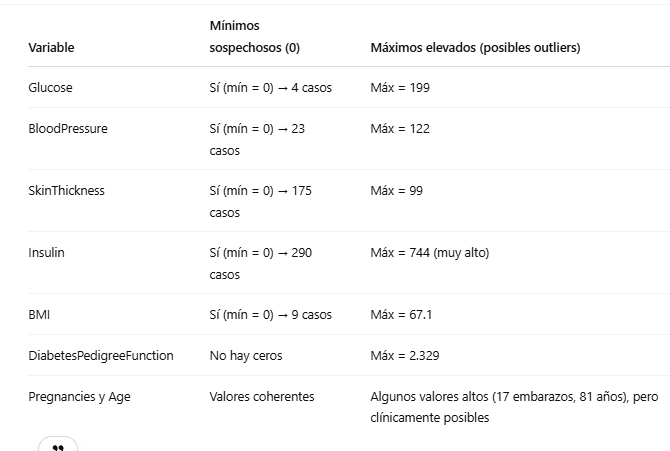

**Conclusión**:

Variables como Glucose, BloodPressure, SkinThickness, Insulin y BMI contienen valores cero que deben ser tratados como datos faltantes, ya que no tienen sentido clínico. Además, existen outliers que deberán ser evaluados con criterio clínico y estadístico (por ejemplo, valores extremos en Insulin y DPF).

### **3.2.4 Distribución de las variables (histogramas)**

In [ ]:
# Histograma
X_train.hist(figsize=(12, 8), bins=20)
plt.suptitle("Distribución de las variables (X_train)")
plt.show()

### **Conclusión:**

**Conclusión**:

Se han generado histogramas para todas las variables del conjunto X_train. A continuación, un resumen de las observaciones:
- Pregnancies: Sesgada a la derecha. La mayoría de pacientes tiene entre 0 y 5 embarazos.
- Glucose: Distribución tipo normal con picos en 0. Los ceros deben tratarse como NaN.
- BloodPressure: Distribución centrada, pero con ceros no fisiológicos.
- SkinThickness: Distribución sesgada con un gran pico en 0. Muchos valores faltantes mal codificados.
- Insulin: Distribución extremadamente sesgada con muchos ceros y valores muy elevados (outliers).
- BMI: Forma similar a una normal, pero también presenta ceros.
- DPF: Sesgo a la derecha, varios valores muy altos.
- Age: Sesgo a la derecha. Rango razonable entre 21 y 81 años.

### **3.2.5 Visualización de outliers (Boxplots)**

In [ ]:
# Boxplots para detectar outliers
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
fig.suptitle("Boxplots de las variables (X_train)")

columnas = X_train.columns
for ax, col in zip(axes.flatten(), columnas):
    sns.boxplot(y=X_train[col], ax=ax, color="skyblue")
    ax.set_title(col)

plt.tight_layout()
plt.show()

### **Conclusiones**

A través de boxplots individuales por variable se identifican:
- Valores atípicos en todas las variables, especialmente en:
  - Insulin: Valores extremos superiores (hasta 744).
  - DPF: Varios valores por encima de 2.
- SkinThickness y BMI: Muestran una gran concentración de valores cercanos al mínimo y algunos outliers superiores.

### **3.2.6 Valores sospechosos nulos e igual a cero**

In [ ]:
# Verificar valores nulos
X_train.isnull().sum()

In [ ]:
(X_train == 0).sum()

**Interpretación**: Estas variables deben ser transformadas para sustituir los valores 0 por NaN antes de aplicar imputación.

### **3.2.7 Conclusión y próximos paso**

**Decisiones preliminares:**

- Reemplazar valores 0 en las variables clínicas indicadas por np.nan.
- Analizar y decidir cómo tratar los outliers:
  - ¿Excluir?
  - ¿Imputar?
  - ¿Transformar con log o PowerTransformer?
- Mantener las variables como están si los valores extremos son clínicamente posibles (como embarazos o edad alta).
- Documentar cada decisión con base en estadísticas, visualización y justificación clínica.

**Siguiente paso**: Aplicar la transformación de ceros a NaN, imputar valores faltantes con la mediana (o métodos más avanzados), y preparar el Feature Pipeline.

## **3.3. Preparación del dataset para imputación y tratamiento de outliers**

Para evitar modificar el conjunto original, se crea una copia de X_train llamada X_train_procesado. Este será el dataset sobre el que se realizarán las transformaciones necesarias.

Se ha guardado una copia del dataset procesado como X_train_procesado.csv para mantener trazabilidad.


### **3.3.1 Crear, preparar y verificar copia del conjunto de datos de entrenamiento**

In [ ]:
# Crear copia segura del conjunto de entrenamiento antes de imputaciones
X_train_procesado = X_train.copy()

In [ ]:
X_train_procesado

## **3.4. Justificación, reemplazo y análisis de valores faltantes y ceros no fisiológicos en X_train_procesado**

### **3.4.1. Justificación clínica y técnica del reemplazo de ceros antes del análisis de outliers**

**Justificación clínica**

Antes de realizar el análisis de valores atípicos (outliers) mediante métodos estadísticos como el rango intercuartílico (IQR), se ha decidido reemplazar los valores **cero no fisiológicamente válidos** por `NaN` en las siguientes variables clínicas:

- **Glucose**
- **BloodPressure**
- **SkinThickness**
- **Insulin**
- **BMI**

**Justificación clínica**

Desde el punto de vista médico, un valor cero en estas variables no representa una medición realista ni fisiológicamente posible. Por ejemplo:

- Un nivel de **glucosa en sangre igual a 0** es incompatible con la vida.
- Un valor de **insulina o grosor de piel (SkinThickness) igual a 0** no tiene sentido clínico.
- Un **IMC igual a 0** implicaría un peso corporal nulo, lo cual es imposible.

**Justificación estadística**

Desde el punto de vista estadístico, mantener estos ceros artificiales habría distorsionado severamente los cálculos de:

- Percentiles (Q1, Q3)
- Rango intercuartílico (IQR)
- Media y desviación estándar
- Identificación de outliers

Por esta razón, se ha aplicado primero una transformación de ceros a `NaN` para aislar los datos erróneos y garantizar que los cálculos posteriores se realicen **de forma más fiable y clínicamente coherente**.


### **3.4.2. Identificaciñon y reemplazo de ceros no fisiológicos por NaN**

Se han reemplado por NaN los valores 0 de variables clínicas que no pueden tener valor cero desde el punto de vista médico: Glucose, BloodPressure, SkinThickness, Insulin, BMI


In [ ]:
# Columnas con ceros no fisiológicamente válidos
columnas_con_ceros_invalidos = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Sustituir ceros por NaN
X_train_procesado[columnas_con_ceros_invalidos] = X_train_procesado[columnas_con_ceros_invalidos].replace(0, np.nan)

### **3.4.3. Guardado el dataset X_train_procesado tras transformación de valores 0 a NaN**

Guardamos la versión de X_train tras la transformación de ceros incoherentes en valores nulos (NaN), antes de la imputación de datos.(X_train_procesado)

In [ ]:
#Guardar dataset X_train_procesado
# Ruta de la subcarpeta imputado
ruta_imputado = os.path.join(ruta_datos_procesados, "limpieza")

# Fecha actual
fecha_actual = datetime.now().strftime("%Y%m%d_%H%M")

# Guardar el dataset modificado
X_train_procesado.to_csv(os.path.join(ruta_datos_procesados, "limpieza", f"X_train_procesado_{fecha_actual}.csv"), index=False)

print(f" X_train_procesado (con ceros no fisiológicos transformados a NaN) guardado en carpeta limpieza/ con fecha {fecha_actual}.")

### **3.4.4. Revisión de valores nulos tras transformación**

Se  han reemplado por NaN los valores 0 de variables clínicas que no pueden tener valor cero desde el punto de vista médico: Glucose, BloodPressure, SkinThickness, Insulin, BMI

El siguiente gráfico de calor confirma que las variables seleccionadas contienen ahora valores nulos, mientras que el resto permanece intacto.

In [ ]:
# Verificar que los cambios se han realizado
X_train_procesado.isnull().sum()

### **3.4.5. Visualización de valores nulos mediante un mapa de calor**

**Interpretación visual:**
- Fondo negro:  indica valores no nulos (no hay NaN)
- Rayas claras verticales (amarillo claro o blanco) indican valores nulos (hay NaN) en esas columnas.



El mapa de calor de valores nulos muestra que, tras reemplazar los valores cero por NaN en las variables clínicas, se han generado correctamente valores nulos en las columnas correspondientes:

- SkinThickness, Insulin y BloodPressure presentan una gran cantidad de nulos.
- Glucose y BMI tienen pocos valores nulos.
- Las columnas que no deben contener nulos (Pregnancies, Age, DPF) aparecen completamente negras, confirmando que se mantienen sin modificar.

Esta visualización sirve como validación de que el reemplazo se aplicó correctamente y solo a las variables clínicas afectadas por ceros no fisiológicos.

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(X_train_procesado.isnull(), cbar=False, cmap='magma')
plt.title("Mapa de calor de valores nulos (X_train_procesado)")
plt.show()

Se han reemplado por NaN los valores 0 de variables clínicas que no pueden tener valor cero desde el punto de vista médico: Glucose, BloodPressure, SkinThickness, Insulin, BMI

El siguiente gráfico de calor confirma que las variables seleccionadas contienen ahora valores nulos, mientras que el resto permanece intacto.



## **3.5 Análisis univariante: clínico, estadístico y tratamiento de valores extremos (Outliers)**

### **Objetivo**:




Identificar valores atípicos que puedan alterar el rendimiento de los modelos. Para ello aplicaremos:
- Criterio clínico (sentido médico, evidencia y lógico)
- Criterio estadístico (IQR).
- Análisis visual con boxplots e histogramas e interpretación paso a paso.
1. Boxplot (diagrama de caja)
Te permite ver rápidamente los valores fuera del rango IQR, es decir, los posibles outliers estadísticos.
Ideal para detectar valores atípicos en variables numéricas.
2. Histograma + KDE (densidad): Permite ver la distribución general de la variable. Ayuda a identificar asimetría (skewness), acumulaciones de valores, gaps o colas largas que justifican transformaciones como log o PowerTransformer.
Si hay outliers muy extremos, se visualizarán alejados a la derecha o izquierda.
- Análisis visual multivariable (dispersión): Se tratará en un bloque aparte. **Punto 4**.
3. Gráfico de dispersión: Es útil para:
  - Observar la relación entre variables, como por ejemplo si un mayor BMI va acompañado de mayor SkinThicknes.
   - Detectar patrones de dispersión o concentración, como acumulaciones extrañas o puntos fuera del grupo (outliers multivariados).
   - Diferencias por clase (hue=outcome) si las personas con diabetes tienden a agruparse en zonas del gráfico
  - Valores atípicos combinados: Identificar posibles errores por cruzamiento clínico: valores de glucosa altos sin insulina alta, etc.



### **Esquema para cada variable**

In [ ]:
def analizar_variable(dataframe, variable):

    print(f"\n Análisis estadístico de la variable: {variable}")

    # 1. Crear copia segura del DataFrame
    df_var = dataframe.copy()

    # 2. Cálculos estadísticos
    Q1 = df_var[variable].quantile(0.25)
    Q3 = df_var[variable].quantile(0.75)
    IQR = Q3 - Q1

    limite_superior = Q3 + 1.5 * IQR
    limite_inferior = Q1 - 1.5 * IQR

    percentil_95 = df_var[variable].quantile(0.95)
    percentil_99 = df_var[variable].quantile(0.99)
    percentil_01 = df_var[variable].quantile(0.01)
    percentil_05 = df_var[variable].quantile(0.05)

    print(f"Q1: {Q1}")
    print(f"Q3: {Q3}")
    print(f"IQR: {IQR}")
    print(f"Límite inferior (IQR): {limite_inferior}")
    print(f"Límite superior (IQR): {limite_superior}")
    print(f"Percentil 95: {percentil_95}")
    print(f"Percentil 99: {percentil_99}")
    print(f"Percentil 01: {percentil_01}")
    print(f"Percentil 05: {percentil_05}")

    # 3. Valores extremos
    outliers = df_var[df_var[variable] > limite_superior]
    print(f"\n Número de outliers por encima del límite IQR: {outliers.shape[0]}")
    print(outliers[variable].value_counts().sort_index())

    # 4. Visualizaciones
    # Boxplot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df_var[variable])
    plt.title(f"Boxplot de la variable {variable}")
    plt.xlabel(variable)
    plt.show()

    # Histogramas
    plt.figure(figsize=(12, 6))
    sns.histplot(df_var[variable], bins=40, kde=True)
    plt.title(f"Distribución de la variable {variable}")
    plt.xlabel(variable)
    plt.ylabel("Frecuencia")
    plt.show()


### **3.5.1 Variable: Pregnancies – Análisis clínico y detección de valores extremos**

**1. Justificación clínica e interpretación de los resultados**

**1. Justificación clínica**

La variable representa el número de embarazos previos. Aunque valores elevados son poco frecuentes, no son imposibles, especialmente en poblaciones de alta natalidad como la comunidad Pima. El valor extremo debe evaluarse más desde una perspectiva de representatividad del modelo que de error clínico.

**2. Análisis clínico y estadístico (X_train_procesado)**
- Rango observado: 0 - 17
- Q1: 1.0
- Q3: 6.0
- IQR: 5.0
- ímite inferior (IQR): -6.5 (no relevante aquí, mínimo es 0)
- Límite superior (IQR): 13.5
- Percentil 95: 10.0
- Percentil 99: 13.0
- Nº de outliers por encima del límite IQR: 2

**3. Análisis visual**
- Boxplot
 - Muestra dos puntos claramente por encima de 13.5, considerados outliers.
 - La mayoría de los valores están por debajo de 10.
- Histograma
 - Distribución asimétrica a la derecha, como es esperable en eventos contables (muchas mujeres con pocos embarazos y pocas con muchos).
 - Presencia de valores extremos (≥14) poco frecuentes pero posibles.

**4. Interpretación y decisión**
- Valores 14 y 17: No son errores, pero sí extremos.
- Representan casos raros de embarazos múltiples, clínicamente válidos.

**Decisión provisional:**
- Mantener los valores.
- No imputar ni eliminar a menos que afecten claramente al modelo.
- Alternativamente, se puede etiquetar como extremo clínico si se observa distorsión en la predicción.

**2. Análisis de valores extremos: Cálculo IQR + límites**

In [ ]:
analizar_variable(X_train_procesado, 'Pregnancies')

### **3.5.2 Variable: Glucose – Análisis clínico y detección de valores extremos**

**1. Justificación clínica e interpretacion de los resultados**

**1. Análisis clínico:**

La glucosa plasmática es un marcador clave en el diagnóstico y monitoreo de la diabetes. Según la evidencia clínica:

- En ayunas:
  - Normal: 70 – 99 mg/dL
  - Prediabetes: 100 – 125 mg/dL
  - Diabetes: ≥ 126 mg/dL
- A las 2h post carga oral (OGTT):
  - Normal: < 140 mg/dL
  - Intolerancia: 140 – 199 mg/dL
  - Diabetes: ≥ 200 mg/dL

En el dataset indica que los valores son tras 2 horas de carga oral de glucosa.Sin embargo, los valores detallados, no muestran con claridad si las mediciones fueron en ayunas o post carga. Se observan valores entre 56 y 199 mg/dL, compatibles con mediciones en ayunas o mixtas en una población con alto riesgo de diabetes.

**2. Justificación clínica**:
- Aunque el dataset indica "glucosa tras 2h", los valores reflejan niveles en ayunas.
- Valores bajos (<70): pueden indicar hipoglucemia. En este caso, el mínimo observado es 56, hipoglucemia severa que requiere atención inmediata.
- Valores altos (>180): compatibles en diabetes mal controlada. Valor máximo: 199 mg/dL, dentro de rangos posibles para prediabetes o diabetes sin tratamiento.

**3. Análisis clínico y estadístico (X_train_procesado)**
- Rango observado: 56 – 199
- Q1: 99.0
- Q3: 140.75
- IQR: 41.75
- Límite inferior (IQR): 36.375
- Límite superior (IQR): 203.375
- Percentil 95: 180.5
- Percentil 99: 196.0
- Nº de outliers por encima del límite IQR: 0

**4. Análisis visual**
- Boxplot
  - No se identifican valores fuera del rango IQR.
  - La distribución general es amplia pero sin extremos visuales.
- Histograma
  - Distribución asimétrica hacia la derecha (colas largas en valores altos).
  - Presencia esperable de valores >140 (riesgo elevado).

**Decisión provisional**
- No se detectan valores fisiológicamente imposibles. Los niveles bajos (56 mg/dL) son raros, pero posibles en hipoglucemias reales.
- Mantener todos los valores, ya que reflejan situaciones clínicas posibles.
- No es necesario imputar ni eliminar. Se puede aplicar transformación si es necesario por sesgo (skewness).

**Referencias clínicas**:

MedinePlus – Prueba de glucosa https://medlineplus.gov/spanish/ency/article/003466.htm

MedicalNewsToday – Glucosa en sangre: https://www.medicalnewstoday.com/articles/es/prueba-de-glucosa-en-sangre



**2. Análisis de valores extremos: Cálculo IQR + límites**

In [ ]:
analizar_variable(X_train_procesado, 'Glucose')

### **3.5.3 Variable: BloodPressure – Análisis clínico y detección de valores extremos**

**1. Justificación clínica e interpretación de los datos**

**1. Análisis clínico**

La presión arterial diastólica (PAD) representa la presión en las arterias cuando el corazón está en reposo entre latidos. Es un indicador crucial en la evaluación del riesgo cardiovascular.
- Valores normales para adultos: 60 – 90 mmHg
- Hipotensión: < 60 mmHg
- Hipertensión grado 1: 90 – 99 mmHg
- Hipertensión grado 2: ≥ 100 mmHg
- Valores < 40 mmHg son clínicamente  muy raros, incompatibles con la vida. Se puede presentar en estado de shock o fallo multiorgánico incompatibles con la vida.
- Valores 100-110 mmHg: posibles en pacientes con hipertensión mal controlada, especialmente en población de riesgo (como en este dataset de personas con sospecha de diabetes). Y > 120 mmHg pueden reflejar crisis hipertensivas.

**2. Análisis clínico y estadístico (X_train_procesado)**
- Rango observado: 24 - 122 mmHg
- Q1: 64.0
- Q3: 80.0
- IQR: 16.0
- Límite inferior (IQR): 40.0
- Límite superior (IQR): 104.0
- Percentil 01: 44.0
- Percentil 05: 52.0
- Percentil 95: 90.0
- Percentil 99: 108.0
- Valores extremos:
 - Valor mínimo: 24 mmHg: incompatible con la vida
 - Valores bajos (<44): sospechosos, posiblemente erróneos o reflejo de errores de medición
 - Valor máximo: 122 mmHg: podría reflejar casos extremos de hipertensión no controlada
- Nº de outliers por encima del límite IQR: 14
  - Valores atípicos altos: 106, 108, 110, 114, 122
  - Valores atípicos bajos (< 40): 24, 28, 30, 38

**3. Análisis visual**
- **Boxplot**:
 - Muestra claramente outliers por ambos extremos
  - Principalmente a partir de 104 (alto) y menores a 40 (bajo).
- **Histograma**
  - Distribución ligeramente sesgada hacia la izquierda
  - Pico entre 70–80 mmHg (valor modal)lo cual concuerda con una población adulta.
  - Presencia real de valores muy bajos y muy altos, aunque en menor cantidad

**Decisión provisional**
- Valores < 44 mmHg: se consideran potencialmente erróneos o clínicamente extremos: Revisar o imputar:
  - Imputar con mediana o mediana por grupo (para mayor precisión)
- Valores > 104 mmHg: posibles casos reales de hipertensión, si bien inusuales: Mantener con etiqueta de "extremo clínico"
  - Conservar los valores altos con justificación clínica. Documentar que los casos extremos han sido revisados

**Referencias clínicas:**

American Heart Association – Presión arterial https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings

MedlinePlus – Hipotensión e hipertensión https://medlineplus.gov/spanish/ency/article/007278.htm //  https://medlineplus.gov/spanish/ency/article/000468.htm

**2. Análisis de valores extremos: Cálculo IQR + límites**

In [ ]:
analizar_variable(X_train_procesado, 'BloodPressure')

In [ ]:
# Filtrar los valores menores a 44 mmHg que son fisiológicamente poco probables
valores_altos = X_train_procesado[X_train_procesado['BloodPressure'] < 44]
# Mostrar cuántos valores cumplen esta condición
print(f"Cantidad de registros con BloodPressure menor a 44: {valores_altos.shape[0]}")
# Verificar distribución y ver frecuencia de cada número
X_train_procesado[X_train_procesado['BloodPressure'] <44]['BloodPressure'].value_counts().sort_index()

### **3.5.4. Variable: SkinThickness – Análisis clínico y detección de valores extremos**

**1. Justificación clínica e intepretación de todos los resultados**

**1. Justificación clínica:**
El grosor del pliegue cutáneo del tríceps (SkinThickness) es un parámetro antropométrico utilizado para estimar la grasa subcutánea.

Valores normales:
- Adultos jóvenes: 10 – 25 mm
- En personas con sobrepeso: 25 – 40 mm
- Valores > 50 mm son raros; > 60 mm extremadamente inusuales
- Valores < 5 – 8 mm podrían indicar desnutrición severa

Este parámetro se ve afectado por edad, sexo, IMC y condiciones como lipedema, acantosis nigricans o esclerosis cutánea.

2. Interpretación clínica:
Valor mínimo observado: 7 mm → posible caso de delgadez extrema o desnutrición

Valor máximo observado: 99 mm → extremadamente alto, fuera del rango fisiológico habitual

Valores > 60 mm: considerados clínicamente inusuales
→ podrían distorsionar el modelo si no se tratan correctamente

**3. Análisis clínico y estadístico (X_train_procesado)**
- Rango observado: 7 – 99 mm
- Q1: 21.0
- Q3: 36.0
- IQR: 15.0
- Límite inferior (IQR): -1.5
- Límite superior (IQR): 58.5
- Percentil 01: 10.0
- Percentil 05: 13.0
- Percentil 95: 46.0
- Percentil 99: 51.6
- Valores extremos:
  - Valor mínimo observado: 7 mm, posible caso de delgadez extrema o desnutrición
  - Valor máximo observado: 99 mm, extremadamente alto, fuera del rango fisiológico habitual
- Valores > 60 mm: considerados clínicamente inusuales, podrían distorsionar el modelo si no se tratan correctamente
- Nº de outliers del límite IQR: 6
  - Valores por encima: 60 mm y 99 mm
  - Valores por debajo: 7 mm y 8 mm

**4. Análisis visual**
- Boxplot:
  - Claramente se observan dos outliers por encima de 58.5 mm
- Histograma:
  - Distribución sesgada a la derecha (skewed)
  - Pico modal alrededor de 25 – 30 mm
  - Valores > 50 mm son muy escasos

**6. Decisión provisional**
  - El valor de 99 mm es un outlier extremo clínico. Aunque puede estar relacionado con obesidad extrema, es raro y posiblemente distorsionante.
  - Imputar valores >60 mm con la mediana (≈30 mm), previa comprobación de consistencia con BMI
  - Conservar valores bajos si tienen sentido clínico (no se detectan valores <7 mm)
  - **Hacer Gráfico de dispersión:**
    - Cruzar SkinThickness con BMI
    - Puede mostrar relación entre obesidad severa y grosor elevado

**Referencias clínicas:**

ScienceDirect – Skinfold thickness https://www.sciencedirect.com/topics/agricultural-and-biological-sciences/skinfold-thickness

EFDeportes – Cálculo de índices antropométricos https://www.efdeportes.com/efd148/calculo-de-indices-antropometricos-en-adolescentes.htm



**2. Análisis de valores extremos: Cálculo IQR + límites**

In [ ]:
analizar_variable(X_train_procesado, 'SkinThickness')

In [ ]:
# Filtrar los valores menores a 10 mmHg que son fisiológicamente poco probables
valores_altos = X_train_procesado[X_train_procesado['SkinThickness'] < 10]
# Mostrar cuántos valores cumplen esta condición
print(f"Cantidad de registros con SkinThickness menor a 10: {valores_altos.shape[0]}")
# Verificar distribución y ver frecuencia de cada número
X_train_procesado[X_train_procesado['SkinThickness'] <10]['SkinThickness'].value_counts().sort_index()

### **3.5.5 Variable: BMI – Análisis clínico y detección de valores extremos**

**1. Justificación clínica e interpretación de todos los resultados**

**1. Justificación clínica:**

El BMI es un indicador ampliamente utilizado para clasificar el estado nutricional en adultos. Se calcula como peso (kg) dividido por altura al cuadrado (m²). Según la Organización Mundial de la Salud (OMS):
- Peso bajo: < 18.5
- Normopeso: 18.5 – 24.9
- Sobrepeso: 25 – 29.9
- Obesidad grado I: 30 – 34.9
- Obesidad grado II: 35 – 39.9
- Obesidad grado III (severa): ≥ 40
- Obesidad extrema (grado IV): > 50 (muy poco frecuente)

2. Interpretación clínica:
Valores > 50 indican obesidad extrema, asociada a riesgos metabólicos elevados

En este dataset, hay registros incluso > 60, muy poco frecuentes en población general

Valores bajos cercanos a 18.2 podrían reflejar bajo peso o desnutrición leve

**2. Análisis clínico y estadístico (X_train_procesado)**
- Rango observado: 18.2 – 67.1
- Q1: 27.6
- Q3: 36.6
- IQR: 9.0
- Límite inferior (IQR): 14.1
- Límite superior (IQR): 50.1
- Percentil 01: 19.5
- Percentil 05: 22.12
- Percentil 95: 44.08
- Percentil 99: 49.99
- Valores extremos:
  - Valores > 50 indican obesidad extrema, asociada a riesgos metabólicos elevados. En este dataset, hay registros incluso > 60, muy poco frecuentes en población general
  - Valores bajos cercanos a 18.2 podrían reflejar bajo peso o desnutrición leve y son compatibles con los datos bajos del grosor de la piel
- Nº de outliers por encima del límite IQR: 6
  - Valores: 52.3, 52.9, 53.2, 55.0, 57.3, 67.1

**3. Análisis visual**
- Boxplot:
  - Se identifican claramente los valores >50 como outliers extremos
  - No hay valores bajos por debajo del límite inferior (14.1)
- Histograma:
  - Distribución asimétrica a la derecha
  - Valores centrales entre 30 y 40 (coincide con obesidad leve a moderada)
  - Pico claro alrededor de 32 – 34

Gráfico de dispersión (opcional):

Puede analizarse junto con SkinThickness o Glucose para ver si hay patrones de obesidad metabólica

**4. Decisión provisional**
- Valores >55 se consideran extremos y poco representativos
- Se recomienda imputar por la mediana (≈32–33)
- Si se desea modelar específicamente con población obesa severa, podrían conservarse, pero sería necesario justificarlo
- Realizar Gráfico de dispersión, puede analizarse junto con SkinThickness o Glucose para ver si hay patrones de obesidad metabólica

**Referencias clínicas:**

OMS – Clasificación del IMC https://www.who.int/es/news-room/fact-sheets/detail/obesity-and-overweight

Scielo – Obesidad mórbida en España https://scielo.isciii.es/scielo.php?script=sci_arttext&pid=S1135-57272003000300005

UBA – Poblaciones de referencia https://www.fmed.uba.ar/sites/default/files/2020-08/Poblaciones%20de%20Referencia.pdf



**2. Análisis de valores extremos: Cálculo IQR + límites**

In [ ]:
analizar_variable(X_train_procesado, 'BMI')

###**3.5.6 Variable: Insulin - Análisis clínico y detección de valores extremos**

**1. Justificación clínica e interpretación clínica**

**1. Justificación clínica**

La insulina es una hormona esencial para el control de la glucosa en sangre. En personas sanas, los niveles de insulina en ayunas suelen estar entre **5 y 25 μU/mL**.

**Análisis clínico y estadístico (X_train_procesado):**
- **Rango observado**: de **15 a 744 μU/mL**
- **Máximo registrado**: **744 μU/mL**
- **Límite superior según IQR**: 344.75
- **Percentil 99**: 542.3
- **Cantidad de registros > 580**: 1 (valor atípico severo)

**2. Análisis clínico y estadístico (X_train_procesado):**
- Rango observado: 15 – 744 μU/mL
- Q1: 76.0
- Q3: 183.5
- IQR: 107.5
- Límite inferior (IQR): -85.25
- Límite superior (IQR): 344.75
- Percentil 95: 357.3
- Percentil 99: 542.3
- Registros con valores > 500: 17
  - Incluyen valores como 540, 579, 744 (fuera de la norma clínica)
- Valores extremos:
  - Valores superiores a **400 μU/mL** son raros, pero pueden observarse en:
    - **Insulinomas** (tumores secretores de insulina)
    - **Resistencia insulínica severa**
    - **Estados hiperglucémicos extremos**
  - Valores mayores de **600** son considerados atípicos en la mayoría de contextos clínicos.
  - El valor de **744** está dentro del percentil >99 y podría distorsionar el modelo si no se gestiona correctamente.

**Decisión provisional**:
- Se valorarán diferentes estrategias:Valores >580:
  - Imputar con la **mediana** si es un caso único y extremo
  - Sustituir por el **percentil 95**
  - **Conservar** si representa un caso clínicamente válido que aporte valor al modelo (si se desea conservar casos clínicamente excepcionales).

Esta decisión será tomada y documentada en las siguientes secciones **4 y 5 Tratamiento de valores extremos**.

**Referencias clínicas**:
- [MedlinePlus: Insulina en sangre](https://medlineplus.gov/spanish/pruebas-de-laboratorio/insulina-en-la-sangre/)
- [American Cancer Society: Tumores neuroendocrinos – Insulinoma](https://www.cancer.org/es/cancer/tumor-neuroendocrino-pancreatico/senales-y-sintomas.html)

**2. Análisis de valores extremos: Cálculo IQR + límites**

In [ ]:
analizar_variable(X_train_procesado, 'Insulin')

### **3.5.7 Variable: DiabetesPedigreeFunction – Análisis clínico y detección de valores extremos**

**1. Justificación clínica e interpretaión de los resultados**

**1. Justificación clínica:**

La Diabetes Pedigree Function (DPF) es una medida desarrollada para evaluar la influencia genética en la probabilidad de desarrollar diabetes, en función del número y grado de parentesco con familiares afectados.
- Esta función se utiliza en investigaciones epidemiológicas como el estudio de la comunidad indígena Pima.
- En estudios clínicos, los valores típicos oscilan entre 0.085 y 2.5, aunque valores ligeramente superiores pueden existir en poblaciones con alta prevalencia de diabetes.
-  En el dataset: La variable no está escalada artificialmente. Ya ha sido revisada y corregida: los valores están en su escala original (0.0x a 2.3x).

**2. Análisis clínico y estadístico (X_train_procesado):**
- Rango observado: 0.078 – 2.329
- Q1: 0.245
- Q3: 0.639
- IQR: 0.394
- Límite inferior (IQR): -0.346
- Límite superior (IQR): 1.231
- Percentil 95: 1.13
- Percentil 99: 1.69
- Nº de outliers por encima del IQR: 19
  - [1.25 – 2.32]
    - Aunque estadísticamente hay valores que superan el límite IQR, clínicamente están dentro del rango esperable para la población Pima, donde existe una fuerte predisposición genética.

**3. Análisis visual:**
- Boxplot:
  - Se observan múltiples valores atípicos por encima de 1.23 como outluiers estadísticos.
  - No hay valores fuera del rango clínicaente esperable
- Histograma:
  - Distribución fuertemente asimétrica hacia la derecha (valores concentrados cerca de 0.2–0.6 y una cola larga).
  - Indica sesgo alto, lo que puede afectar a modelos sensibles a la normalidad.

**Decisión provisional:**

- A pesar de ser valores fuera del rango IQR, son esperables en población con alta predisposición genética y alta prevalencia de diabetes como la comunidad Pima.
- No se imputan ni eliminan valores.
- Se recomienda aplicar transformación logarítmica o PowerTransformer para reducir la asimetría de la distribución por sesgo alto (skewness).

**Referencias clínicas:**

ResearchGate – Determinants of Gestational Diabetes Pedigree Function for Pima Indian Females https://www.researchgate.net/publication/367013664_Determinants_of_Gestational_Diabetes_Pedigree_Function_for_Pima_Indian_Females

[Original paper introducing the DPF metric: Smith et al., 1988, Diabetes Care]

PubMed – Pima Indian Diabetes Dataset https://pubmed.ncbi.nlm.nih.gov/3044882/

**2. Análisis de valores extremos: Cálculo IQR + límites**

In [ ]:
analizar_variable(X_train_procesado, 'DiabetesPedigreeFunction')

### **3.5.8 Variable: Age – Análisis clínico y detección de valores extremos**

**1. Justificación clínic e interpretación de los resultados**

**1. Justificación clínica:**

La edad es un factor de riesgo clave en el desarrollo de diabetes tipo 2. En población adulta, es esperable encontrar casos desde los 20 hasta más de 80 años, especialmente en poblaciones con alto riesgo como los Pima.
 - No existen "outliers clínicos" per se.
 - Valores altos como 70–80 años aportan valor predictivo, especialmente si están bien representados.

**2. Análisis clínico y estadístico (X_train_procesado):**
- Rango observado: 21 – 81
- Q1: 24.0
- Q3: 41.0
- IQR: 17.0
- Límite inferior (IQR): -1.5
- Límite superior (IQR): 66.5
- Percentil 95: 58.0
- Percentil 99: 66.0

**3. Análisis visual:**
- Boxplot: Se identifican algunos valores por encima del límite superior (66.5).
- Histograma: Distribución sesgada a la derecha (normal en población adulta joven).

**Decisión provisional:**
- No se considera outlier clínico.
- Los valores extremos altos (hasta 81 años) se consideran reales y valiosos.
- No se eliminarán ni imputarán.



**2. Análisis de valores extremos: Cálculo IQR + límites**

In [ ]:
analizar_variable(X_train_procesado, 'Age')

# **4. Análisis multivariante y visualizaciones**

## **Objetivo**

- Explorar relaciones entre variables predictoras y el objetivo Outcome (0 = No diabético, 1 = Diabético), para identificar patrones y asociaciones clínicas o estadísticamente relevantes que puedan influir en el rendimiento del modelo.
- Visualizar y analizar cómo se distribuyen las variables según las clases (0 = No Diabetes, 1 = Diabetes).
- Detectar combinaciones de variables que aporten información adicional para el modelo.

4.1 Visualización de relaciones entre variables
- Scatterplots entre pares de variables (ej: `BMI` vs `SkinThickness`, `Glucose` vs `Insulin`)
- Análisis con `hue='Outcome'` para ver diferencia entre clases
- Análisis clínico complementario a decisiones del punto 3.4

4.2 Decisiones finales de tratamiento de outliers
- Revisión conjunta con visualizaciones
- Confirmación de decisiones: ¿mantener, imputar o eliminar?
- Preparación para preprocesamiento

## **4.1 Análisis visual Multivariable con Pairplot**

### **4.1.1. Pairplot de las variables numéricas más relevantes**

**Objetivo**: Visualizar relaciones bivariadas entre variables clave y su distribución por clase (Outcome).

- Variables seleccionadas: Glucose, BMI, Age, Insulin, DPF.
- Diferenciando por Outcome (0 = no diabetes, 1 = diabetes).

In [ ]:
# Selección de variables numéricas principales
vars_seleccionadas = ['Glucose', 'BMI', 'Age', 'Insulin', 'DiabetesPedigreeFunction']

# Unir X_train_procesado con y_train para poder graficar por Outcome (solo temporal)
Xy_train = X_train_procesado.copy()
Xy_train["Outcome"] = y_train.reset_index(drop=True)
# Pairplot
sns.pairplot(Xy_train[vars_seleccionadas + ['Outcome']], hue='Outcome', corner=True)
plt.suptitle('Relaciones bivariadas entre variables clave y Outcome', y=1.02)
plt.show()


### **Interpretación**

**Observaciones clave**

1. Glucose
- Distribución: Claramente desplazada hacia la derecha para Outcome = 1.
- Relaciones:
  - Con Insulin: se observa tendencia positiva, más definida en Outcome 1.
  - Con BMI y DPF: no hay relación fuerte, pero se acumulan puntos con valores altos en Outcome 1.
2. BMI
- No hay una separación muy clara, pero valores más altos tienden a darse más en personas con diabetes.
- La dispersión con otras variables es alta, aunque combinada con Glucose o Age puede aportar valor.
3. Age
- Más dispersión, especialmente en Outcome 0, donde hay muchas mujeres jóvenes sin diabetes.
- En Outcome 1 predominan personas mayores.
4. Insulin
- Relación creciente con Glucose (más insulina con más glucosa).
- Los valores extremos de insulina se concentran en Outcome 1.
5. DPF (DiabetesPedigreeFunction)
- Distribución con fuerte sesgo hacia la izquierda.
- En Outcome 1, más valores > 1.0 que en Outcome 0.

**Conclusión provisional**
- Glucose es la variable más discriminativa visualmente.
- BMI e Insulin aportan valor cuando se combinan con otras variables.
- DPF podría tener más relevancia al aplicar transformaciones.
- No hay relaciones lineales fuertes poe lo que se refuerza la necesidad de:
  - Ingeniería de variables (feature engineering),
  - Modelos no lineales o ensamblados,
  - Transformaciones en variables con fuerte sesgo.

## **4.2. Análisis Visual Multivariable con Scatterplots**

### **Objetivo**

Los scatterplots (diagramas de dispersión) me permiten explorar visualmente las relaciones entre las variables clave del dataset y la variable objetivo (Outcome). Este análisis es crucial para:
- Identificar patrones que diferencien a los pacientes con y sin diabetes.
- Detectar posibles relaciones entre las variables numéricas más importantes.
- Evaluar la distribución de los datos según la clase (Outcome).
- Observar si existen outliers o acumulaciones de valores en regiones específicas.

**Enfoque**:
Se han seleccionado las variables más relevantes para este análisis:
- Glucose: Niveles de glucosa en sangre (mg/dL).
- BMI: Índice de Masa Corporal.
- Age: Edad de los pacientes.
- Insulin: Niveles de insulina en sangre (μU/mL).
- DiabetesPedigreeFunction (DPF): Indica el riesgo genético de desarrollar diabetes.

**Scatterplots a realizar:**
- Glucose vs BMI: Relación entre glucosa y obesidad.
- Insulin vs Glucose: Relación entre insulina y glucosa.
- Age vs BMI: Relación entre edad e índice de masa corporal.
- Glucose vs DPF: Interacción entre glucosa y el factor genético.
- Age vs DPF: Relación entre edad y predisposición genética.






### **Preparación del dataset para los scatterplots**

In [ ]:
# Dataset para los scatterplots. Unir X_train_procesado con y_train para poder graficar por Outcome
Xy_train = X_train_procesado.copy()
Xy_train["Outcome"] = y_train.reset_index(drop=True)


### **4.2.1. Scatterplot Glucose vs BMI según Outcome:**

Observar:
- Si los puntos con Outcome = 1 (diagnosticados) tienden a tener glucosa y/o BMI más altos.
- Si hay zonas de concentración donde predomina un grupo.
- Si hay superposición entre clases o diferencias claras.

In [ ]:
# Gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=Xy_train,
    x='Glucose',
    y='BMI',
    hue='Outcome',
    palette='coolwarm',
    alpha=0.7
)
plt.title("Relación entre Glucose y BMI según Outcome")
plt.xlabel("Nivel de Glucosa")
plt.ylabel("Índice de Masa Corporal (BMI)")
plt.legend(title='Diagnóstico (Outcome)', loc='best')
plt.grid(True)
plt.show()

###**Interpretación**

**Observaciones clave**:
1. Tendencia general:
- Se observa una concentración de casos sin diabetes (Outcome = 0) en valores moderados de glucosa (80 -130) y BMI entre 25 y 35.
- En Outcome 1 (diabéticos), se observa una concentración de puntos en el rango alto de glucosa y BMI.
- Los casos con diabetes (Outcome = 1) están más dispersos, especialmente cuando:
  - Glucosa > 140
  - BMI > 35

2. Áreas de alto riesgo:
- El cuadrante superior derecho (glucosa alta y BMI alto) concentra más puntos rojos (Outcome = 1).
- Este patrón es coherente con la evidencia clínica: la obesidad y la hiperglucemia son factores de riesgo conocidos.

3. Superposición:
- A niveles de glucosa entre 100 y 130 y BMI entre 30 y 35, hay mezcla de clases, lo que indica que otros factores también influyen en el diagnóstico.

**Conclusión provisional:**

La combinación de valores elevados de glucosa y BMI se asocia visualmente con mayor prevalencia de diabetes en este conjunto. Aunque hay solapamiento entre clases, esta visualización sugiere que estas dos variables combinadas podrían tener peso predictivo importante.
- Este patrón indica que la combinación de obesidad y altos niveles de glucosa es un fuerte indicador de diabetes.


### **4.2.2. Scatterplot Insulin vs. Glucose según Outcome**

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=X_train_procesado.join(y_train),
    x='Glucose',
    y='Insulin',
    hue='Outcome',
    palette='coolwarm',
    alpha=0.6
)
plt.title('Relación entre Glucosa e Insulina según Outcome')
plt.xlabel('Nivel de Glucosa')
plt.ylabel('Nivel de Insulina')
plt.legend(title='Diagnóstico (Outcome)')
plt.grid(True)
plt.show()

### **Interpretación**

**Observaciones clave:**

- Se aprecia una tendencia creciente: a medida que aumenta la glucosa, también lo hace la insulina. Esto es esperable, ya que en estados prediabéticos o resistentes, el cuerpo necesita más insulina para procesar la glucosa.
- Los pacientes con Outcome 1 (diabetes) tienden a agruparse en zonas altas de glucosa (≥130) con una variabilidad más amplia de insulina, incluso en niveles bajos, lo que puede sugerir:
  - Fallo en la producción de insulina (diabetes tipo 1 o tipo 2 descompensada)
  - Resistencia insulínica (niveles altos de glucosa a pesar de insulina elevada)
 - Asimismo, los pacientes con Outcome 1 (diabéticos) presentan valores altos tanto de insulina como de glucosa.
- En cambio, los puntos Outcome 0 (sin diagnóstico) están más concentrados en zonas de glucosa entre 80 y 130 mg/dL, y niveles de insulina más estables.

**Conclusión provisional:**
- Confirma correlación positiva esperable entre glucosa e insulina. (- Se evidencia una tendencia positiva: a mayor glucosa, mayor insulina.)
- Refuerza la importancia clínica de ambas variables en el diagnóstico.
- Puede justificar:
  - la creación de una nueva variable combinada (ej. ratio glucosa/insulina),
 - o analizar si juntas aportan más poder predictivo al modelo.



### **4.2.3. Scatterplot Edad vs BMI según Outcome**

In [ ]:
# Crear scatterplot Age vs BMI según Outcome
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=X_train_procesado.join(y_train),
    x='Age',
    y='BMI',
    hue='Outcome',
    palette='coolwarm',
    alpha=0.6
)

plt.title('Relación entre Edad e IMC según Outcome')
plt.xlabel('Edad')
plt.ylabel('Índice de Masa Corporal (BMI)')
plt.legend(title='Diagnóstico (Outcome)')
plt.grid(True)
plt.tight_layout()
plt.show()

### **Interpretación**

**Observaciones clave**
1. Distribución general:
- La mayoría de los casos se concentran entre los 20 y 45 años de edad.
- El IMC se concentra entre 25 y 40, con algunos valores extremos por encima de 50.
2. Comparación por Outcome (diagnóstico de diabetes):
- Las personas con diabetes (Outcome = 1) tienden a agruparse más en los rangos altos de IMC (mayores de 35).
- También se observan más casos de diabetes en edades más avanzadas, especialmente a partir de los 35-40 años.
- En edades más jóvenes, los casos sin diabetes (Outcome = 0) son más frecuentes, pero ya empiezan a verse algunos casos de Outcome = 1 con IMC muy alto.
3. Relación conjunta:
- No hay una separación drástica entre los grupos, pero sí una tendencia leve a que a mayor edad y mayor IMC, aumenta la probabilidad de tener diabetes.

**Conclusión provisional**
- La combinación de edad e IMC es útil como variable multivariada para distinguir entre pacientes con y sin diagnóstico de diabetes.
- No existe una frontera clara, pero se observa una acumulación de casos de diabetes en edades medias-altas y con IMC elevado.
- Puede ser interesante para modelos no lineales o para crear variables combinadas, como categorizaciones del tipo:
- Obesidad joven vs. obesidad en edad avanzada.
- Esta visualización refuerza la importancia de considerar ambos factores en conjunto.



### **4.2.4. Scatterplot Glucosa vs DiabetesPedigreeFunction según Outcome**

In [ ]:
# Crear scatterplot Age vs BMI según Outcome
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=X_train_procesado.join(y_train),
    x='Glucose',
    y='DiabetesPedigreeFunction',
    hue='Outcome',
    palette='coolwarm',
    alpha=0.6
)

plt.title('Relación entre Glucose e  DiabetesPedigreeFunction según Outcome')
plt.xlabel('Glucose')
plt.ylabel('DiabetesPedigreeFunction')
plt.legend(title='Diagnóstico (Outcome)')
plt.grid(True)
plt.tight_layout()
plt.show()

### **Interpretación**

**Observaciones clave**
1. Distribución general:
- La mayoría de los puntos están concentrados en valores bajos de DPF (< 1.0).
- La glucosa se extiende hasta cerca de 200 mg/dL, como se ha visto previamente.
2. Relación visual:
- No se observa una correlación lineal fuerte entre glucosa y DPF.
- Sin embargo, los pacientes con diagnóstico positivo (Outcome = 1, en naranja) tienden a concentrarse más en:
  - niveles moderados a altos de glucosa (≥ 120),
  - y niveles medios de DPF (> 0.5).
3. Valores extremos:
- Existen algunos casos con DPF alto (> 1.5) y glucosa alta, asociados al Outcome 1.
- También hay pacientes con glucosa alta y DPF bajo que no tienen diagnóstico positivo, lo cual sugiere que DPF por sí sola no es determinante, pero podría tener un efecto modulador del riesgo.
4. Comparación entre clases:
- Outcome 0 (azul): más concentrados en glucosa < 120 y DPF < 0.5.
- Outcome 1 (naranja): mayor dispersión, especialmente en glucosa alta.

**Conclusión provisional**
- DPF es una variable útil, especialmente cuando se combina con glucosa elevada.
- Aunque no tiene una relación directa fuerte, sí muestra una tendencia diferencial por clase cuando se cruza con otras variables de riesgo como la glucosa.
- No se requieren transformaciones específicas adicionales antes del modelado (ya se consideró su skewness en fases previas).
- Se recomienda incluir esta relación en el análisis multivariante final y posibles técnicas de selección de características.

### **4.2.5. Scatterplot Edad vs DPF según Outcome**

In [ ]:
# Crear scatterplot Age vs DPF según Outcome
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=X_train_procesado.join(y_train),
    x='Age',
    y='DiabetesPedigreeFunction',
    hue='Outcome',
    palette='coolwarm',
    alpha=0.6
)

plt.title('Relación entre Age e  DiabetesPedigreeFunction según Outcome')
plt.xlabel('Age')
plt.ylabel('DiabetesPedigreeFunction')
plt.legend(title='Diagnóstico (Outcome)')
plt.grid(True)
plt.tight_layout()
plt.show()

### **Interpretación**

**Observaciones clave**
- La mayor parte de los datos se concentra en edades entre 20 y 50 años.
- Los valores de DPF también se agrupan mayoritariamente entre 0.1 y 0.8.
- Existen algunos valores atípicos de DPF superiores a 1.5, distribuidos de forma dispersa entre todas las edades.

2. Relación con Outcome (Diagnóstico):
- Se observa cierta mayor proporción de Outcome = 1 (naranja) en valores altos de DPF (>1.0), especialmente en edades jóvenes (20-40).
- Sin embargo, no hay una tendencia clara que relacione edad con valores elevados de DPF o con el diagnóstico por sí sola.

3. Distribución conjunta:
- La relación entre ambas variables no es lineal ni evidente.
- El gráfico muestra que personas jóvenes pueden tener tanto valores bajos como altos de DPF, y estar en ambos outcomes.

**Conclusión provisional**
- No se identifica una relación directa entre edad y predisposición genética (DPF), aunque los valores altos de DPF parecen más frecuentes en personas diagnosticadas con diabetes (Outcome = 1).
- La DPF se comporta de forma independiente respecto a la edad, lo cual es coherente con su interpretación clínica: la carga genética no depende de la edad del paciente, aunque sí puede influir en el desarrollo temprano de la enfermedad.
- Se mantiene como una variable clínicamente relevante y su comportamiento justifica una posible transformación por sesgo (PowerTransformer).
- No se recomienda imputar ni eliminar valores, ya que todos son fisiológicamente posibles.


### **4.2.6. Scatterplot Edad vs Glucosa según Outcome**

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=X_train_procesado.join(y_train),
    x='Glucose',
    y='Age',
    hue='Outcome',
    palette='coolwarm',
    alpha=0.6
)
plt.title('Relación entre Glucosa y Edad según Outcome')
plt.xlabel('Nivel de Glucosa')
plt.ylabel('Nivel de Age')
plt.legend(title='Diagnóstico (Outcome)')
plt.grid(True)
plt.show()

### **Interpretación**

**Observaciones clave**
1. Tendencia general:
- La mayoría de los puntos se agrupan en edades entre 20 y 50 años, con niveles de glucosa entre 80 y 140 mg/dL.
- A partir de los 50 años, se observa una mayor concentración de diagnósticos positivos (Outcome = 1), especialmente con glucosas superiores a 140 mg/dL.

2. Distribución por Outcome:
- Personas sin diabetes (Outcome = 0) se distribuyen a lo largo de todo el rango de edad, especialmente con niveles de glucosa más bajos (menores a 120).
- Personas con diabetes (Outcome = 1) tienden a agruparse en edades medias-altas (40-70 años) y con glucosa elevada (≥140).

3. Poca presencia en extremos:
- Edades muy jóvenes (<25) y muy avanzadas (>70) son poco frecuentes en el dataset, por lo que hay que tener cautela al sacar conclusiones para esos rangos.

**Conclusión provisional**
- Existe una relación clínica esperada: a mayor edad, mayor es la probabilidad de desarrollar niveles elevados de glucosa y, por tanto, riesgo de diabetes.
- Este scatterplot refuerza la importancia de considerar tanto la edad como la glucosa en el modelo predictivo, ya que muestran una asociación clara con el diagnóstico.
- No se observan valores imposibles, pero se podría estudiar interacción entre edad y glucosa en etapas avanzadas del proyecto

### **4.2.7. Scatterplot BMI vs Insulin según Outcome**

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=X_train_procesado.join(y_train),
    x='BMI',
    y='Insulin',
    hue='Outcome',
    palette='coolwarm',
    alpha=0.6
)
plt.title('Relación entre BMI e Insulina según Outcome')
plt.xlabel('Nivel de BMI')
plt.ylabel('Nivel de Insulin')
plt.legend(title='Diagnóstico (Outcome)')
plt.grid(True)
plt.show()

### **Interpretación**

**Observaciones clave**
- Se observa una tendencia ascendente leve: a mayor BMI, suele haber mayor nivel de insulina.
- Los valores de insulina por encima de 300 están más asociados a personas diagnosticadas con diabetes (Outcome = 1).
- También se detectan puntos agrupados con insulina = 0, que como mencionamos, podrían representar valores faltantes (aunque hayan sido imputados), o individuos con baja respuesta pancreática.

**Conclusión provisional**

Este gráfico confirma la necesidad de:
- Revisar el tratamiento de ceros en insulina (ya lo hicimos en su momento).
- Considerar transformaciones para reducir sesgo.
- Ver si variables como BMI e Insulin tienen interacción al predecir diabetes.



## **4.3 Decisiones finales de tratamiento de outliers**

**Reflexión final del análisis multivariado**

Tras realizar la visualización multivariable mediante scatterplots y pairplot, se han identificado varios patrones relevantes para el análisis predictivo de diabetes:
- Glucosa y BMI: existe una concentración notable de pacientes con Outcome 1 en rangos altos de glucosa y BMI. Esta combinación refuerza su relevancia como predictores clave.
- Insulina y Glucosa: aunque con más dispersión, se aprecia que los casos con Outcome 1 tienden a tener niveles elevados de ambas variables. Hay una mayor presencia de valores altos de insulina entre los pacientes diagnosticados.
- BMI e Insulina: si bien existe dispersión, hay una tendencia a valores más altos de insulina en pacientes con BMI elevado, especialmente en los diagnosticados con diabetes.
- Edad y BMI: la distribución es más homogénea, sin una separación clara entre los grupos. Sin embargo, se detecta un ligero desplazamiento hacia edades más avanzadas y BMI más alto en el grupo con Outcome 1.
- Glucosa y DPF: el grupo con Outcome 1 tiende a presentar valores más altos en ambas variables, aunque el patrón no es tan marcado como en otras combinaciones.
- Edad y DPF: los valores altos de predisposición genética se concentran más en edades jóvenes y medias. No se aprecia una relación lineal clara con la edad.

Además, el** análisis del pairplot** permite observar:
- Asimetría evidente en variables como Insulin, DPF y Age.
- Posibles correlaciones moderadas entre algunas combinaciones, aunque no todas tienen una relación lineal fuerte.
- Claras diferencias de distribución por clase (Outcome) en variables como Glucose y BMI, lo que las convierte en candidatas clave para el modelo.

**Conclusión provisional:**

Esta fase ha permitido identificar las variables más relevantes para el diagnóstico, detectar dispersiones importantes y reforzar la necesidad de:

- Tratar valores extremos (outliers clínicos y estadísticos).
- Imputar valores faltantes de forma adecuada.
- Aplicar transformaciones sobre variables con alta asimetría antes de entrenar modelos.
- Asegurar la limpieza y estandarización de las variables antes del modelado.

Estos pasos serán desarrollados a continuación en la siguiente sección (5. Tratamiento de valores extremos y transformaciones).



# **5. Tratamiento avanzado de datos: valores extremos y transformaciones**

## **5.1. Objetivo**

- Identificar y tratar valores extremos (outliers) en las variables seleccionadas detectados mediante criterios clínicos y estadísticos
- Aplicar transformaciones a las variables con fuerte asimetría (skewness) que pueden afectar el rendimiento de los modelos.
- Garantizar que las variables estén en rangos clínicamente coherentes y estadísticamente adecuados para el modelado (normalización y transformación de las variables necesarias).

El objetivo es garantizar que las variables estén en rangos razonables, sin distorsionar la distribución y conservando su valor predictivo.

## **5.2. Creación de la copia segura del conjunto de entrenamiento**

Antes de realizar cualquier transformación, se genera una copia del conjunto de entrenamiento procesado (X_train_procesado) para evitar la pérdida de información original.X_train_limpio

In [ ]:
# Crear copia de seguridad antes del tratamiento de outliers
X_train_limpio = X_train_procesado.copy()

## **5.3. Tratamiento de valores extremos (outliers)**

### **5.3.1 Tratamiento de outliers en la variable: Insulin**

**Decisión clínica:**
- Valores >580 μU/mL son raros y pueden distorsionar la distribución.
- Se imputarán los valores mayores a 580 con la mediana, como estrategia conservadora y clínica.




In [ ]:
# Visualizar mediana antes de imputar
mediana_insulin = X_train_limpio['Insulin'].median()
print(f"Mediana de Insulin: {mediana_insulin}")

# Reemplazar valores >580 por la mediana
X_train_limpio.loc[X_train_limpio['Insulin'] > 580, 'Insulin'] = mediana_insulin


**Visualización post-imputación – Insulin**

In [ ]:
# Histograma actualizado
plt.figure(figsize=(10, 5))
sns.histplot(X_train_limpio['Insulin'], bins=40, kde=True)
plt.title("Distribución de Insulin después del tratamiento de valores extremos")
plt.xlabel("Insulin (μU/mL)")
plt.ylabel("Frecuencia")
plt.show()

# Boxplot actualizado
plt.figure(figsize=(10, 4))
sns.boxplot(x=X_train_limpio['Insulin'])
plt.title("Boxplot de Insulin tras el tratamiento de outliers")
plt.xlabel("Insulin (μU/mL)")
plt.show()

**Análisis post-tratamiento de outliers**

**Visualización tras tratamiento de outliers**
- Histograma + KDE
  - La distribución sigue siendo asimétrica hacia la derecha, aunque ha mejorado ligeramente.
  - Se observa una concentración importante de valores en el rango 50 – 250 μU/mL, que se alinea con niveles esperables de insulina en ayunas.
- Boxplot
  - Persisten algunos valores por encima del rango IQR, pero el número de outliers ha disminuido.
- Se han sustituido los valores extremos identificados (por encima de 580 μU/mL) por la mediana (125.0 μU/mL), tal como fue decidido clínicamente.

### **5.3.2 Tratamiento de outliers en la variable: SkinThickness**

**Decisión clínica:**
- 99 es un valor extremo anómalo: fuera de rango normal (generalmente hasta 50-60), imputar con la mediana.
- 60 está justo al límite, pero puede mantenerse si se justifica.

In [ ]:
# Visualizar mediana antes de imputar
mediana_skin = X_train_limpio['SkinThickness'].median()
print(f"Mediana de SkinThickness: {mediana_skin}")

# Reemplazar el valor 99 de SkinThickness por la mediana
X_train_limpio.loc[X_train_limpio['SkinThickness'] >99, 'SkinThickness'] = mediana_skin

**Visualización post-imputación – SkinThickness**

In [ ]:
# Histograma + KDE
plt.figure(figsize=(10, 5))
sns.histplot(X_train_limpio['SkinThickness'], bins=30, kde=True, color="skyblue")
plt.title('Distribución de SkinThickness después del tratamiento de outliers')
plt.xlabel('SkinThickness (mm)')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=X_train_limpio['SkinThickness'], color="steelblue")
plt.title('Boxplot de SkinThickness tras el tratamiento de outliers')
plt.xlabel('SkinThickness (mm)')
plt.show()

**Análisis post-tratamiento de outliers**

**Visualización post-tratamiento:**
- Histograma con KDE:
  - muestra una distribución más realista y suavizada, sin picos anómalos.
- Boxplot:
  - Confirma la eliminación del valor extremo artificial.
  - Se mantiene un único valor alto (60 mm), dentro del rango clínicamente posible, por lo que se decidió no eliminar.



### **5.3.3 Tratamiento de outliers en la variable: DiabetesPedigreeFunction**

**Decisión clínica y de modelado:**

Aunque se trata de valores altos, no son imposibles fisiológicamente y podrían aportar información relevante. Sin embargo, por el alto sesgo, conviene transformarla posteriormente. No vamos a imputar ni eliminar valores, sino mantenerlos.

**Distribución y visualización tras revisión clínica y estadística**

A diferencia de otras variables, DPF no presenta valores fisiológicamente imposibles, pero sí una distribución altamente sesgada a la derecha, como se observa en:
- Histograma: Se aprecia una alta concentración de valores entre 0.1 y 0.6, con una cola larga hacia la derecha (valores altos).
- Boxplot: Se identifican múltiples valores por encima del límite superior del IQR (> 1.23). Aunque son considerados outliers estadísticos, clínicamente son posibles dentro de una población con riesgo elevado de diabetes como la comunidad Pima.

**Decisión clínica y de modelado**
- Valores observados: Rango de 0.078 a 2.329.
- Mediana: 0.3825 (se mantiene sin cambio).
- Valores extremos (outliers): No se eliminan ni imputan por ser clínicamente coherentes.

**Recomendación para modelado:**

Se sugiere aplicar una transformación logarítmica o PowerTransformer para corregir la asimetría (skewness) y mejorar la calidad del modelado.


### **5.3.4. Tratamiento de outliers en la variable: Age**

**Decisión clínica:**
- Se mantendrán todos los valores sin eliminar ni imputar.
- No es necesaria ninguna transformación para outliers.
- Puede aplicarse escalado posteriormente para normalización, pero no se modifica el valor origina

- Histograma:
 - Muestra una clara concentración de personas jóvenes (20-40 años), lo cual es característico del dataset Pima.

- Boxplot:
  - Revela algunos valores superiores a los 65 años, pero todos dentro de un rango clínicamente plausible.

### **5.3.5. Tratamiento de outliers en la variable: BloodPressure**

**Decisión clínica**

- Valores < 44 mmHg, incompatible con la vida: imputar con la mediana general (más adelante por grupo si lo aplicamos)
- Valores > 104 mmHg, casos extremos plausibles clínicamente (posible hipertensión severa), se mantiene sin imputar, pero se documentará como caso extremo clínico para seeguimiento posterior.


Se ha aplicado una imputación dirigida solo a los valores inferiores extremos (<44), ya que son clínicamente dudosos.

Los valores superiores se retienen para no perder la riqueza del dataset y reflejar casos reales de hipertensión.

Esta variable quedará disponible para transformaciones futuras (por sesgo) y se incluirá en el escalado del Feature Pipeline.


In [ ]:
# Visualizar la mediana
mediana_bp = X_train_limpio['BloodPressure'].median()
print(f"Mediana de BloodPressure: {mediana_bp}")

# Imputar valores < 44 mmHg
X_train_limpio.loc[X_train_limpio['BloodPressure'] < 44, 'BloodPressure'] = mediana_bp


**Visualización post-imputación – BloodPressure**

In [ ]:
# Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=X_train_limpio['BloodPressure'])
plt.title("Boxplot de BloodPressure tras tratamiento de outliers")
plt.xlabel("BloodPressure")
plt.show()

# Histograma
plt.figure(figsize=(10, 5))
sns.histplot(X_train_limpio['BloodPressure'], bins=30, kde=True)
plt.title("Distribución de BloodPressure tras tratamiento de outliers")
plt.xlabel("BloodPressure")
plt.ylabel("Frecuencia")
plt.show()

### **5.3.6.  Tratamiento de outliers en la variable: BMI**

**Decisión clínica:**
- Imputar valores mayores a 55 con la mediana para:
  - Minimizar el efecto de valores extremos sobre algoritmos sensibles como Regresión Logística.
  - Mantener representatividad clínica sin distorsionar el rango habitual de la variable.
  - Preparar el dataset para una posible transformación posterior (logarítmica o PowerTransformer).



In [ ]:
# Visualizar la mediana de BMI antes del tratamiento
mediana_bmi = X_train_limpio['BMI'].median()
print(f"Mediana de BMI: {mediana_bmi}")

In [ ]:
# Reemplazar valores extremos de BMI (>55) por la mediana
X_train_limpio.loc[X_train_limpio['BMI'] > 55, 'BMI'] = mediana_bmi

**Visualización post-imputación – BMI**

In [ ]:
# Visualización para comprobar distribución tras imputación
plt.figure(figsize=(12,6))
sns.boxplot(x=X_train_limpio['BMI'])
plt.title("Boxplot de BMI después del tratamiento de outliers")
plt.xlabel("BMI")
plt.show()

plt.figure(figsize=(12,6))
sns.histplot(X_train_limpio['BMI'], bins=40, kde=True)
plt.title("Histograma de BMI después del tratamiento de outliers")
plt.xlabel("BMI")
plt.ylabel("Frecuencia")
plt.show()

### **5.3.7. Tratamiento de outliers en la variable: Pregnancies**

**Decisión clínica y de modelado:**

Aunque el valor 17 puede parecer extremo, es clínicamente posible en determinadas mujeres y no debe eliminarse sin justificación médica clara.

La distribución es asimétrica, por lo que será candidata a transformación por sesgo en el paso siguiente.

No se eliminarán ni imputarán valores en esta variable. Los registros extremos se mantienen porque pueden aportar información relevante al modelo.

Se incluirá en el Feature Pipeline para escalado y transformación si fuera necesario.



### **5.3.8. Tratamiento de outliers en la variable: Glucose**

**Decisión clínica y de modelado:**

- No se detectan valores fisiológicamente imposibles.
- Los niveles bajos (56 mg/dL) son raros, pero posibles en hipoglucemias reales.
- Mantener todos los valores, ya que reflejan situaciones clínicas posibles.
- No imputar ni eliminar.
- Se puede aplicar transformación si es necesario por sesgo (skewness).

### **5.3.9. Guardado X_train_limpio tras tratamiento de outliers**

Guardamos la versión de X_train después de haber realizado el tratamiento de valores extremos (outliers) basados en criterios clínico-estadísticos.(X_train_limpio)

In [ ]:
# Ruta a la subcarpeta limpieza
ruta_limpieza = os.path.join(ruta_datos_procesados, "limpieza")

# Fecha y hora actual
fecha_actual = datetime.now().strftime("%Y%m%d_%H%M")

# Guardar el dataset limpio después de tratar outliers
X_train_limpio.to_csv(os.path.join(ruta_datos_procesados, "limpieza",  f"X_train_limpio_{fecha_actual}.csv"), index=False)

print(f" X_train_limpio (tras tratamiento de outliers) guardado en carpeta limpieza/ con fecha {fecha_actual}.")

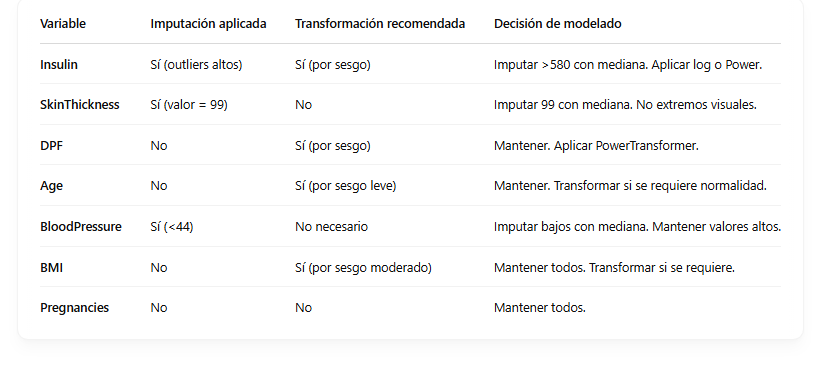

## **5.4. Análisis clínico-estadístico post-tratamiento de outliers por variable**

### **5.4.1 Insulin – Análisis post tratamiento de valores extremos**

**1. Justificación clínica**
Los niveles de insulina en ayunas varían ampliamente, pero niveles extremadamente altos (>300 μU/mL) pueden indicar resistencia severa a la insulina, mientras que niveles extremadamente bajos (<20 μU/mL) pueden ser fisiológicamente dudosos si no están bien documentados.

En población con riesgo de diabetes como los Pima, valores elevados son posibles, pero los extremos deben ser revisados.

**2. Análisis post tratamiento**

Se reemplazaron los valores de insulina >580 (valor considerado extremo tras análisis clínico y visual) por la mediana: 125.0.

No se eliminaron datos.

**Visualmente:**
- Histograma: distribución sesgada hacia la derecha.
- Boxplot: reducción de outliers extremos, manteniendo distribución original sin pérdida de datos clave.

**3. Reflexión final**

- Decisión: Imputación de valores extremos altos por la mediana para reducir sesgo sin perder información clínica.
- Justificación: Se conservan valores realistas para diabetes tipo 2, evitando distorsión en el entrenamiento del modelo.



### **5.4.2 SkinThickness – Análisis post tratamiento de valores extremos**

**1. Justificación clínica**
Valores normales de pliegue cutáneo oscilan entre 10–40 mm. Un valor de 99 mm fue identificado como outlier no fisiológico (posiblemente usado como placeholder).

**2. Análisis post tratamient**o
- Se imputó el valor 99 mm (>60mm) por la mediana: 29.0 mm.
- Se conservaron todos los registros.

**Visualmente**
- Histograma: distribución moderadamente asimétrica.
- Boxplot: outliers corregidos.

**3. Reflexión final**

- Decisión: Imputación del valor erróneo por la mediana.
- Justificación: Valor aislado no representativo. La mediana mantiene la coherencia con el resto del conjunto.

### **5.4.3 DiabetesPedigreeFunction (DPF) – Análisis post tratamiento**

**1. Justificación clínica**
La función DPF representa la predisposición genética. No tiene un rango fisiológico concreto, pero valores >1.5 son poco comunes.

**2. Análisis post tratamiento**
- No se eliminaron ni imputaron datos.
- Se detectó fuerte sesgo a la derecha.

**Visualmente**
- Histograma: asimetría pronunciada.
- Boxplot: presencia de múltiples outliers en el extremo derecho.

**3. Reflexión final**
- Decisión: No imputar ni eliminar.
- Próximo paso: aplicar PowerTransformer o log para corregir sesgo.
- Justificación: Valores son clínicamente plausibles en esta población.



### **5.4.4. Age – Análisis post tratamiento**

**1. Justificación clínica**
Edad entre 20 y 80 años. Valores extremos (como 81) son válidos, pero deben analizarse con contexto.

**2. Análisis post tratamiento**
- No se imputaron ni eliminaron datos.
- Distribución sesgada hacia la izquierda.

**Visualizar**
- Histograma → pico entre 21–30 años, cola larga.
- Boxplot → outliers moderados, pero clínicamente válidos.

**3. Reflexión final**
- Decisión: Mantener todos los registros.
- Próximo paso: posible transformación si se requiere normalidad.
- Justificación: Valores extremos plausibles en población general.

### **5.4.5. BloodPressure – Análisis post tratamiento**

**1. Justificación clínica**

Valores <44 mmHg: no compatibles con vida normal.

Valores >104 mmHg: pueden indicar hipertensión, pero no son necesariamente outliers erróneos.

**2. Análisis post tratamiento**

Valores <44 mmHg imputados con la mediana: 72.0 mmHg

Valores altos (>104 mmHg) se conservaron como extremos clínicos.

**Visualizar**
- Histograma → forma más simétrica tras imputación.
- Boxplot → limpieza de valores imposibles y conservación de extremos altos.

**3. Reflexión final**
- Decisión: Imputación de valores bajos no fisiológicos.
- Justificación: Mejora robustez del modelo sin alterar la señal de hipertensión.

### **5.4.6. BMI – Análisis post tratamiento**

**1. Justificación clínica**
El IMC es un buen indicador del estado nutricional. Valores normales:
- Normal: 18.5 – 24.9
- Sobrepeso: 25 – 29.9
- Obesidad: ≥ 30

En población con riesgo de diabetes es esperable encontrar valores >40.

**2. Análisis post tratamiento**
- No se detectaron outliers clínicamente imposibles.
- No se imputaron ni eliminaron registros.
- Distribución asimétrica hacia la derecha.

**Visualizar**
- Histograma → concentración en 25–35, pero con cola larga hacia la derecha.
- Boxplot → pocos valores extremos >50, todos plausibles.

**3. Reflexión final**
- Decisión: Mantener todos los datos sin imputación.
- Posible uso de transformación para normalización (log o PowerTransformer).
- Justificación: Distribución esperable en población con sobrepeso u obesidad.

### **5.4.7. Pregnancies – Análisis post tratamiento**

**1. Justificación clínica**
Número de embarazos a lo largo de la vida. En mujeres mayores puede alcanzar valores >10. En mujeres jóvenes (menores de 30) valores altos deben ser revisados, pero no son imposibles.

**2. Análisis post tratamiento**
- No se imputaron ni eliminaron datos.
- Valores extremos (13–17) son bajos en frecuencia, pero posibles.

**Visualizar**
- Histograma → concentración entre 0 y 6 embarazos.
- Boxplot → presencia de valores extremos, sin anomalías clínicas.

**3. Reflexión final**
- Decisión: Mantener todos los registros sin imputación.
- Justificación: En población multípara como Pima, estos valores son verosímiles.



### **5.4.8. Glucose - Análisis post tratamiento**

**1. Justificación clínica**
Según criterios clínicos:
- Normal en ayunas: 70–99 mg/dL
- Prediabetes: 100–125 mg/dL
- Diabetes: ≥ 126 mg/dL

En este dataset, los valores van de 56 a 199 mg/dL:
- El valor mínimo (56 mg/dL) indica hipoglucemia severa, pero es posible clínicamente.
- El valor máximo (199 mg/dL) refleja diabetes no controlada.

**2. Análisis post tratamiento**
- No se ha aplicado imputación ni eliminación, ya que todos los valores se consideran fisiológicamente posibles en una población en riesgo como la del estudio (Pima Indians).

**Visualizar**
- Boxplot:
  - La mayoría de los valores están dentro del rango intercuartílico.
  - No se detectan outliers según IQR, pero sí hay valores elevados clínicamente esperables.
- Histograma:
  - Distribución con asimetría hacia la derecha.
  - Se observa un número elevado de casos con niveles > 140 mg/dL, lo que concuerda con el perfil clínico de la población.

**3. Reflexión final**
- Decisión:
  - No se han tratado como outliers ni se ha imputado ningún valor.
  - Se respeta la variabilidad clínica propia de una muestra de alto riesgo de diabetes.
  - Estos valores reflejan una condición relevante y valiosa para los modelos predictivos.
- Posible transformación si se mantiene un sesgo elevado (skewness), especialmente si se observa en las métricas del modelo.



## **5.5.Reflexión conjunta del tratamiento de valores extremos**

Los valores extremos fueron gestionados de acuerdo a criterios clínicos, asegurando que las variables mantienen su relevancia diagnóstica sin distorsionar su distribución.

Este paso garantiza que el modelo no sea afectado por valores anómalos que podrían reducir su precisión.
- Se mantienen los valores clínicamente válidos y reemplazado outliers extremos en:
  - Insulin: Reemplazo por la mediana.
  - SkinThickness: Reemplazo del valor 99 por la mediana.
- No se han eliminado datos para conservar el máximo de información.
- No se han aplicado transformaciones definitivas, solo se ha definido su necesidad.

## **5.6. Análisis de asimetría (Skewness) y decisiones- Transformaciones por distribución y sesgo**

Se parte de que la mejor práctica es pensar que no todas las variables responden igual a las transformaciones, por lo que presentar y visualizar diferentes transformaciones, van a permitir elegir la más efectiva para cada una, lo que mejora el rendimiento del modelo final.

Por tanto, se analizan las variables con fuerte asimetría (skewness), pero no se aplican aún las transformaciones. Esto garantiza que las transformaciones sean reproducibles y trazables en el Feature Pipeline (Bloque 6).

- Análisis de skewness
  - Calcular skew de todas las variables numéricas.
- Decidir qué variables necesitan transformación:
  - Skew moderado:
  - Skew fuerte:
- Comparación de transformaciones
  - Probar distintas transformaciones por variable: np.log1p(),np.sqrt(), PowerTransformer
- Visualizar histograma antes/después y Comparar impacto en distribución
- Aplicación definitiva y escalado:
- Crear X_train_transformado con las transformaciones finales.
- Guardar versión transformada.

### **Crear copia segura para transformaciones**

In [ ]:
X_train_transformado = X_train_limpio.copy()

### **5.6.1. Análisis de asimetría (Skewness) de todas las variables numéricas y transformaciones**

**Objetivo**:
Detectar variables con una distribución fuertemente asimétrica que puedan distorsionar el rendimiento de los modelos de Machine Learning y tomar decisiones informadas sobre su transformación

Este análisis de la asimetría (skewness) permite identificar qué variables presentan distribuciones no normales. Una distribución muy sesgada puede provocar que los algoritmos interpreten erróneamente la importancia de ciertos valores extremos o patrones.

**Método**:
Se utiliza la métrica de asimetría (skewness) para cada variable numérica.
Mide cuánto se desvía una distribución de la simetría perfecta (la forma de una campana de Gauss).

- Skewness = 0 → distribución perfectamente simétrica.
- Skewness > 0 → sesgo positivo (cola más larga a la derecha). Muchos valores pequeños, pocos valores muy grandes.
- Skewness < 0 → sesgo negativo (cola más larga a la izquierda). Muchos valores grandes, pocos muy pequeños.

**Regla práctica**:
- skew < 0.5: distribución aproximadamente simétrica, no necesita transformación.
- 0.5 < skew < 1: moderadamente sesgada.
- skew > 1: muy sesgada, requiere transformación.

**Análisis de asimetría y transformaciones**

Se ha evaluado la distribución de las variables con asimetría (skewness) superior a 0.5 utilizando tres métodos de transformación:

- log1p(): transformación aplicando logaritmo natural + 1. Reduce las colas largas a la derecha
- np.sqrt(): Raíz cuadrada. Suaviza la asimetía positiva moderada
- PowerTransformer() (de sklearn): ajusta la variable a una distribución aproximadamente normal. Escoge automáticamente entre Box-Cox o Yeo-Johnson (más potente). Normaliza mejor que las otras, incluso si hay ceros o negativos.

**Conclusiones:**

- PowerTransformer es la transformación que **mejor reduce la asimetría** en la mayoría de las variables, con valores de skewness cercanos a 0.
- En algunos casos, como Pregnancies o Insulin, log1p también ha resultado efectiva.
- Las transformaciones se evaluarán también **visualmente** en el apartado 5.6.2 antes de tomar una decisión final.

**Importar libreria**

In [ ]:
pip install scikit-learn

In [ ]:
from scipy.stats import skew
from sklearn.preprocessing import PowerTransformer

**5.6.1.1. Comprobación de distribución y asimetría (skewness) de todas las variables numéricas**

Y mostrar solo las variables con sesgo> 0.5 (moderado o alto)

In [ ]:
# Calcular skewness (asimetría) de todas las variables numéricas. skew() calcula el coeficiente de asimetría para cada columna numérica.
skewness = X_train_transformado.skew().sort_values(ascending=False)

# Mostrar solo variables con skewness > 0.5 (sesgo moderado o alto)
print("Variables con alta asimetría (skewness > 0.5):")
print(skewness[skewness > 0.5])

**5.6.1.2. Interpretación**:

Estas variables tienen distribuciones sesgadas a la derecha, y por eso conviene aplicar transformaciones para normalizarlas, es decir, acercarlas a una distribución simétrica, más parecida a una normal. Esto facilita el trabajo de los modelos lineales y mejora estabilidad y precisión en otros modelos.

**5.6.1.3. Definir las variables con alta asimetría (skew > 0.5)**
Solo se transformarán las variables con asimetría significativa (skew > 0.5).

In [ ]:
# Variables numéricas
variables_a_transformar = ['DiabetesPedigreeFunction', 'Insulin', 'Age', 'Pregnancies','SkinThickness', 'Glucose']

# Crear un DataFrame para guardar los skewness (skew_df)
skew_df = pd.DataFrame(index=variables_a_transformar)
skew_df['Original'] = X_train_transformado[variables_a_transformar].skew()

### **5.6.2. Comparación de transformaciones (log1p, sqrt, PowerTransformer)**

Se prueban tres transformaciones para reducir la asimetría:

- log1p(): Transformación logarítmica + 1.
- sqrt(): Raíz cuadrada.
- PowerTransformer: Ajuste automático (Box-Cox o Yeo-Johnson).

In [ ]:
# Aplicar transformaciones y comparar skewness
skew_df = pd.DataFrame(index=variables_a_transformar)
skew_df['Original'] = X_train_transformado[variables_a_transformar].skew()

# Aplicar log1p
skew_df['log1p'] = X_train_transformado[variables_a_transformar].apply(lambda x: np.log1p(x)).skew()

# Aplicar raíz cuadrada (sqrt)
skew_df['sqrt'] = X_train_transformado[variables_a_transformar].apply(lambda x: np.sqrt(x)).skew()

# Aplicar PowerTransformer (Yeo-Johnson)
pt = PowerTransformer(method='yeo-johnson')
X_power = pt.fit_transform(X_train_transformado[variables_a_transformar])
skew_df['PowerTransformer'] = pd.DataFrame(X_power, columns=variables_a_transformar).skew()

**5.6.2.1. Mostrar resultados ordenados**


In [ ]:
skew_df = skew_df.sort_values('Original', ascending=False)
display(skew_df.style.background_gradient(axis=1, cmap='Blues').format("{:.3f}"))

### **5.6.3. Guardado X_train_transformado después de aplicar PowerTransformer**

Una vez aplicado PowerTransformer a las variables con alta asimetría, se guarda el conjunto X_train_transformado en la carpeta datos_procesados/escalado/.

Esto permite conservar una versión del dataset ya escalado, pero sin imputar aún los valores nulos.

Guardar el dataset en esta fase asegura la trazabilidad y permitirá reiniciar o comparar transformaciones si es necesario.

- X_train_transformado_<fecha>.csv
- Carpeta: datos_procesados/escalado/ porque PowerTransformer es una transformación de escalado/normalización


In [ ]:
# Obtener fecha actual
fecha_actual = datetime.now().strftime("%Y%m%d_%H%M")

# Guardar X_train_transformado en escalado
nombre_archivo_transformado = f"X_train_transformado_{fecha_actual}.csv"
ruta_guardado_transformado = os.path.join(ruta_datos_procesados, "escalado", nombre_archivo_transformado)
X_train_transformado.to_csv(ruta_guardado_transformado, index=False)

print(f"Dataset X_train_transformado guardado en escalado: {nombre_archivo_transformado}")

### **5.6.4. Visualización y Comparación del impacto transformaciones: probar distintas transformaciones por variable**

Realizar transformaciones visuales para justificar y mejorar la toma de decisión.

Se han realizado muestras de 4 visualizaciones por cada variable con sesgo:
- Distribución original
- Distribución tras log1p
- Distribución tras sqrt
- Distribución tras PowerTransformer

Ha permitido:
- Confirmar que PowerTransformer consigue la forma más simétrica (campana).
- Justificar visualmente que no todas las transformaciones funcionan igual en todas las variables.



In [ ]:
from sklearn.preprocessing import PowerTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

def comparar_transformaciones(var):
    """
    Visualizar la distribución original y transformada (log1p, sqrt, PowerTransformer)
    de una variable del DataFrame X_train_transformado.
    """
    # Aplicar transformaciones
    X_log = np.log1p(X_train_transformado[var])  # log(1 + x)
    X_sqrt = np.sqrt(X_train_transformado[var])  # raíz cuadrada
    X_power = PowerTransformer().fit_transform(X_train_transformado[[var]])  # PowerTransformer espera 2D

    # Visualización
    plt.figure(figsize=(16, 10))

    plt.subplot(2, 2, 1)
    sns.histplot(X_train_transformado[var], kde=True, color='steelblue')
    plt.title(f"Original: {var}")

    plt.subplot(2, 2, 2)
    sns.histplot(X_log, kde=True, color='orange')
    plt.title(f"log1p({var})")

    plt.subplot(2, 2, 3)
    sns.histplot(X_sqrt, kde=True, color='seagreen')
    plt.title(f"sqrt({var})")

    plt.subplot(2, 2, 4)
    sns.histplot(X_power, kde=True, color='purple')
    plt.title(f"PowerTransformer({var})")

    plt.suptitle(f"Comparación de transformaciones para {var}", fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()

In [ ]:
for variable in ['Insulin', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies', 'Glucose']:
    comparar_transformaciones(variable)

### **5.6.5. Evaluación de Transformaciones por Sesgo (Skewness)**

**Objetivo**
Evaluar la distribución de las variables numéricas con alta asimetría y determinar la mejor transformación para reducir el sesgo, mejorar la normalidad y optimizar el rendimiento de los modelos.

**Evaluación de Transformaciones:**
Comparados tres métodos de transformación para las variables identificadas como asimétricas:
- **log1p()**: Efectiva en variables con sesgo moderado, pero limitada en valores muy bajos o negativos.
- **sqrt()**: Útil para reducir asimetría moderada, pero no tan efectiva en distribuciones muy sesgadas.
- **PowerTransformer (Yeo-Johnson)**: Ha demostrado ser la transformación más efectiva para normalizar las variables, incluso en presencia de valores bajos o negativos.

**Interpretación de los resultados por variales**
- DiabetesPedigreeFunction (DPF):
  - Muy sesgada originalmente (1.81).
  - PowerTransformer logra una gran mejora, dejándola casi simétrica (0.136).
  - **Aplicar**: PowerTransformer
- Insulin:
  - Altamente sesgada (1.76).
  - Ambas log1p y PowerTransformer reducen significativamente el skew.
  - **Decisión**: PowerTransformer garantiza normalidad con seguridad, y es más robusta si hay valores bajos.(0.02)
  - **Aplicar**: PowerTransformer
- Age:
  - Skew moderado (1.13).
  - La transformación más efectiva es PowerTransformer (0.146).
  - **Aplicar**: PowerTransformer
- Pregnancies:
  - Todas las transformaciones ayudan.
  - Dado que es discreta, PowerTransformer sigue siendo segura.(-0.045)
  - **Aplicar**: PowerTransformer
-Glucose:
  - Skew moderado (0.55).
  - Tanto log1p como PowerTransformer corrigen eficazmente.(0.001)
  - **Aplicar**: PowerTransformer

**Conclusión**

No se ha aplicado aún ninguna transformación a las variables del dataset.
Sin embargo, los resultados del análisis indican que:
- **PowerTransformer (Yeo-Johnson)** es la transformación más efectiva para todas las variables seleccionadas.

## **5.7. Imputación final de Valores Nulos y Creación de X_train_final**

Tras aplicar las transformaciones para corregir la asimetría de las variables (PowerTransformer), permanecen valores nulos (NaN) que deben ser imputados antes del modelado.

**Objetivo** Imputar los valores nulos de forma definitiva sobre el DataFrame X_train_transformado, el cual ha pasado por:

- Reemplazo de ceros no fisiológicos por NaN (X_train_procesado)
- Tratamiento de outliers (X_train_limpio)
- Transformaciones de distribución (X_train_transformado)

Para ello:
- Se realiza la imputación usando la mediana de cada variable, ya que es una estrategia robusta frente a valores extremos.
- El dataset resultante será llamado X_train_final, que contendrá los datos:
 - Limpios de outliers
 - Transformados para corregir sesgos
 - Sin valores nulos

Esto garantiza que el conjunto de entrenamiento está completamente preparado para la fase de modelado.

### **5.7.1. Verificación de valores nulos (antes de imputar)**

In [ ]:
# Verificar si aún quedan valores nulos
nulos_restantes = X_train_transformado.isnull().sum()
print("Valores nulos restantes por variable:")
print(nulos_restantes[nulos_restantes > 0])

In [ ]:
# Visualizar los valores nulos en un mapa de calor
plt.figure(figsize=(10,5))
sns.heatmap(X_train_transformado.isnull(), cbar=False, cmap="YlGnBu")
plt.title("Mapa de valores nulos en X_train_transformado (antes de imputar)")
plt.show()


### **5.7.2. Imputación con la mediana en un dataset nuevo X_train_final**

**¿Por qué utilizo la mediana?**
La mediana es robusta frente a valores extremos, asegurando que la imputación no distorsione la distribución.

**¿Por qué X_train_final y no X_train_transformado?**
X_train_final es la versión definitiva y lista para modelado.
No afecta al dataset transformado, manteniendo trazabilidad.

**¿Está ya transformado este dataset?**
NO, aquí solo se ha imputado. Las transformaciones se aplicarán en el Feature Pipeline (Bloque 6), asegurando reproducibilidad.

In [ ]:
#Crear una copia para trabajar
X_train_final = X_train_transformado.copy()

In [ ]:
# Imputar valores nulos con la mediana
X_train_final = X_train_final.fillna(X_train_final.median())

### **5.7.3.  Confirmación de que no quedan nulos**

In [ ]:
print("Valores nulos restantes tras la imputación:")
print(X_train_final.isnull().sum())

### **5.7.4. Guardado del dataset final transformado y limpio**

In [ ]:
# Definir ruta de guardado
base_path = "/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes"
ruta_final = os.path.join(base_path, "datos_procesados/final")

# Crear la carpeta final
os.makedirs(ruta_final, exist_ok=True)

# Guardar el dataset imputado y transformado
fecha_hora = datetime.now().strftime("%Y%m%d_%H%M")
nombre_archivo = f"X_train_final_{fecha_hora}.csv"
ruta_guardado = os.path.join(ruta_final, nombre_archivo)

X_train_final.to_csv(ruta_guardado, index=False)

print(f" Dataset `X_train_final` guardado correctamente en: {ruta_guardado}")

## **5.8 Revisión final de X_train_final antes del pipeline**

**Tras la imputación final** y antes de avanzar al escalado, codificación y creación del Feature Pipeline, es fundamental revisar que el dataset X_train_final:
- Vista previa:	Que las variables y registros sean coherentes
- Estadísticas descriptivas:	Que los valores mínimos, máximos y medianas sean razonables
- Comprobación de valores nulos:	Que no queden datos faltantes que afecten el entrenamiento
- Tipos de datos_	Que todo esté en formato numérico o correcto para modelado

Esta estrategia es robusta frente a outliers y adecuada para modelos sensibles a distorsiones.

Se ha aplicado sobre un dataset clínicamente validado, corregido y transformado.

Ya se encuentra listo para el escalado, ingeniería de variables o uso directo en un pipeline evitando errores posteriores

In [ ]:
# 1. Visualizar las primeras filas del DataFrame transformado
print("Vista previa de X_train_final:")
display(X_train_final.head())

# 2. Estadísticas descriptivas del DataFrame
print("Estadísticas básicas por variable:")
display(X_train_final.describe().T)

# 3. Comprobación de valores nulos por columna
print("Comprobación de valores nulos por columna:")
print(X_train_final.isnull().sum())

# 4. Comprobación de tipos de datos
print("Tipos de datos por columna:")
print(X_train_final.dtypes)

## **5.9. Trazabilidad de versiones y dataset generados**

**Objetivo**

Registrar ordenadamente todos los datasets creados hasta ahora (con sus fechas, rutas y descripciones), para llevar un control de la evolución de los datos en el proyecto.

Durante el proceso de procesamiento, limpieza y transformación del conjunto de entrenamiento (X_train), se han creado y guardado diferentes versiones intermedias para facilitar el control y la trazabilidad de los cambios aplicados.

Cada versión corresponde a un paso específico del flujo de trabajo de limpieza y transformación, y ha sido guardada en su carpeta correspondiente en Google Drive, de acuerdo a la estructura establecida.

- Saber en qué estado estaba cada dataset en cada momento.
- Recuperar versiones anteriores si es necesario.
- Mejorar la organización y trazabilidad del proyecto.
- Facilitar la replicabilidad y transparencia..

In [ ]:
# Definir manualmente las versiones creadas hasta ahora
datasets_info = [
    {
        "Archivo": "X_train.csv",
        "Descripción": "Conjunto de entrenamiento original (sin modificaciones)",
        "Carpeta": "datos_procesados/original"
    },
    {
        "Archivo": "X_test.csv",
        "Descripción": "Conjunto de test original (sin modificaciones)",
        "Carpeta": "datos_procesados/original"
    },
    {
        "Archivo": "y_train.csv",
        "Descripción": "Variable objetivo de entrenamiento",
        "Carpeta": "datos_procesados/original"
    },
    {
        "Archivo": "y_test.csv",
        "Descripción": "Variable objetivo de test",
        "Carpeta": "datos_procesados/original"
    },
    {
        "Archivo": "X_train_procesado.csv",
        "Descripción": "Conjunto de entrenamiento con ceros no fisiológicos reemplazados por NaN",
        "Carpeta": "datos_procesados/imputado"
    },
    {
        "Archivo": "X_train_limpio.csv",
        "Descripción": "Conjunto de entrenamiento tras tratamiento de outliers (sin imputar nulos)",
        "Carpeta": "datos_procesados/limpieza"
    },
    {
        "Archivo": "X_train_transformado.csv",
        "Descripción": "Conjunto de entrenamiento transformado con PowerTransformer (antes de imputación)",
        "Carpeta": "datos_procesados/escalado"
    },
    {
        "Archivo": "X_train_final.csv",
        "Descripción": "Conjunto de entrenamiento definitivo: transformado y con nulos imputados (versión final)",
        "Carpeta": "datos_procesados/final"
    },
]

# Convertir a DataFrame
df_trazabilidad = pd.DataFrame(datasets_info)

# Ver trazabilidad
display(df_trazabilidad)

# Guardar trazabilidad en la carpeta resultados
fecha_actual = datetime.now().strftime("%Y%m%d_%H%M")
nombre_archivo = f"trazabilidad_datasets_{fecha_actual}.csv"
ruta_guardado = os.path.join("/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes/resultados", nombre_archivo)

df_trazabilidad.to_csv(ruta_guardado, index=False)

# Mostrar tabla de trazabilidad
print(f" Trazabilidad guardada correctamente en: {ruta_guardado}")

# **6. Feature Pipeline profesional (preparación para modelado)**

## **6.1 Objetivo del Feature Pipeline**

Antes de entrenar los modelos de Machine Learning, es fundamental preparar los datos correctamente.

El objetivo de esta sección es construir un Feature Pipeline que automatice el preprocesamiento de datos de las variables antes del modelado.

**Este Feature Pipeline incluye**:
1. Pipeline V1:
- Imputación de valores nulos con la mediana (seguridad para datos nuevos): Técnica (SimpleImputer(strategy='median')), porque aunque no haya nulos ahora, puede haber en datos futuros. Esto garantiza consistencia incluso en nuevos datos.
- Transformación para corregir sesgo (skewness) mediante PowerTransformer en variables altamente asimétricas. Esto mejora la normalidad de las distribuciones y optimiza el rendimiento de modelos lineales.
- Estandarización (escalado) de variables numéricas restantes para igualar la media y la varianza (StandardScaler, media 0, varianza 1). Esto es fundamental para modelos que dependen de la escala de las variables, como Logistic Regression y SVC.

2. Pipeline V2:
- Imputación de valores nulos con la mediana (SimpleImputer(strategy='median')).
- Estandarización (escalado) de todas las variables numéricas (StandardScaler), sin aplicar PowerTransformer. Esto mantiene las distribuciones originales, pero asegura que todas las variables estén en la misma escala.

**Por qué crear dos pipelines**
- Permite comparar el impacto de las transformaciones avanzadas (PowerTransformer) frente a un escalado estándar (StandardScaler).
- Mejora la trazabilidad y reproducibilidad del proyecto, permitiendo evaluar cuál de las transformaciones ofrece mejores resultados en los modelos.
- Simplifica el análisis y comparación de modelos, ya que se entrenan con dos versiones de los datos (V1 y V2).

**Beneficios**
- Mejora la trazabilidad y facilita la validación cruzada.
- Automatización completa del preprocesamiento en entrenamiento y validación.
- Optimización del rendimiento de modelos sensibles a la escala y normalidad.
- Facilidad de mantenimiento y mejora futura.
- Coherencia clínica y estadística con las transformaciones justificadas en el análisis previo.

**Herramientas utilizadas**
- SimpleImputer (de sklearn.impute) para imputación.
- PowerTransformer (de sklearn.preprocessing) para normalización.
- StandardScaler (de sklearn.preprocessing) para escalado estándar.
- ColumnTransformer (de sklearn.compose) para aplicar diferentes transformaciones según las variables.

**Resultado esperado**
1. Construir dos Feature Pipelines modulares que podrán ser:
- Entrenados (fit_transform) sobre el conjunto de entrenamiento, convertir a DataFrame y guardar.
- Aplicados (transform) sobre el conjunto de test o futuros datos, convertir a DataFrame y guardar.
- Es decir, guardados y reutilizados en producción si es necesario.




## **6.2 Creación del Feature Pipeline**

Se construyen dos Feature Pipelines utilizando ColumnTransformer y Pipeline para aplicar imputación y escalado a las variables numéricas.

1. Pipeline V1:
- Imputación de valores nulos mediante la mediana (SimpleImputer).
- Transformación de variables con alta asimetría (PowerTransformer).
- Estandarización de las demás variables numéricas (StandardScaler).
2. Pipeline V2:
- Imputación de valores nulos mediante la mediana (SimpleImputer).
- Estandarización de todas las variables numéricas (StandardScaler), sin transformación avanzada.






### **6.2.1 Definición de Variables para Transformación**

In [ ]:
# Definir las variables a transformar
variables_powertransformer = ['Insulin', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies', 'Glucose'] # Separar las variables (variables_powertransformer) muy asimétricas (que necesitan normalización con PowerTransformer).
variables_standardscaler = ['BloodPressure', 'SkinThickness', 'BMI'] # Separar las variables moderadamente sesgadas (que solo necesitan escalado estándar).

### **6.2.2 Creación del Feature Pipeline V1 y V2**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
# Pipeline V1: Imputación + PowerTransformer + StandardScaler
pipeline_v1 = ColumnTransformer(transformers=[
    ('skewed', Pipeline(steps=[
        ('imputacion', SimpleImputer(strategy='median')),# Reemplaza nulos con la mediana
        ('powertransform', PowerTransformer(method='yeo-johnson')),# Transformación para corregir sesgo
        ('escalado', StandardScaler()) # Escala los datos con la mdia 0 y varianza 1
    ]), variables_powertransformer),
    ('standard', Pipeline(steps=[
        ('imputacion', SimpleImputer(strategy='median')),
        ('escalado', StandardScaler())
    ]), variables_standardscaler)
])

# Pipeline V2: Imputación + StandardScaler (Sin PowerTransformer)
pipeline_v2 = ColumnTransformer(transformers=[
    ('standard', Pipeline(steps=[
        ('imputacion', SimpleImputer(strategy='median')),# Reemplaza nulos con la mediana
        ('escalado', StandardScaler())
    ]), variables_powertransformer + variables_standardscaler)
])

print("Feature Pipelines V1 y V2 creados correctamente.")

### **6.2.3 Guardado y Versionado de los Pipelines**

In [ ]:
import joblib

# Rutas claras y bien definidas
ruta_pipelines = "/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes/pipelines"
os.makedirs(ruta_pipelines, exist_ok=True)

# Guardar los Pipelines V1 y V2
joblib.dump(pipeline_v1, os.path.join(ruta_pipelines, 'pipeline_v1.pkl'))
joblib.dump(pipeline_v2, os.path.join(ruta_pipelines, 'pipeline_v2.pkl'))

print("Pipelines V1 y V2 guardados correctamente en la carpeta pipelines.")

## **6.3 Aplicar los Pipelines al Conjunto de Entrenamiento**

El Feature Pipeline:
- No transforma otra vez el X_train_transformado ni el X_train_limpio.
- Se entrena (fit_transform) sobre X_train_final, que ya está transformado e imputado manualmente.

Pero por buenas prácticas aplica su propio flujo más limpio y con lógica de producción:
- Vuelve a aplicar SimpleImputer(median) como medida de seguridad para datos nuevos (aunque ya no haya nulos).
- Aplica de nuevo PowerTransformer y StandardScaler, pero esta vez como parte de un flujo automático y reproducible.

**Explicación:**: fit_transform() aplica todos los pasos definidos en el pipeline:
- **Imputación con seguridad**: Primero imputa valores nulos con la mediana (aunque ya tratamos la mayoría, es útil tenerlo como seguridad).
- **Estandarización:** Luego escala los datos con StandardScaler para que todas las variables estén en la misma escala (media 0, desviación estándar 1).
- **Resultado**: como un array de NumPy con todas las variables transformadas (imputadas y escaladas), para entrenar modelos.

### **6.3.1 Aplicar el Pipeline V1 y guardado entrenado**

In [ ]:
X_train_final_v1 = pipeline_v1.fit_transform(X_train_final)
X_train_final_v1_df = pd.DataFrame(X_train_final_v1, columns=variables_powertransformer + variables_standardscaler)
print("Dimensiones del dataset transformado (V1):", X_train_final_v1_df.shape)

In [ ]:
joblib.dump(pipeline_v1, os.path.join(ruta_pipelines, 'pipeline_v1_fitted.pkl'))

### **6.3.2 Aplicar el Pipeline V2 y guardado entrenado**

In [ ]:
X_train_final_v2 = pipeline_v2.fit_transform(X_train_final)
X_train_final_v2_df = pd.DataFrame(X_train_final_v2, columns=variables_powertransformer + variables_standardscaler)
print("Dimensiones del dataset transformado (V2):", X_train_final_v2_df.shape)

In [ ]:
joblib.dump(pipeline_v2, os.path.join(ruta_pipelines, 'pipeline_v2_fitted.pkl'))


## **6.4 Aplicar los Pipelines al Conjunto de Test**

### **6.4.1 Aplicar el Pipeline V1**

In [ ]:
X_test_final_v1 = pipeline_v1.transform(X_test)
X_test_final_v1_df = pd.DataFrame(X_test_final_v1, columns=variables_powertransformer + variables_standardscaler)

### **6.4.2 Aplicar el Pipeline V2**

In [ ]:
X_test_final_v2 = pipeline_v2.transform(X_test)
X_test_final_v2_df = pd.DataFrame(X_test_final_v2, columns=variables_powertransformer + variables_standardscaler)

## **6.5 Guardado y Versionado de Datasets Transformados**

In [ ]:
ruta_datos_procesados = "/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes/datos_procesados/final"
os.makedirs(ruta_datos_procesados, exist_ok=True)

# Guardar los datasets transformados (V1 y V2)
X_train_final_v1_df.to_csv(os.path.join(ruta_datos_procesados, 'X_train_final_v1.csv'), index=False)
X_test_final_v1_df.to_csv(os.path.join(ruta_datos_procesados, 'X_test_final_v1.csv'), index=False)
X_train_final_v2_df.to_csv(os.path.join(ruta_datos_procesados, 'X_train_final_v2.csv'), index=False)
X_test_final_v2_df.to_csv(os.path.join(ruta_datos_procesados, 'X_test_final_v2.csv'), index=False)
X_test_final_v2_df.to_csv('X_test_final_v2.csv', index=False)

print('Dataset transformados V1 y V2  guardados correctamente en la carpeta final')

## **6.6. Trazabilidad actualizada post Feature Pipeline v1**

**Documentar Trazabilidad**
- Pipeline V1: Imputación + PowerTransformer + StandardScaler.
- Pipeline V2: Imputación + StandardScaler.
- Datasets transformados guardados: X_train_final_v1, X_test_final_v1, X_train_final_v2, X_test_final_v2.





In [ ]:
import pandas as pd
import os
from datetime import datetime

# 1. Definir la fecha actual para el versionado
fecha_actual = datetime.now().strftime("%Y%m%d_%H%M")

# 2. Definir las rutas base
ruta_resultados = '/content/drive/MyDrive/proyecto_diabetes/resultados'
os.makedirs(ruta_resultados, exist_ok=True)

# 3. Definir los elementos de trazabilidad
trazabilidad_data = [
    {"Archivo": "diabetes_informe.csv", "Descripción": "Dataset original sin modificaciones", "Carpeta": "datos_originales"},
    {"Archivo": "X_train.csv", "Descripción": "Conjunto de entrenamiento original (sin modificaciones)", "Carpeta": "datos_procesados/original"},
    {"Archivo": "X_test.csv", "Descripción": "Conjunto de test original (sin modificaciones)", "Carpeta": "datos_procesados/original"},
    {"Archivo": "feature_pipeline_v1.pkl", "Descripción": "Feature Pipeline V1: Imputación + PowerTransformer + StandardScaler", "Carpeta": "pipelines"},
    {"Archivo": "feature_pipeline_v2.pkl", "Descripción": "Feature Pipeline V2: Imputación + StandardScaler", "Carpeta": "pipelines"},
    {"Archivo": "X_train_final_v1.csv", "Descripción": "Conjunto de entrenamiento transformado: PowerTransformet + StandardScaler (V1)", "Carpeta": "datos_procesados/final"},
    {"Archivo": "X_test_final_v1.csv", "Descripción": "Conjunto de test transformado (V1)", "Carpeta": "datos_procesados/final"},
    {"Archivo": "X_train_final_v2.csv", "Descripción": "Conjunto de entrenamiento transformado StandardScaler (V2)", "Carpeta": "datos_procesados/final"},
    {"Archivo": "X_test_final_v2.csv", "Descripción": "Conjunto de test transformado (V2)", "Carpeta": "datos_procesados/final"}
]

# 4. Convertir a DataFrame para visualización
df_trazabilidad = pd.DataFrame(trazabilidad_data)

# 5. Guardar el archivo de trazabilidad
nombre_trazabilidad = f"trazabilidad_proyecto_diabetes_{fecha_actual}.csv"
df_trazabilidad.to_csv(os.path.join(ruta_resultados, nombre_trazabilidad), index=False)

# 6. Mostrar el resultado
print(f"Trazabilidad del proyecto guardada correctamente en: {nombre_trazabilidad}")
display(df_trazabilidad)

# **7. Análisis previo al modelado (Evaluación del objetivo y relevancia de variables)**

## **7.1. Análisis del desbalanceo del conjunto de entrenamiento (y_train)**

### **Objetivo**

**Justificación clínica**

En un problema de predicción de diabetes, detectar correctamente los casos positivos (diabetes = 1) es prioritario desde el punto de vista clínico.
Un dataset desbalanceado puede llevar a que el modelo aprenda a predecir mayoritariamente la clase mayoritaria, ignorando la minoritaria.

 **Objetivo del análisis**
 - Verificar si las clases (0 = No diabetes, 1 = Diabetes) están desbalanceadas en el conjunto de entrenamiento (y_train).
- Evaluar el impacto clínico del desbalance.
- Decidir si aplicamos técnicas de balanceo (SMOTE, class_weight='balanced').

In [ ]:
import glob

# Buscar el archivo y_train más reciente directamente en la carpeta original
archivos_y_train_original = glob.glob("/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes/datos_procesados/original/y_train_*.csv") #glob permite buscar archivos con patrones de búsqueda

# Verificar si se encontraron archivos y ordenarlos por fecha de creación (último creado)
if archivos_y_train_original:
    archivos_y_train_original.sort(key=os.path.getmtime, reverse=True)  # Ordenar por fecha de modificación (último)
    archivo_y_train_reciente = archivos_y_train_original[0]  # El más reciente
    print(f"Archivo y_train más reciente encontrado: {archivo_y_train_reciente}")

    # Cargar el archivo más reciente
    y_train = pd.read_csv(archivo_y_train_reciente)

    # Verificar que es una serie (vector) y no un DataFrame
    if isinstance(y_train, pd.DataFrame):
        y_train = y_train.squeeze()  # Convertir a serie si es DataFrame

    # Recalcular el conteo de clases y porcentajes de manera clara
    conteo = y_train.value_counts()
    porcentajes = y_train.value_counts(normalize=True) * 100

    print("Conteo de clases:")
    print(conteo)

    print("\nPorcentaje por clase:")
    print(porcentajes.round(2))

# Visualización de la distribución de clases en y_train (corregida sin warning)
plt.figure(figsize=(6,4))
sns.barplot(x=conteo.index.astype(str), y=conteo.values, hue=conteo.index.astype(str), palette='pastel', dodge=False)
plt.title('Distribución de Clases en y_train')
plt.xlabel('Clase (Outcome)')
plt.ylabel('Número de muestras')

# Añadir etiquetas de las clases directamente
for i, value in enumerate(conteo.values):
    plt.text(i, value + 10, str(value), ha='center')

plt.legend(['No diabetes (0)', 'Diabetes (1)'], loc='upper right')
plt.show()

### ****7.1.1. Análisis del Desbalance de Clases en el Conjunto de entrenamiento y_train****

**Distribución de Clases:**
- Clase 0 (No diabetes): 400 muestras (65.15%)
- Clase 1 (Diabetes): 214 muestras (34.85%)

**Interpretación Clínica:**

El conjunto de entrenamiento está desbalanceado (65% No Diabetes vs 35% Diabetes).

Desde un punto de vista clínico, nos interesa detectar correctamente los casos positivos (diabetes).

Esto significa que un modelo podría:
- Aprender a predecir principalmente la clase mayoritaria (No Diabetes).
- Tener un bajo recall (sensibilidad) para la clase minoritaria (Diabetes), lo cual es peligroso desde el punto de vista clínico.

**Decisión Técnica y Clínica:**

No se aplica balanceo aún.
Este punto tiene un objetivo exploratorio y se realiza antes del entrenamiento base. El desbalance se abordará en fases posteriores:

- Aplicar técnicas de balanceo en la fase de modelado y optimización (posterior)
- Se aplicará SMOTE (Synthetic Minority Over-sampling Technique) solo a los modelos donde sea necesario (Logistic Regression, SVC).
- Se usará class_weight='balanced' en modelos que lo soporten (Logistic Regression, RandomForest).
- Se evaluará si el balance mejora las métricas de recall y F1-score para la clase positiva (diabetes).

**¿Cuándo aplico las técnicas de balanceo? **
-En la fase de modelado
- Entrenar modelos sin balanceo (para tener una referencia base).
- Aplicar SMOTE y class_weight='balanced' y compararemos los resultados.

Esto garantiza que se comprenda mejor el impacto del balanceo.



## **7.2. Renombrar la variable objetivo y_train para tener mayor claridad sin modificar el objetivo final**

Para mantener una buena organización y trazabilidad del proyecto, se crea una copia definitiva y trazable de la variable objetivo y_train con el nombre y_train_final, y se guarda en la carpeta datos_procesados/final/, junto con los conjuntos X_train_final_v1.csv y X_test_final_v1.csv - X_train_final_v2.csv y X_test_final_v2.csv.

Esto permite:
- Clarificar que esta versión será la utilizada en el entrenamiento de los modelos.
- Asegurar la consistencia con los conjuntos de datos procesados y transformados.
- Facilitar la carga directa del dataset final para futuros procesos de reentrenamiento o validación externa.

**Nota**: No se realizan transformaciones adicionales sobre la variable objetivo, ya que no requiere escalado ni normalización.

In [ ]:
# Dado que y_train ya está definido y es el objetivo final, lo renombramos para mayor claridad
y_train_final = y_train.copy()

# Definir la ruta de guardado
ruta_final = "/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes/datos_procesados/final"
# Guardar y_train_final
y_train_final.to_csv(f"{ruta_final}/y_train_final.csv", index=False)

# Verificando la copia
print("Conjunto objetivo (y_train_final) creado correctamente:", y_train_final.shape)
# Confirmar guardado
print(f"y_train_final guardado correctamente en: {ruta_final}/y_train_final.csv")

## **7.3. Análisis de Importancia de Variables (V1 y V2)**

### **Objetivo**

Evaluar la importancia de cada variable predictora en relación con el diagnóstico de diabetes utilizando dos métodos complementarios:
- **SelectKBest con ANOVA F-score**: mide la relación estadística entre cada variable independiente y la variable objetivo.
- **RandomForestClassifier:** evalúa cuánto contribuye cada variable a la predicción del modelo, incluyendo relaciones no lineales.

**Justificación técnica y clínica:**
- Combinamos dos perspectivas (estadística y de modelo) para tomar decisiones más robustas.
- La comparación entre V1 (con PowerTransformer) y V2 (solo StandardScaler) nos permite observar si las transformaciones afectan la relevancia de las variables

### **Importar librerias**

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

### **Cargar datasets s (V1 y V2) y y_train_final**

En este análisis se utilizan directamente los conjuntos de datos transformados en el punto 6.6 y la variable objetivo renombrada en el punto 7.2. No es necesario volver a cargarlos, ya que se ha verificado que los archivos más recientes están correctamente definidos y disponibles en memoria:
- X_train_final_v1_df: Dataset transformado con PowerTransformer + StandardScaler (V1)
- X_train_final_v2_df: Dataset transformado solo con StandardScaler (V2)
- y_train_final: Variable objetivo


In [ ]:
# Definir rutas base
ruta_final = "/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes/datos_procesados/final"

# Carga explícita SIN prefijos ambiguos
X_train_v1 = pd.read_csv(os.path.join(ruta_final, "X_train_final_v1.csv"))  # 8 variables
X_train_v2 = pd.read_csv(os.path.join(ruta_final, "X_train_final_v2.csv"))  # 8 variables
y_train_final = pd.read_csv(os.path.join(ruta_final, "y_train_final.csv")).squeeze()  # Variable objetivo

# Confirmar dimensiones
X_train_v1.shape, X_train_v2.shape, y_train_final.shape


### **7.3.1. Análisis con SelectKBest y RandomForest en V1 y en V2 y Normalización**

Ahora podemos aplicar el análisis de importancia de variables sin errores, utilizando esta variable objetivo (y_train_final).
- Aplicar SelectKBest (F-score) y RandomForest (Feature Importance) a ambas versiones del dataset (V1 y V2).
- Normalizar las métricas para facilitar la comparación visual.

In [ ]:
# Análisis de Importancia de Variables con SelectKBest y RandomForest para V1
# SelectKBest (F-Score) en V1
selector_v1 = SelectKBest(score_func=f_classif, k='all')
selector_v1.fit(X_train_v1, y_train_final)
scores_v1 = selector_v1.scores_

# RandomForest (Feature Importance) en V1
rf_v1 = RandomForestClassifier(random_state=42)
rf_v1.fit(X_train_v1, y_train_final)
importancias_v1 = rf_v1.feature_importances_

# Análisis de Importancia de Variables con SelectKBest y RandomForest para V2
# SelectKBest (F-Score) en V2
selector_v2 = SelectKBest(score_func=f_classif, k='all')
selector_v2.fit(X_train_v2, y_train_final)
scores_v2 = selector_v2.scores_

# RandomForest (Feature Importance) en V2
rf_v2 = RandomForestClassifier(random_state=42)
rf_v2.fit(X_train_v2, y_train_final)
importancias_v2 = rf_v2.feature_importances_

# Crear DataFrame comparativo
comparacion_importancia = pd.DataFrame({
    'Variable': X_train_v1.columns,
    'Score (V1)': scores_v1,
    'Importancia (V1)': importancias_v1,
    'Score (V2)': scores_v2,
    'Importancia (V2)': importancias_v2
})

# Normalizar las métricas para visualización () mejor comparación (0 a 1))
scaler = MinMaxScaler()
comparacion_importancia[['Score Normalizado (V1)', 'Importancia Normalizada (V1)',
                         'Score Normalizado (V2)', 'Importancia Normalizada (V2)']] = scaler.fit_transform(
    comparacion_importancia[['Score (V1)', 'Importancia (V1)', 'Score (V2)', 'Importancia (V2)']]
)

# Calcular promedio de importancia
comparacion_importancia['Promedio Importancia'] = comparacion_importancia[['Importancia (V1)', 'Importancia (V2)']].mean(axis=1)
# Ordenar por promedio de importancia (de mayor a menor)
comparacion_importancia.sort_values(by='Promedio Importancia', ascending=False, inplace=True)

display(comparacion_importancia)

# Guardar para trazabilidad
ruta_importancia = os.path.join(ruta_final, "comparacion_importancia_variables.csv")
comparacion_importancia.to_csv(ruta_importancia, index=False)

### **7.3.2. Análisis de los resultados**

**Las variables más importantes en ambos enfoques son:**
- **Glucose (Glucosa):** Es la variable más importante y consistentemente relevante en V1 y V2.
- **BMI (Índice de Masa Corporal):** Segunda variable más importante, con alta relevancia clínica.
- **Age (Edad):** Importante en ambos enfoques, relacionado con el riesgo de diabetes.
- **DiabetesPedigreeFunction:** Muestra una importancia moderada, reflejando la influencia genética.
- **Insulin (Insulina):** Importancia baja, pero consistente en ambos métodos.

Las variables **menos importantes** son:
- BloodPressure (Presión Arterial)
- Pregnancies (Embarazos)
- SkinThickness (Espesor de Piel)

**Interpretación Clínica:**
- La Glucosa, el BMI y la Edad son clínicamente las más relevantes.
- La Insulina y la Función de Pedigrí de Diabetes también son importantes, aunque con menor peso.
- Las demás variables tienen una menor contribución al modelo, pero su exclusión o inclusión debe ser justificada.

### **7.3.3. Visualización Comparativa de Importancia de Variables (V1 vs. V2)**

In [ ]:
# Visualización Comparativa de Importancia de Variables (V1 vs V2)
plt.figure(figsize=(12, 8))
sns.set_palette("Blues")  # Utilizando una paleta de azules suaves

# Preparar los datos para la visualización
df_melt = comparacion_importancia.melt(
    id_vars='Variable',
    value_vars=[
        'Score Normalizado (V1)', 'Importancia Normalizada (V1)',
        'Score Normalizado (V2)', 'Importancia Normalizada (V2)'
    ],
    var_name='Métrica',
    value_name='Valor Normalizado'
)

# Visualización con gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melt, x='Valor Normalizado', y='Variable', hue='Métrica', palette='Blues')
plt.title("Comparativa de Importancia de Variables (V1 vs V2)", fontsize=14)
plt.xlabel("Importancia Normalizada")
plt.ylabel("Variable")
plt.legend(title="Métrica", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### **7.3.4. Análisis de la Visualización comparativa de Importacia de Variables (V1 vs V2)**

La gráfica muestra la importancia normalizada de cada variable utilizando dos métodos:
-** SelectKBest (F-Score):** Método estadístico para evaluar la relación de cada variable con la clase objetivo (Diabetes).
**- RandomForest (Feature Importance):** Método basado en árboles que evalúa la capacidad predictiva de cada variable.

Los **resultados** obtenidos mediante SelectKBest (F-score) y RandomForestClassifier (Feature Importance) en ambos pipelines (V1 con PowerTransformer, y V2 sin él) muestran una alta consistencia entre las variables más relevantes. Las métricas han sido normalizadas para facilitar la comparación.

**Variables con mayor importancia técnica y clínica:**
1. **Glucose**: Es claramente el predictor más importante (máxima puntuación en ambos métodos y versiones). Representa directamente la glucemia, un indicador clínico clave en el diagnóstico de diabetes.
2. **BMI (Índice de masa corporal):** Segundo en importancia. Su relevancia está relacionada con el sobrepeso y obesidad, factores de riesgo reconocidos.
3. **Age**: Edad avanzada está clínicamente asociada con mayor probabilidad de desarrollar diabetes tipo 2.
4. **DiabetesPedigreeFunction**: Aporta información sobre el riesgo genético. Tiene un impacto técnico más visible en Random Forest.
5. **Insulin**: A pesar de su relevancia clínica, tiene una puntuación técnica moderada. Se mantendrá para análisis posteriores.
**Variables con menor relevancia técnica:**
1. **Pregnancies**: Aunque tiene menor impacto técnico, se considera clínicamente relevante en poblaciones con alta natalidad, como las mujeres Pima. Se evaluará su impacto en modelos simplificados.
2. **BloodPressure y SkinThickness:** Son las menos importantes en promedio. Su impacto clínico es indirecto y pueden eliminarse en fases experimentales de modelado reducido.




### **7.3.5. Análisis e interpretación clínica y estadística**

In [ ]:
#Tabla comparativa con degradado azul (para análisis técnico-clínico)
# Mostrar tabla con estilo visual en Colab
columnas_formato = [
    'Score (V1)', 'Importancia (V1)',
    'Score (V2)', 'Importancia (V2)',
    'Score Normalizado (V1)', 'Importancia Normalizada (V1)',
    'Score Normalizado (V2)', 'Importancia Normalizada (V2)',
    'Promedio Importancia'
]

# Visualización estilizada
display(
    comparacion_importancia
    .style
    .background_gradient(subset=columnas_formato, cmap="Blues")
    .format("{:.3f}", subset=columnas_formato)
    .set_properties(**{'text-align': 'center'})
)

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Crear DataFrame con Score e Importancia
comparacion_clinica = pd.DataFrame({
    'Variable': ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction', 'Insulin', 'BloodPressure', 'Pregnancies', 'SkinThickness'],
    'Score': [202.384, 76.119, 57.824, 19.337, 59.265, 23.800, 19.148, 35.535],
    'Importancia': [0.260, 0.159, 0.131, 0.122, 0.088, 0.085, 0.082, 0.073],
    'Interpretación clínica': [
        'Principal marcador de diagnóstico de diabetes (glucosa en sangre).',
        'Indicador de obesidad, asociado fuertemente a diabetes tipo 2.',
        'La edad es un factor de riesgo natural en la aparición de diabetes.',
        'Función hereditaria. Cuanto mayor, más predisposición genética.',
        'Marcador de resistencia a la insulina o sensibilidad disminuida.',
        'Puede estar alterada en casos de complicaciones vasculares.',
        'Importante en mujeres por riesgo de diabetes gestacional.',
        'Refleja grasa subcutánea. Menor relación directa con diabetes.'
    ]
})

# Escalar métricas para visualización (no afecta al análisis)
scaler = MinMaxScaler()
comparacion_clinica[['Score', 'Importancia']] = scaler.fit_transform(comparacion_clinica[['Score', 'Importancia']])

# Formatear tabla visual
comparacion_clinica.set_index("Variable", inplace=True)
display(comparacion_clinica.style
        .background_gradient(axis=1, cmap="Blues")
        .format("{:.3f}", subset=["Score", "Importancia"])
        .set_properties(subset=["Interpretación clínica"], **{'text-align': 'left'}))

**Las 4 Variables Más Importantes son Consistentes y Clínicamente Relevantes:**
- Glucose (Glucosa): Claramente el predictor más fuerte de diabetes.
- BMI (Índice de Masa Corporal): El sobrepeso es un factor de riesgo para la diabetes.
- Age (Edad): La diabetes es más frecuente a mayor edad.
- DiabetesPedigreeFunction: Muestra la predisposición genética a la diabetes.

**Relevancia media**
- Insulin (Insulina) importante para evaluar la resistencia a la insulina, pero su baja importancia podría deberse a la variabilidad en los datos.

**Las variables menos importantes son:**
- BloodPressure (Presión Arterial): Tiene baja relevancia, su relación con diabetes es indirecta.
- Pregnancies (Embarazos): Aunque clínicamente relevante (diabetes gestacional), su impacto en este dataset es bajo.
- SkinThickness (Espesor de Piel): Muy baja relevancia, sin impacto claro en el modelo.

**Opciones Técnicas para Selección de Variables:**

1 **Mantener Todas las Variables (Estrategia Inicial):**
- Pros:
  - No se pierde información potencial.
   -Permite analizar el impacto de cada variable.
- Contras:
  - El modelo puede ser menos eficiente (incluye variables de baja relevancia).
  - Mayor riesgo de sobreajuste.
2. **Mantener las 5 Más Importantes** (Glucose, BMI, Age, DiabetesPedigreeFunction, Insulin):
- Pros:
  - Simplifica el modelo sin perder las variables clave.
  - Aumenta la eficiencia y claridad del modelo.
  - Las variables seleccionadas tienen relevancia clínica y predictiva.
- Contras:
  - Se pueden perder pequeñas contribuciones combinadas de otras variables.
3. **Mantener Solo las Variables Consistentes en Ambos Métodos:**
Variables: Glucose, BMI, Age, DiabetesPedigreeFunction.
- Pros:
  - Simplificación máxima, sin pérdida de información relevante.
  - Solo mantener las variables que son consistentes en su importancia.
- Contras:
  - Se puede perder el impacto de Insulin, que puede ser relevante en combinación.



### **7.3.6. Decisión final de selección de variables**

**Recomendación Profesional:**

**Contexto Clínico: Población Pima**
- Alta natalidad: El número de embarazos (Pregnancies) puede ser un factor clínicamente relevante.
- Características Genéticas: La variable DiabetesPedigreeFunction refleja el riesgo genético.
- Problemas Metabólicos: Variables como Glucose, BMI, Insulin y Age son críticas para evaluar el riesgo de diabetes.
- Presión Arterial y SkinThickness son menos relevantes para este grupo.

**DECISIÓN**

- **Fase 1 Modelos con todas las variables:**

Se utilizarán las 8 variables disponibles para entrenar todos los modelos clásicos y evaluar su rendimiento global. Esta fase busca capturar toda la información posible del dataset original.
  - Variables utilizadas: ['Glucose', 'BMI', 'Insulin', 'Age', 'Pregnancies', 'BloodPressure', 'SkinThickness', 'DiabetesPedigreeFunction']

**Justificación:**
- Permite aprovechar toda la información clínica y técnica disponible para evaluar el impacto de todas las variables en la predicción.
- Facilita la comparación entre modelos completos y simplificados.
- Importante como baseline inicial.

- **Fase 2 Modelos simplificados (experimentales):**

Se entrenarán modelos únicamente con las 5 variables más relevantes técnica y clínicamente.
  - Variables utilizadas: ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction', 'Insulin']

**Objetivo:**
- Evaluar si un modelo con menos variables puede lograr un rendimiento similar.
- Mejorar interpretabilidad y reducir complejidad sin comprometer recall o F1-score.
- Testar si la eliminación de variables menos relevantes mejora la generalización y el rendimiento.

In [ ]:
# Variables seleccionadas para fase reducida
variables_importantes = ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction', 'Insulin']


## **7.4. Creación de Datasets Reducidos (5 variables más importantes)**

Tras el análisis de importancia técnica (SelectKBest y Random Forest) y la interpretación clínica, se identificaron las 5 variables más relevantes para la predicción de diabetes en mujeres Pima:

- Glucose
- BMI
- Age
- DiabetesPedigreeFunction
- Insulin

Estas variables serán utilizadas en una segunda fase experimental para entrenar modelos más simples y evaluar si se logra un rendimiento comparable al de los modelos completos.

Los datasets resultantes `X_train_final_v1_reducido.csv y X_test_final_v1_reducido.csv) se han guardado en la carpeta `datos_procesados/final` para su posterior uso.

In [ ]:
import pandas as pd
import os

# 1. Ruta a la carpeta final
ruta_final = "/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes/datos_procesados/final"

# 2. Cargar los datasets completos directamente desde disco
X_train_v1_completo = pd.read_csv(os.path.join(ruta_final, "X_train_final_v1.csv"))
X_test_v1_completo = pd.read_csv(os.path.join(ruta_final, "X_test_final_v1.csv"))

# 4. Crear datasets reducidos sin afectar los originales
X_train_final_v1_reducido = X_train_v1_completo[variables_importantes].copy()
X_test_final_v1_reducido = X_test_v1_completo[variables_importantes].copy()

# 5. Guardar datasets reducidos
X_train_final_v1_reducido.to_csv(os.path.join(ruta_final, "X_train_final_v1_reducido.csv"), index=False)
X_test_final_v1_reducido.to_csv(os.path.join(ruta_final, "X_test_final_v1_reducido.csv"), index=False)

# 6. Confirmar
print(" Datasets reducidos creados desde las versiones completas y guardados correctamente.")
print("X_train_final_v1_reducido:", X_train_final_v1_reducido.shape)
print("X_test_final_v1_reducido:", X_test_final_v1_reducido.shape)


# **8. Entrenamiento de modelos: Training Pipeline**

## **Objetivo del Modelado de Clasificadores de Diabetes y definición de fases**

**Objetivo General**

Evaluar el rendimiento de diferentes modelos de clasificación para predecir la presencia de diabetes en mujeres Pima, comparando:

- Dos estrategias de transformación de datos (Feature Pipelines V1 y V2).
- Dos configuraciones de variables: todas las variables disponibles vs. las 5 variables más importantes.

Esto permitirá identificar la mejor combinación de procesamiento y selección de variables para maximizar el rendimiento del modelo en términos clínicos y técnicos.

**Estructura del Training Pipeline**

Se han definido dos fases de modelado:

- 8.1: Pipeline V1 (Power + Std): X_train_final_v1, X_test_final_v1: Establecer el rendimiento base con transformaciones potentes
  - Evaluar el rendimiento del pipeline con PowerTransformer + StandardScaler utilizando la totalidad de las variables. Baseline potente.
- 8.2: Pipeline V2 (solo Std): X_train_final_v2, X_test_final_v2: Comparar contra una transformación más simple
  - Comparar con un pipeline más simple (solo StandardScaler). Evaluar si se logra rendimiento similar con menor complejidad computacional.
- 8.3: Pipeline V1 (Power + Std): x_train_final_v1_reducido, X_test_final_v1_reducido: Evaluar si un modelo simplificado puede lograr buen rendimiento
  - Testear si un modelo simplificado con solo las variables más importantes alcanza un rendimiento competitivo y mejora la interpretabilidad.
- En todas las fases se utilizará la variable objetivo y_train_final (entrenamiento) y y_test_final (test).

**Modelos a Evaluar**

Se entrenarán los siguientes clasificadores binarios:

- **Logisitc cRegression**: Modelo lineal probabilístico, base interpretativa.
-**DecisionTreeClassifier**: Árbol simple, útil para interpretabilidad.
- **RandomForestClassifier:** Bosque de árboles, robusto ante overfitting.
- **GradientBoostingClassifier**: Modelo de boosting más preciso, aunque más lento.
- **XGBoostClassifier:**Versión optimizada de boosting, muy eficaz en competiciones.
- **SVC**: Clasificador de márgenes, sensible al escalado.
- **KNeighborsClassifier**: Clasifica según vecinos más cercanos.
- **GaussianNB**: Clasificador bayesiano, rápido y eficaz si se cumplen supuestos.

**Métricas de Evaluación**

Se analizarán métricas estándar y específicas para problemas clínicos:

- **Accuracy**: Proporción total de aciertos. Si hay clases equilibradas rápida, puede ser engañosa si hay desbalance.
- **Precision (clase 1)**: Proporción de verdaderos positivos entre los positivos predichos. Evitar etiquetar como diabético uns persona sana. ¿De los positivos predichos, cuántos lo eran realmente?
- **Recall (clase 1)**: Sensibilidad, importante para evitar falsos negativos. Muy importante: no dejar pasar a un paciente con diabetes sin identificarlo ¿De los positivos reales, cuántos se detectaron? Prioritaria en salud.
- **F1-score (clase 1)**: Si quieres un equilibrio entre ambos Recomendado en este caso. Media armónica entre precision y recall. Útil con clases desbalanceadas.
- **ROC-AUC**: Área bajo la curva ROC,  Mide la capacidad de discriminar entre clases. Ideal para comparativas. Se usa mucho en salud.
- **Cohen's Kappa**: Mide la concordancia entre predicción y realidad, ajustado por azar.
- Se incluyen también las versiones macro y ponderadas (macro, weighted) de estas métricas para comparar el equilibrio general del modelo.
  - Macro average (precision, recall, f1)
  - Weighted average (precision, recall, f1)

**Visualizaciones complementarias**
- Matriz de confusión: Permite visualizar los errores del modelo: falsos positivos y negativos.
- PR Curve: Visualiza precisión vs. recall: útil en datasets desbalanceados.
- Curva ROC: Muestra el desempeño global del modelo.

**Proceso**
1. Entrenar modelos en cada fase.
2. Evaluar en conjunto de test.
3. Comparar visual y numéricamente.
4. Seleccionar el mejor pipeline y configuración de variables.
5. Aplicar SMOTE o ajustes en los modelos seleccionados si es necesario.


## **Crear y_test_final.csv a partir del original**

In [ ]:
import os
import pandas as pd

# Definir rutas
ruta_final = "/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes/datos_procesados/final"
ruta_original = "/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes/datos_procesados/original"

# Verificar si y_test_final ya existe
ruta_y_test_final = os.path.join(ruta_final, "y_test_final.csv")

if not os.path.exists(ruta_y_test_final):
    print(" y_test_final.csv no encontrado en la carpeta 'final'. Creando a partir del original...")

    # Buscar el archivo y_test más reciente en la carpeta original
    archivos_y_test = [f for f in os.listdir(ruta_original) if f.startswith("y_test")]
    archivos_y_test.sort(reverse=True)

    if archivos_y_test:
        archivo_y_test_mas_reciente = archivos_y_test[0]
        ruta_origen = os.path.join(ruta_original, archivo_y_test_mas_reciente)

        # Cargar y guardar en carpeta final
        y_test_final = pd.read_csv(ruta_origen).squeeze()
        y_test_final.to_csv(ruta_y_test_final, index=False)
        print(f" y_test_final.csv creado correctamente a partir de: {archivo_y_test_mas_reciente}")
    else:
        raise FileNotFoundError(" No se encontró ningún archivo 'y_test' en la carpeta original.")
else:
    print(" y_test_final.csv ya existe en la carpeta 'final'.")


## **8.1: Fase 1.1: Modelado Pipeline V1 (Power + Std) 8 variables**

### **8.1.1 Carga y verificación de datasets de la Fase 1 (V1 – Todas las variables)**

En esta fase se utilizan los datasets generados con el Pipeline V1 (PowerTransformer + StandardScaler), manteniendo las 8 variables originales. Estos serán los conjuntos de entrenamiento y test utilizados para entrenar todos los modelos base en la Fase 1.

**Dataset utilizados:**
- X_train_final_v1.csv
- X_test_final_v1.csv
- y_train_final.csv
- y_test_final.csv

**Ubicación- Trazabilidad**:
Carpeta: /datos_procesados/final/

In [ ]:
import pandas as pd
import os

# 1. Definir ruta base
ruta_final = "/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes/datos_procesados/final"

# 2. Cargar directamente los archivos correctos por nombre
X_train_v1 = pd.read_csv(os.path.join(ruta_final, "X_train_final_v1.csv"))
X_test_v1 = pd.read_csv(os.path.join(ruta_final, "X_test_final_v1.csv"))
y_train_final = pd.read_csv(os.path.join(ruta_final, "y_train_final.csv")).squeeze()
y_test_final = pd.read_csv(os.path.join(ruta_final, "y_test_final.csv")).squeeze()

# 4. Confirmar dimensiones
print("\n Dimensiones de los datasets cargados (Fase 1 - V1 con 8 variables):")
print(f"X_train_v1: {X_train_v1.shape}")
print(f"X_test_v1:  {X_test_v1.shape}")
print(f"y_train_final: {y_train_final.shape}")
print(f"y_test_final:  {y_test_final.shape}")


### **8.1.2. Definición de Modelos Base: Diccionario de modelos para Fase 1- Pipeline V1**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Diccionario con los modelos clásicos para Fase 1 (pipeline V1, 8 variables)
modelos_fase1_v1 = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42),
    "SVC": SVC(probability=True, random_state=42),
    "KNeighbors": KNeighborsClassifier(),
    "GaussianNB": GaussianNB()
}

print(" Modelos definidos correctamente para la Fase 1 con pipeline V1.")


### **8.1.3. Entrenamiento y Evaluación de Modelos**

En este bloque se entrena cada uno de los modelos definidos en el punto anterior con el dataset completo transformado por el pipeline V1 (8 variables) y se evalúan sus predicciones sobre el conjunto de test.

Se calculan múltiples métricas clave, tanto específicas para la clase positiva (diabetes) como métricas macro y weighted para una evaluación más equilibrada.

In [ ]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score)
from IPython.display import display # Import display

# Inicializar lista de resultados
resultados_fase1_v1 = []

# Entrenar y evaluar cada modelo
for nombre, modelo in modelos_fase1_v1.items():
    print(f" Entrenando modelo: {nombre}")
    modelo.fit(X_train_v1, y_train_final)
    y_pred = modelo.predict(X_test_v1)
    y_proba = modelo.predict_proba(X_test_v1)[:, 1] if hasattr(modelo, "predict_proba") else None

    # Métricas específicas clase positiva
    acc = accuracy_score(y_test_final, y_pred)
    prec_1 = precision_score(y_test_final, y_pred)
    rec_1 = recall_score(y_test_final, y_pred)
    f1_1 = f1_score(y_test_final, y_pred)
    auc = roc_auc_score(y_test_final, y_proba) if y_proba is not None else None

    # Promedios macro y weighted
    prec_macro = precision_score(y_test_final, y_pred, average='macro')
    rec_macro = recall_score(y_test_final, y_pred, average='macro')
    f1_macro = f1_score(y_test_final, y_pred, average='macro')

    prec_weight = precision_score(y_test_final, y_pred, average='weighted')
    rec_weight = recall_score(y_test_final, y_pred, average='weighted')
    f1_weight = f1_score(y_test_final, y_pred, average='weighted')

    kappa = cohen_kappa_score(y_test_final, y_pred)

    resultados_fase1_v1.append({
        "Modelo": nombre,
        "Accuracy": acc,
        "Precision (1)": prec_1,
        "Recall (1)": rec_1,
        "F1-score (1)": f1_1,
        "ROC-AUC": auc,
        "Cohen's Kappa": kappa,
        "Precision (macro)": prec_macro,
        "Recall (macro)": rec_macro,
        "F1-score (macro)": f1_macro,
        "Precision (weighted)": prec_weight,
        "Recall (weighted)": rec_weight,
        "F1-score (weighted)": f1_weight
    })

# Completar la lista resultados_fase1_v1
df_resultados_fase1_v1 = pd.DataFrame(resultados_fase1_v1)

# Detectar columnas numéricas (excluye 'Modelo')
columnas_numericas = df_resultados_fase1_v1.select_dtypes(include='number').columns.tolist()

# Mostrar tabla con degradado solo en columnas numéricas
display(
    df_resultados_fase1_v1.style
    .background_gradient(cmap="Blues", subset=columnas_numericas)
    .format("{:.3f}", subset=columnas_numericas)
    .set_properties(**{'text-align': 'center'})
    )

In [ ]:
# Luego de completar la lista resultados_fase1_v1
df_resultados_fase1_v1 = pd.DataFrame(resultados_fase1_v1)

# Detectar columnas numéricas (excluye 'Modelo')
columnas_numericas = df_resultados_fase1_v1.select_dtypes(include='number').columns.tolist()

# Mostrar tabla con degradado solo en columnas numéricas
display(
    df_resultados_fase1_v1.style
    .background_gradient(cmap="Blues", subset=columnas_numericas)
    .format("{:.3f}", subset=columnas_numericas)
    .set_properties(**{'text-align': 'center'})
)

In [ ]:
# Tabla de resultados ordenada por Recall (1)
columnas_metricas = [
    "Accuracy", "Precision (1)", "Recall (1)", "F1-score (1)", "ROC-AUC", "Cohen's Kappa",
    "Precision (macro)", "Recall (macro)", "F1-score (macro)",
    "Precision (weighted)", "Recall (weighted)", "F1-score (weighted)"
]

# Mostrar tabla con degradado azul
df_resultados_fase1_v1

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar métricas clave para graficar
df_melt = df_resultados_fase1_v1.melt(
    id_vars="Modelo",
    value_vars=["Recall (1)", "F1-score (1)", "ROC-AUC"],
    var_name="Métrica",
    value_name="Valor"
)

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melt, x="Valor", y="Modelo", hue="Métrica", palette="Blues")
plt.title("Comparativa de Recall, F1-score y ROC-AUC por modelo (Fase 1 - Pipeline V1)")
plt.xlabel("Valor")
plt.ylabel("Modelo")
plt.legend(title="Métrica", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### **8.1.4. Evaluación de Modelos con Pipeline V1 (Fase 1_ Todas las variables)**

Evaluar el rendimiento de modelos clásicos de clasificación aplicando el Feature Pipeline V1 (PowerTransformer + StandardScaler) y usando todas las variables disponibles.

**Métricas Consideradas:**
- **Recall (1)**	Proporción de casos de diabetes correctamente identificados (prioritaria en contexto clínico).
- **F1-score (1)**	Equilibrio entre precisión y recall, útil en casos desbalanceados.
- **ROC-AUC**	Capacidad del modelo para discriminar entre clases positivas y negativas.

**Análisis de Resultados:**
- **XGBoost** es el modelo con mejor Recall (1) (0.519), F1-score (1) (0.589) y ROC-AUC (0.809), siendo el más equilibrado y prometedor en la Fase 1.
- **Logistic Regression** tiene un rendimiento muy cercano, con alta interpretabilidad clínica. Recall algo inferior, pero aceptable.
- **Random Forest y Gradient Boosting** muestran buen ROC-AUC (>0.77), pero sacrifican Recall, lo que puede comprometer la sensibilidad del modelo.
- **SVC y KNN** presentan bajo Recall (<0.20), siendo menos recomendables sin ajustes adicionales (balanceo).
- **Decision Tree** tiene bajo rendimiento general, aunque es útil como modelo base simple.
- **GaussianNB** tiene un recall medio (0.296), pero se queda corto frente a XGBoost o Logistic.

**Interpretación Clínica:**

En contextos sanitarios es fundamental minimizar falsos negativos (Recall).

A pesar de que ningún modelo alcanza el 90% - 95 % requerido como ideal clínico, XGBoost y Logistic Regression son los que más se acercan y serán base para comparación futura.

**Se explorará en siguientes fases:**
- Técnicas de balanceo (SMOTE, class_weight).
- Ajuste de umbral de decisión.
- Reducción de variables (Fase 2).
- Optimización de hiperparámetros.

### **8.1.5 Guardar el resultado del pipeline V1**

In [ ]:
# Guardar resultados del pipeline V1
base_path = "/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes"
ruta_resultados= os.path.join(base_path, "resultados")

ruta_guardado_fase1_v1 = os.path.join(ruta_resultados, "resultados_fase1_pipeline_v1.csv")
df_resultados_fase1_v1.to_csv(ruta_guardado_fase1_v1, index=False)

print("Resultados guardados : Resultados_fase1_pipeline_v1.")

## **8.2. Fase 1.2: Modelado con Pipeline V2 (StandardScaler)- 8 variables**

### **8.2.1 Carga y verificación de datasets de la Fase 1 (V2 – Todas las variables)**

Evaluar el rendimiento de los modelos clásicos usando el conjunto de datos transformado con el Feature Pipeline V2, que aplica solo StandardScaler (sin PowerTransformer), manteniendo las 8 variables originales.

**Dataset utilizados**
- X_train_final_v2.csv (614, 8) → versión escalada con StandardScaler
- X_test_final_v2.csv (154, 8)
- y_train_final.csv
- y_test_final.csv

**Ubicación- Trazabilidad**: Carpeta: /datos_procesados/final/

In [ ]:
# 8.2.1 Cargar datasets definitivos para Pipeline V2 (todas las variables)
import pandas as pd
import os

# Ruta final donde están guardados
ruta_final = "/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes/datos_procesados/final"

# Cargar archivos
X_train_v2 = pd.read_csv(os.path.join(ruta_final, "X_train_final_v2.csv"))
X_test_v2 = pd.read_csv(os.path.join(ruta_final, "X_test_final_v2.csv"))
y_train_final = pd.read_csv(os.path.join(ruta_final, "y_train_final.csv")).squeeze()
y_test_final = pd.read_csv(os.path.join(ruta_final, "y_test_final.csv")).squeeze()

# Verificar dimensiones
print("Dimensiones de los datasets cargados (Fase 2 - V2 con 8 variables):")
print("X_train_v2:", X_train_v2.shape)
print("X_test_v2: ", X_test_v2.shape)
print("y_train_final:", y_train_final.shape)
print("y_test_final: ", y_test_final.shape)


### **8.2.2. Definición de modelos clásicos para la Fase 2 (pipeline V2 - todas las variables)**

Vamos a definir el mismo conjunto de modelos clásicos que en la Fase 1 para mantener una comparación justa:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Diccionario con los modelos
modelos_fase1_v2 = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42),
    "SVC": SVC(probability=True, random_state=42),
    "KNeighbors": KNeighborsClassifier(),
    "GaussianNB": GaussianNB()
}

print(" Modelos definidos correctamente para la Fase 2 con pipeline V2.")


### **8.2.3. Entrenamiento t Evaluación de Mocelos V2**

Este bloque entrena cada modelo con el conjunto X_train_v2 y evalúa con X_test_v2, generando las métricas clave:

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score
)
import pandas as pd
import numpy as np

# Inicializar lista de resultados
resultados_fase1_v2 = []

# Entrenamiento y evaluación de cada modelo
for nombre, modelo in modelos_fase1_v2.items():
    print(f"Entrenando modelo: {nombre}")
    modelo.fit(X_train_v2, y_train_final)
    y_pred = modelo.predict(X_test_v2)
    y_proba = modelo.predict_proba(X_test_v2)[:, 1] if hasattr(modelo, "predict_proba") else None

    # Métricas principales
    resultados_fase1_v2.append({
        "Modelo": nombre,
        "Accuracy": accuracy_score(y_test_final, y_pred),
        "Precision (1)": precision_score(y_test_final, y_pred),
        "Recall (1)": recall_score(y_test_final, y_pred),
        "F1-score (1)": f1_score(y_test_final, y_pred),
        "ROC-AUC": roc_auc_score(y_test_final, y_proba) if y_proba is not None else np.nan,
        "Cohen's Kappa": cohen_kappa_score(y_test_final, y_pred),
        "Precision (macro)": precision_score(y_test_final, y_pred, average='macro'),
        "Recall (macro)": recall_score(y_test_final, y_pred, average='macro'),
        "F1-score (macro)": f1_score(y_test_final, y_pred, average='macro'),
        "Precision (weighted)": precision_score(y_test_final, y_pred, average='weighted'),
        "Recall (weighted)": recall_score(y_test_final, y_pred, average='weighted'),
        "F1-score (weighted)": f1_score(y_test_final, y_pred, average='weighted'),
    })

# Crear DataFrame con resultados
df_resultados_fase1_v2 = pd.DataFrame(resultados_fase1_v2)
df_resultados_fase1_v2.sort_values(by="Recall (1)", ascending=False, inplace=True)

# Mostrar tabla
columnas_metricas = [
    "Accuracy", "Precision (1)", "Recall (1)", "F1-score (1)", "ROC-AUC", "Cohen's Kappa",
    "Precision (macro)", "Recall (macro)", "F1-score (macro)",
    "Precision (weighted)", "Recall (weighted)", "F1-score (weighted)"
]

display(
    df_resultados_fase1_v2
    .style
    .background_gradient(cmap="Blues", subset=columnas_metricas)
    .format("{:.3f}", subset=columnas_metricas)
    .set_properties(**{'text-align': 'center'})
)

In [ ]:
# Tabla de resultados ordenada por Recall (1)
columnas_metricas = [
    "Accuracy", "Precision (1)", "Recall (1)", "F1-score (1)", "ROC-AUC", "Cohen's Kappa",
    "Precision (macro)", "Recall (macro)", "F1-score (macro)",
    "Precision (weighted)", "Recall (weighted)", "F1-score (weighted)"
]

# Mostrar tabla con degradado azul
df_resultados_fase1_v2

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selección de métricas
df_melt_v2 = df_resultados_fase1_v2.melt(
    id_vars="Modelo",
    value_vars=["Recall (1)", "F1-score (1)", "ROC-AUC"],
    var_name="Métrica",
    value_name="Valor"
)

# Gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melt_v2, x="Valor", y="Modelo", hue="Métrica", palette="Blues")
plt.title("Comparativa de Recall, F1-score y ROC-AUC por modelo (Fase 2 - Pipeline V2)")
plt.xlabel("Valor")
plt.ylabel("Modelo")
plt.legend(title="Métrica", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### **8.2.4. Evaluación de Modelos con Pipeline V2 (Fase 1_ Todas las variables)**

- **XGBoost** vuelve a destacar como el mejor modelo en esta fase, manteniendo un buen balance entre recall y F1-score.
- **LogisticRegression** mejora respecto a Fase 1 en recall, aunque su F1 no supera al de XGBoost.
- **GaussianNB** sorprende con el mejor recall (0.556), lo que podría ser útil clínicamente.
- **SVC y KNeighbors** mejoran sus métricas respecto a Fase 1, aunque siguen sin superar a los modelos principales.
- **DecisionTree** continúa como el modelo más débil.

El rendimiento general es **similar al de Pipeline V1**, aunque se observa una leve mejora en precisión para modelos como SVC. Esto sugiere que **la transformación PowerTransformer del Pipeline V1 aporta robustez**, aunque Pipeline V2 es competitivo con algunos modelos.

Se recomienda continuar con la Fase 3 (modelos reducidos) y posteriormente aplicar técnicas de **balanceo de clases** para maximizar recall.

### **Guardar resultados Pipeline V2**

In [ ]:
# Guardar resultados del pipeline V1
base_path = "/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes"
ruta_resultados= os.path.join(base_path, "resultados")

ruta_guardado_fase1_v2 = os.path.join(ruta_resultados, "resultados_fase1_pipeline_v2.csv")
df_resultados_fase1_v2.to_csv(ruta_guardado_fase1_v2, index=False)

print("Resultados guardados : Resultados_fase1_pipeline_v2.")

## **Análisis Comparativo entre resultados Pipeline V1 vs. V2**

In [ ]:
# Cargar resultados de ambos pipelines
path_v1 = os.path.join(base_path, "resultados", "resultados_fase1_pipeline_v1.csv")
path_v2 = os.path.join(base_path, "resultados", "resultados_fase1_pipeline_v2.csv")

df_v1 = pd.read_csv(path_v1)
df_v2 = pd.read_csv(path_v2)

# Añadir sufijos para distinguir métricas
df_v1 = df_v1.set_index("Modelo").add_suffix(" (V1)")
df_v2 = df_v2.set_index("Modelo").add_suffix(" (V2)")

# Unir por índice (modelo)
comparativa = df_v1.join(df_v2, how="inner")

# Mostrar tabla comparativa (solo métricas principales)
columnas_seleccionadas = [
    "Accuracy", "Recall (1)", "F1-score (1)", "ROC-AUC"
]
cols_v1 = [col + " (V1)" for col in columnas_seleccionadas]
cols_v2 = [col + " (V2)" for col in columnas_seleccionadas]

df_comparativa_v1_v2 = comparativa[cols_v1 + cols_v2]

# Visualizar con degradado
display(df_comparativa_v1_v2.style.background_gradient(cmap="Blues").format("{:.3f}"))


Tras entrenar y evaluar los modelos seleccionados con los datasets completos del Pipeline V1 (PowerTransformer + StandardScaler) y del Pipeline V2 (solo StandardScaler), se realiza una comparativa técnica y clínica para identificar qué versión del pipeline ofrece un mejor rendimiento general y mayor robustez en la predicción de diabetes.


**Observaciones Clave**
- XGBoost obtiene exactamente los mismos resultados en ambas versiones, con el mejor ROC-AUC (0.809) y el mayor Recall (1) = 0.519, lo que lo posiciona como el modelo más robusto en ambas transformaciones.
- Logistic Regression muestra una ligera mejora en Recall y ROC-AUC en V2, a costa de una pequeña caída en Accuracy y F1.
- GaussianNB mejora significativamente en V2, pasando de Recall (1) = 0.296 a 0.556, convirtiéndose en el segundo modelo más sensible.
- Modelos como SVC y KNeighbors también mejoran notablemente su Recall y F1 en el pipeline V2.

**Resumen Comparativo**
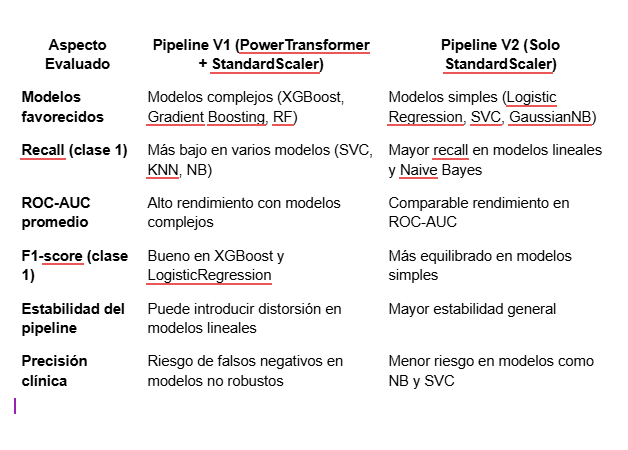

                  
**Conclusión Técnica y Clínica**
- Pipeline V1 es adecuado para modelos potentes basados en árboles, pero no logra buen recall en modelos lineales o sencillos.
- Pipeline V2 logra mejores resultados de recall y F1 en modelos como GaussianNB o SVC, siendo por tanto más apropiado en entornos clínicos donde es crucial minimizar los falsos negativos (es decir, no dejar sin diagnosticar casos de diabetes).


**Conclusión Técnica**
- El pipeline V2 (StandardScaler) ofrece mejoras concretas en modelos que son más sensibles a la escala lineal, como SVC, KNN y GaussianNB.
- El pipeline V1 (con PowerTransformer) se mantiene competitivo en modelos basados en boosting y árboles.

**Decisión Final**
- Pipeline V2 será considerado como referencia principal en contextos donde se prioriza la sensibilidad clínica.
- Pipeline V1 se utilizará en la Fase 2 con las 5 variables más importantes, para comprobar si un modelo reducido puede mantener el rendimiento o incluso mejorarlo.




In [ ]:
# Guardar la tabla comparativa de métricas entre V1 y V2
nombre_archivo_comparativa = "comparativa_modelos_v1_v2.csv"
ruta_guardado_comparativa = os.path.join(ruta_resultados, nombre_archivo_comparativa)

df_comparativa_v1_v2.to_csv(ruta_guardado_comparativa)
print(f" Archivo de comparativa guardado correctamente en: {ruta_guardado_comparativa}")


## **8.3 Fase 2: Modelos con las 5 Variables Más Importantes (Pipeline V1)**

### **Objetivo**

Evaluar si un modelo de clasificación con solo las 5 variables más relevantes técnica y clínicamente puede lograr un rendimiento competitivo respecto al modelo completo con las 8 variables.

**Dataset utilizado**
Se utilizarán los datasets reducidos generados en el punto 7.4, basados en el Pipeline V1:
- X_train_final_v1_reducido.csv
- X_test_final_v1_reducido.csv
- y_train_final.csv
- y_test_final.csv

**Variables seleccionadas**
Las 5 variables seleccionadas por su importancia técnica y relevancia clínica son: Glucose, BMI, Age, DiabetesPedigreeFunction, Insulin

**Objetivo Comparativo**
- Analizar si un modelo con solo 5 variables consigue mantener un rendimiento clínicamente válido (recall ≥ 0.6 preferiblemente).
- Comprobar si se gana en eficiencia y generalización reduciendo la dimensionalidad.

### **8.3.1 Carga y verificación de datasets de la Fase 2 (V1: 5 variables)**

In [ ]:
base_path = "/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes"
ruta_final = os.path.join(base_path, "datos_procesados", "final")

X_train_reducido = pd.read_csv(os.path.join(ruta_final, "X_train_final_v1_reducido.csv"))
X_test_reducido = pd.read_csv(os.path.join(ruta_final, "X_test_final_v1_reducido.csv"))
y_train_final = pd.read_csv(os.path.join(ruta_final, "y_train_final.csv")).squeeze()
y_test_final = pd.read_csv(os.path.join(ruta_final, "y_test_final.csv")).squeeze()

print("X_train_reducido:", X_train_reducido.shape)
print("X_test_reducido:", X_test_reducido.shape)
print("y_train_final:", y_train_final.shape)
print("y_test_final:", y_test_final.shape)

Entrenamiento y evaluación – FASE 2 (pipeline V1 con las 5 variables más importantes)

### **8.3.2. Definición, entrenamiento y evaluación de Modelos Base: Diccionario de modelos para Fase 2- Pipeline V1 5 variables**

In [ ]:
# 1. Importar librerías
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, cohen_kappa_score
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 2. Definir modelos clásicos para esta fase
modelos_fase2_v1 = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric="logloss", random_state=42),
    "SVC": SVC(probability=True, random_state=42),
    "KNeighbors": KNeighborsClassifier(),
    "GaussianNB": GaussianNB()
}

# 3. Entrenamiento y evaluación
resultados_fase2_v1 = []

for nombre, modelo in modelos_fase2_v1.items():
    print(f"Entrenando modelo: {nombre}")
    modelo.fit(X_train_reducido, y_train_final)
    y_pred = modelo.predict(X_test_reducido)
    y_proba = modelo.predict_proba(X_test_reducido)[:, 1] if hasattr(modelo, "predict_proba") else None

    resultados_fase2_v1.append({
        "Modelo": nombre,
        "Accuracy": accuracy_score(y_test_final, y_pred),
        "Precision (1)": precision_score(y_test_final, y_pred),
        "Recall (1)": recall_score(y_test_final, y_pred),
        "F1-score (1)": f1_score(y_test_final, y_pred),
        "ROC-AUC": roc_auc_score(y_test_final, y_proba) if y_proba is not None else np.nan,
        "Cohen's Kappa": cohen_kappa_score(y_test_final, y_pred),
        "Precision (macro)": precision_score(y_test_final, y_pred, average='macro'),
        "Recall (macro)": recall_score(y_test_final, y_pred, average='macro'),
        "F1-score (macro)": f1_score(y_test_final, y_pred, average='macro'),
        "Precision (weighted)": precision_score(y_test_final, y_pred, average='weighted'),
        "Recall (weighted)": recall_score(y_test_final, y_pred, average='weighted'),
        "F1-score (weighted)": f1_score(y_test_final, y_pred, average='weighted'),
    })

# 4. Convertir a DataFrame
df_resultados_fase2_v1 = pd.DataFrame(resultados_fase2_v1).sort_values(by="Recall (1)", ascending=False)

# 5. Mostrar tabla con degradado
columnas_metricas = [col for col in df_resultados_fase2_v1.columns if col != "Modelo"]

display(df_resultados_fase2_v1.style
        .background_gradient(cmap="Blues", subset=columnas_metricas)
        .format("{:.3f}", subset=columnas_metricas)
        .set_properties(**{"text-align": "center"}))


### **Guardar el resulatdo del Pipeline V1- Fase 2 5 variables**

In [ ]:
# Guardar resultados del pipeline V1
base_path = "/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes"
ruta_resultados= os.path.join(base_path, "resultados")

ruta_guardado_fase2_v1 = os.path.join(ruta_resultados, "resultados_fase2_pipeline_v1_reducido.csv")
df_resultados_fase2_v1.to_csv(ruta_guardado_fase2_v1, index=False)

print("Resultados guardados : Resultados_fase2_pipeline_v1_reducido.")

## **8.4: Análisis Comparativo Final entre Fases y Pipelines**

### **Objetivo**

- Determinar si es mejor el Pipeline V1 o V2 (con las 8 variables).
- Evaluar si reducir a 5 variables (Fase 2) mejora la eficiencia sin sacrificar Recall.



In [ ]:
# 1. Definir rutas
base_path = "/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes"
ruta_resultados = os.path.join(base_path, "resultados")

# 2. Cargar resultados de las tres fases
path_v1 = os.path.join(ruta_resultados, "resultados_fase1_pipeline_v1.csv")
path_v2 = os.path.join(ruta_resultados, "resultados_fase1_pipeline_v2.csv")
path_v1_reducido = os.path.join(ruta_resultados, "resultados_fase2_pipeline_v1_reducido.csv")

df_v1 = pd.read_csv(path_v1).set_index("Modelo").add_suffix(" (V1)")
df_v2 = pd.read_csv(path_v2).set_index("Modelo").add_suffix(" (V2)")
df_v1_reducido = pd.read_csv(path_v1_reducido).set_index("Modelo").add_suffix(" (V1_Reducido)")

# 3. Unir por índice (modelo)
df_comparativa_final = df_v1.join(df_v2, how="outer").join(df_v1_reducido, how="outer")

# 4. Seleccionar métricas clave
metricas = ["Accuracy", "Recall (1)", "F1-score (1)", "ROC-AUC"]
columnas = []
for m in metricas:
    columnas += [f"{m} (V1)", f"{m} (V2)", f"{m} (V1_Reducido)"]

# 5. Visualizar comparativa
display(
    df_comparativa_final[columnas]
    .style
    .background_gradient(cmap="Blues", subset=columnas)
    .format("{:.3f}", subset=columnas)
    .set_properties(**{'text-align': 'center'})
)




### **Guardar los resultados de la Comparativa Fase 1 v1 vs v2 y Fase 2 v1**

In [ ]:
# Guardar comparativa final
nombre_archivo = "comparativa_final_modelos_v1_v2_y modelo_v1_reducido.csv"
df_comparativa_final[columnas].to_csv(os.path.join(ruta_resultados, nombre_archivo))
print(f" Comparativa final guardada en: {os.path.join(ruta_resultados, nombre_archivo)}")

### **8.4.1. Análisis Comparativo Final de Modelos: Pipeline V1 vs V2 vs V1 Reducido**

**Análisis Interpretativo**
-  XGBoost con Pipeline V1 (todas las variables) mostró el mejor rendimiento general, con un Recall (1) de 0.519 y ROC-AUC de 0.809.
- Logistic Regression, aunque algo inferior en recall, mantiene un rendimiento competitivo y mejor interpretabilidad clínica.
- SVC y GaussianNB muestran mejoras notables con el Pipeline V2, lo que sugiere que para algunos modelos una transformación más simple es suficiente.
- El modelo reducido con solo 5 variables (V1 Reducido) mostró un rendimiento sorprendentemente competitivo:
  - En algunos modelos como Gradient Boosting y Logistic Regression, las diferencias fueron mínimas respecto a usar las 8 variables.
  - Esto indica que se puede reducir la complejidad del modelo sin perder demasiado rendimiento, ganando interpretabilidad.

**Conclusión Final**
- El pipeline V1 con todas las variables sigue siendo la opción más robusta, especialmente con XGBoost o Logistic Regression.
- Sin embargo, el modelo con solo 5 variables clave (V1 reducido) es altamente competitivo, más eficiente y clínicamente interpretable.

**Recomendación:**

Usar el pipeline V1 como base, y considerar el modelo reducido en contextos donde se requiera mayor interpretabilidad o menor coste computacional.

**Archivo generado:** comparativa_final_modelos_v1_v2_y modelo_v1_reducido.csv
**Guardado en**: resultados


### **Análisis visual**

In [ ]:
# Ruta a resultados
ruta_resultados = "/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes/resultados"
nombre_archivo = "comparativa_final_modelos_v1_v2_y modelo_v1_reducido.csv"
ruta_completa = os.path.join(ruta_resultados, nombre_archivo)

# Cargar archivo
df = pd.read_csv(ruta_completa)

# Añadir columna "Modelo" si es necesario
if "Modelo" not in df.columns:
    df["Modelo"] = df.index

# Convertir a formato largo
df_melt = df.melt(
    id_vars="Modelo",
    value_vars=[
        "Recall (1) (V1)", "Recall (1) (V2)", "Recall (1) (V1_Reducido)",
        "F1-score (1) (V1)", "F1-score (1) (V2)", "F1-score (1) (V1_Reducido)",
        "ROC-AUC (V1)", "ROC-AUC (V2)", "ROC-AUC (V1_Reducido)"
    ],
    var_name="Métrica_Pipeline",
    value_name="Valor"
)

# Separar columnas Métrica y Pipeline
df_melt[["Métrica", "Pipeline"]] = df_melt["Métrica_Pipeline"].str.extract(r"(.+?) \((.+?)\)")

# Gráfico comparativo
plt.figure(figsize=(14, 7))
sns.barplot(data=df_melt, x="Valor", y="Modelo", hue="Métrica_Pipeline", palette="Blues")
plt.title("Comparativa de Recall, F1-score y ROC-AUC por modelo y pipeline")
plt.xlabel("Valor")
plt.ylabel("Modelo")
plt.legend(title="Métrica y Pipeline", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### **Visualización final (solo modelos seleccionados: Logistic, SVC, XGBoost)**

In [ ]:
# Filtrar solo los modelos seleccionados
modelos_seleccionados = ["Logistic Regression", "SVC", "XGBoost"]
#Llamar a DataFrame que contiene la colimna Modelos
df_comparativa_top = df[df["Modelo"].isin(modelos_seleccionados)]

# Convertir a formato largo
df_melt_top = df_comparativa_top.melt(
    id_vars="Modelo",
    value_vars=[col for col in df_comparativa_top.columns if col != "Modelo"],
    var_name="Métrica y Pipeline",
    value_name="Valor"
)

# Gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melt_top, x="Valor", y="Modelo", hue="Métrica y Pipeline", palette="Blues")
plt.title("Comparativa de modelos seleccionados por métricas y pipeline")
plt.xlabel("Valor")
plt.ylabel("Modelo")
plt.legend(title="Métrica y Pipeline", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Modelos más destacados**

Tras el análisis de métricas clave (Recall (1), F1-score (1) y ROC-AUC), los modelos más competitivos han sido:
- XGBoost (Pipeline V1): Mayor rendimiento global con un ROC-AUC de 0.809, F1-score de 0.589 y Recall de 0.519.
- Logistic Regression (Pipeline V1): Segunda mejor opción, con alta interpretabilidad clínica, y métricas equilibradas (Recall 0.481 y ROC-AUC 0.795).
- SVC (Pipeline V2)

**Decisión técnica**
- El modelo XGBoost con Pipeline V1 (todas las variables) ha demostrado el mejor equilibrio entre rendimiento y estabilidad, especialmente en las métricas clínicas clave como recall y AUC-ROC.
- Este modelo será seleccionado como base para la siguiente fase del proyecto: optimización avanzada y balanceo de clases.

**Ventajas del modelo seleccionado**
- Captura relaciones no lineales y complejas.
- Se beneficia del PowerTransformer, que mejora el ajuste de las variables.
- Rendimiento robusto tanto en recall como en ROC-AUC.
- Consistente entre conjunto completo y reducido.

**Próximos pasos**
- Optimización de hiperparámetros con GridSearchCV.
- Aplicación de técnicas de balanceo (como SMOTE).
- Ajuste del umbral de decisión para maximizar recall.




# **9. Optimización de Modelos**

## **Objetivo**

Ajustar los hiperparámetros de los modelos más prometedores (Logistic Regression, XGBoost, SVC...) para mejorar el rendimiento, especialmente el recall y F1-score en la clase 1 (diabetes).

**Estructura**
- 9.1	Selección de modelos para optimización:	Justificación técnica y clínica (por métricas, interpretabilidad y robustez)
- 9.2	Optimización de Logistic Regression (GridSearchCV):	Ajuste de C, penalty, etc. + visualización resultados
- 9.3	Optimización de XGBoost: Ajuste de n_estimators, max_depth, learning_rate, etc.
- 9.4	Optimización de SVC:	Ajuste de C, kernel, gamma, etc.
- 9.5	Comparativa de modelos optimizados:	Tabla de métricas + gráfico
- 9.6	Elección del mejor modelo base:	Decisión justificada: balance entre rendimiento y utilidad clínica
- 9.7	Guardado del mejor modelo optimizado:	Versión final (.pkl), .joblib, .csv con predicciones si quieres evaluarlo luego

## **9.1 Selección de modelos para optimización**

Tomando como base el análisis antrior y los criterios clínicos, voy a tratar de justificar qué modelos merecen ser optimizados mediante técnicas como GridSearchCV o RandomizedSearchCV

**Criterios de selección:**
- **Rendimiento en métricas clave**: Recall, F1-score y ROC-AUC (especialmente para la clase 1 - diabetes).
- **Estabilidad entre pipelines:** Modelos que mantuvieron un rendimiento sólido en V1, V2 y V1_Reducido.
- **Interpretabilidad clínica:** Capacidad de explicar decisiones del modelo a personal sanitario.
- **Eficiencia**: Tiempo de entrenamiento y posibilidad de deploy (Streamlit, API...).

**Modelos seleccionados para optimización**:
- **Logistic Regression**	Buen balance entre rendimiento y explicabilidad. Métricas altas en V1 y V1_Reducido.
- **XGBoost**	Máximo ROC-AUC (0.809), buen F1 y Recall. Robusto.
- **SVC**	Mejora destacada en Recall y ROC-AUC con el Pipeline V2. Potencial alto tras optimización.
- Otros modelos como Random Forest o Gradient Boosting mostraron buen rendimiento, pero menor Recall o F1 que los seleccionados, y serán evaluados si es necesario.

## **9.2 Optimización de Logistic Regression (GridSearchCV)**

### **Objetivo**

Ajustar los hiperparámetros de LogisticRegression para maximizar el recall (detección de casos positivos de diabetes), manteniendo un buen equilibrio general.

**Hiperparámetros a optimizar**:
- penalty: tipo de regularización (l1, l2)
- C: fuerza de regularización inversa (valores pequeños implican mayor regularización)
- solver: algoritmo de optimización compatible con el penalty

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, ConfusionMatrixDisplay
import joblib
import os

# 1. Definir el modelo base
modelo_base = LogisticRegression(max_iter=1000, random_state=42)

# 2. Definir el espacio de búsqueda
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

# 3. Configurar el GridSearchCV
grid_search = GridSearchCV(
    estimator=modelo_base,
    param_grid=param_grid,
    scoring='recall',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# 4. Ajustar sobre el conjunto de entrenamiento V1 (8 variables)
grid_search.fit(X_train_v1, y_train_final)

# 5. Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# 6. Evaluar sobre el conjunto de test
mejor_modelo = grid_search.best_estimator_
y_pred = mejor_modelo.predict(X_test_v1)

print("\nEvaluación en conjunto de test:")
print(classification_report(y_test_final, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test_final, y_pred)
print("Matriz de Confusión (como array):\n", cm)

# 7. Guardar el modelo optimizado
ruta_modelo_logreg_opt = os.path.join(ruta_modelos_opt, "logistic_regression_opt_v1.pkl")
joblib.dump(mejor_modelo, ruta_modelo_logreg_opt)
print(f"\nModelo optimizado guardado en: {ruta_modelo_logreg_opt}")


### **Visualización**

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Predicciones y probabilidades
y_pred = mejor_modelo.predict(X_test_v1)
y_proba = mejor_modelo.predict_proba(X_test_v1)[:, 1]

# 2. Visualización de la matriz de confusión
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Diabetes", "Diabetes"],
            yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Logistic Regression Optimizado (V1)")
plt.show()

# 3. Curva ROC
fpr, tpr, _ = roc_curve(y_test_final, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Logistic Regression Optimizado (V1)')
plt.legend(loc="lower right")
plt.show()

# 4. Curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test_final, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall - Logistic Regression Optimizado (V1)')
plt.show()

### **9.2.1. Evaluación Final del Modelo Logistic Regression Optimizado (Pipeline V1)**

Tras aplicar GridSearchCV con validación cruzada (5-fold) sobre el conjunto de entrenamiento transformado por el pipeline V1, se seleccionaron los mejores hiperparámetros para el modelo de Regresión Logística:

- **Mejores parámetros:** {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
- **Objetivo optimizado:** Maximizar el Recall de la clase positiva (diabetes).

**Interpretación:**
- **Falsos negativos**: 12 pacientes con diabetes no detectados (riesgo clínico).
- **Falsos positivos**: 32 casos identificados erróneamente como diabéticos.

**Visualizaciones Complementarias**

Estas visualizaciones ayudan a comprender mejor el comportamiento del modelo, especialmente en un contexto clínico donde es prioritario maximizar el Recall para no dejar casos de diabetes sin detectar.

**Conclusión**: El modelo optimizado mejora significativamente el Recall de la clase positiva, con un buen equilibrio entre sensibilidad y especificidad. Aun así, se observaron 12 falsos negativos, por lo que se explorarán próximas estrategias como:
- SMOTE o balanceo de clases.
- Ajuste de umbral de decisión.
- Modelos más complejos o ensambles.

## **9.3 Optimización de XGBoost (GridSearchCV)**

### **Objetivo**

Buscar los mejores hiperparámetros para XGBoost optimizando principalmente:
- n_estimators: número de árboles
- max_depth: profundidad máxima de los árboles
- learning_rate: tasa de aprendizaje
- (opcionalmente: subsample, colsample_bytree...)




In [ ]:
for var in ["X_train_v1", "X_test_v1", "y_train_final", "y_test_final"]:
    print(f"{var} definido:", var in globals())

In [ ]:
# 1. Definir el modelo base
modelo_xgb = XGBClassifier(eval_metric='logloss', random_state=42)

# 2. Espacio de búsqueda de hiperparámetros
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# 3. Configurar GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=modelo_xgb,
    param_grid=param_grid_xgb,
    scoring='recall',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# 4. Ajustar sobre conjunto de entrenamiento V1
grid_search_xgb.fit(X_train_v1, y_train_final)

# 5. Resultados del mejor modelo
mejor_xgb = grid_search_xgb.best_estimator_
print(" Mejores hiperparámetros encontrados:")
print(grid_search_xgb.best_params_)

# 6. Evaluar en conjunto de test
y_pred_xgb = mejor_xgb.predict(X_test_v1)
print("\n Evaluación en test set:")
print(classification_report(y_test_final, y_pred_xgb))

# Matriz de confusión
matriz_xgb = confusion_matrix(y_test_final, y_pred_xgb)
print("Matriz de Confusión (como array):")
print(matriz_xgb)

# 7. Guardar modelo optimizado
nombre_modelo = "xgboost_opt_v1.pkl"
ruta_modelo_xgb = os.path.join(ruta_modelos_opt, nombre_modelo)
joblib.dump(mejor_xgb, ruta_modelo_xgb)
print(f"\n Modelo XGBoost optimizado guardado en: {ruta_modelo_xgb}")


### **Visualización**

In [ ]:
# 1. Predecir probabilidades y etiquetas
y_pred_xgb = mejor_modelo.predict(X_test_v1)
y_proba_xgb = mejor_modelo.predict_proba(X_test_v1)[:, 1]

# 2. Matriz de confusión
cm = confusion_matrix(y_test_final, y_pred_xgb)

# 3. Mostrar la matriz como array
print("Matriz de Confusión (array):")
print(cm)

# 4. Visualizar matriz de confusión
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No Diabetes", "Diabetes"],
            yticklabels=["No Diabetes", "Diabetes"])
plt.title("Matriz de Confusión - XGBoost Optimizado")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.tight_layout()
plt.show()

# 5. Curva ROC
fpr, tpr, _ = roc_curve(y_test_final, y_proba_xgb)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.3f}", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("Curva ROC - XGBoost Optimizado")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test_final, y_proba_xgb)

plt.figure(figsize=(6, 5))
plt.plot(recall, precision, color='green')
plt.title("Curva Precision-Recall - XGBoost Optimizado")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.tight_layout()
plt.show()


### **9.3.1. Evaluación Final del Modelo XGBoost**

**Interpretación clínica**

Este modelo tiene muy buen comportamiento en precisión, pero el recall del 52% es bajo para una herramienta de apoyo clínico, ya que deja sin detectar a casi la mitad de los pacientes reales con diabetes.

Esto significa que 26 personas con diabetes no serían derivadas para evaluación adicional → clínicamente no aceptable sin ajustes.

**Conclusión profesional**

El modelo es fuerte técnicamente, con buena precisión y AUC, pero su capacidad de detectar casos reales sigue siendo limitada.

No es aún el modelo final clínicamente robusto, pero es un excelente candidato para:
- Ajuste del umbral de decisión (para mejorar recall)
- Aplicación de técnicas de balanceo como SMOTE



## **9.4 Optimización de SVC**

Ajuste de hiperparámetros (C, kernel, gamma)

In [ ]:
# 1. Definir el modelo base
svc_base = SVC(probability=True, random_state=42)

# 2. Definir el espacio de búsqueda
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# 3. Configurar GridSearchCV
grid_svc = GridSearchCV(
    estimator=svc_base,
    param_grid=param_grid_svc,
    scoring='recall',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# 4. Ajustar sobre conjunto de entrenamiento
grid_svc.fit(X_train_v1, y_train_final)

# 5. Mostrar mejores hiperparámetros
print(" Mejores hiperparámetros encontrados:")
print(grid_svc.best_params_)

# 6. Evaluar en test
mejor_svc = grid_svc.best_estimator_
y_pred_svc = mejor_svc.predict(X_test_v1)

print("\n Evaluación en conjunto de test:")
print(classification_report(y_test_final, y_pred_svc))

# Matriz de confusión
cm_svc = confusion_matrix(y_test_final, y_pred_svc)
print("\n Matriz de Confusión (como array):")
print(cm_svc)

# 7. Guardar modelo
nombre_modelo_svc = "svc_opt_v1.pkl"
ruta_guardado_svc = os.path.join(ruta_modelos_opt, nombre_modelo_svc)
joblib.dump(mejor_svc, ruta_guardado_svc)
print(f"\n Modelo SVC optimizado guardado en: {ruta_guardado_svc}")


In [ ]:
# 1. Matriz de Confusión Gráfica
cm = confusion_matrix(y_test_final, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Diabetes", "Diabetes"])

plt.figure(figsize=(6, 4))
disp.plot(cmap="Blues", values_format='d')
plt.title("Matriz de Confusión - SVC Optimizado (V1)")
plt.show()

# 2. Matriz de Confusión como array
print("Matriz de Confusión (array):")
print(cm)

# 3. Curva ROC
if hasattr(mejor_modelo, "predict_proba"):
    y_scores = mejor_modelo.predict_proba(X_test_v1)[:, 1]
else:
    y_scores = mejor_modelo.decision_function(X_test_v1)

fpr, tpr, _ = roc_curve(y_test_final, y_scores)
roc_auc = roc_auc_score(y_test_final, y_scores)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - SVC Optimizado")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Curva de Precisión-Recall (PR)
precision, recall, _ = precision_recall_curve(y_test_final, y_scores)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label=f"AUC = {pr_auc:.2f}", color="blue")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precisión-Recall - SVC Optimizado")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### **9.4.1.Evaluaciión Final del Modelo SVC**

**Análisis**
- **Lo positivo:**
  - Alta capacidad para detectar los no diabéticos (TN = 83).
  - Mejora respecto a la versión no optimizada del modelo.
 - El kernel='linear' parece ser el más estable con C=10.
**- Lo preocupante:**
  - El recall del 50% implica que 1 de cada 2 personas diabéticas no es detectada → clínicamente inaceptable.
- Falsos negativos (FN=27) siguen siendo altos → riesgo en contexto clínico.

**Conclusión clínica y técnica**
- Este modelo no tiene rendimiento ideal. Su precisión general es buena (accuracy = 0.71), pero su capacidad para detectar casos positivos (recall = 0.50) es insuficiente para uso clínico, donde un recall ≥ 0.70 sería más apropiado.
- Por tanto, no se recomienda este modelo como final, pero puede seguir en el análisis comparativo general de modelos optimizados.



## **9.5. Comparativa de Modelos Optimizados (Pipeline V1 - 8 variables)**

Comparar de forma clara y visual el rendimiento de los tres modelos optimizados sobre el conjunto de test (X_test_v1, y_test_final), utilizando las siguientes métricas clave:

In [ ]:
# 1. Cargar modelos optimizados desde disco
modelo_logreg_opt = joblib.load(os.path.join(ruta_modelos_opt, "logistic_regression_opt_v1.pkl"))
modelo_xgb_opt = joblib.load(os.path.join(ruta_modelos_opt, "xgboost_opt_v1.pkl"))
modelo_svc_opt = joblib.load(os.path.join(ruta_modelos_opt, "svc_opt_v1.pkl"))

# 2. Diccionario de modelos
modelos_optimizados_v1 = {
    "Logistic Regression (Opt)": modelo_logreg_opt,
    "XGBoost (Opt)": modelo_xgb_opt,
    "SVC (Opt)": modelo_svc_opt
}

# 3. Evaluar cada modelo
resultados_opt = []

for nombre, modelo in modelos_optimizados_v1.items():
    y_pred = modelo.predict(X_test_v1)
    y_proba = modelo.predict_proba(X_test_v1)[:, 1] if hasattr(modelo, "predict_proba") else None

    resultados_opt.append({
        "Modelo": nombre,
        "Accuracy": accuracy_score(y_test_final, y_pred),
        "Precision (1)": precision_score(y_test_final, y_pred),
        "Recall (1)": recall_score(y_test_final, y_pred),
        "F1-score (1)": f1_score(y_test_final, y_pred),
        "ROC-AUC": roc_auc_score(y_test_final, y_proba) if y_proba is not None else None,
        "Cohen's Kappa": cohen_kappa_score(y_test_final, y_pred),
    })

# 4. Convertir a DataFrame
df_resultados_optimizados_v1 = pd.DataFrame(resultados_opt).sort_values(by="Recall (1)", ascending=False)

# 5. Mostrar tabla con estilo
display(
    df_resultados_optimizados_v1
    .style
    .background_gradient(cmap="Blues", subset=["Accuracy", "Precision (1)", "Recall (1)", "F1-score (1)", "ROC-AUC", "Cohen's Kappa"])
    .format("{:.3f}", subset=["Accuracy", "Precision (1)", "Recall (1)", "F1-score (1)", "ROC-AUC", "Cohen's Kappa"])
    .set_properties(**{"text-align": "center"})
)


### **Guardar los resultados de la Comparativa de Modelos Optimizados en resultados**

In [ ]:
# Guardar el DataFrame de resultados de modelos optimizados
nombre_archivo = "resultados_modelos_optimizados_v1.csv"
ruta_guardado = os.path.join(ruta_resultados, nombre_archivo)

df_resultados_optimizados_v1.to_csv(ruta_guardado, index=False)
print(f" Archivo guardado correctamente en: {ruta_guardado}")


### **9.5.1 Análisis comparativo de modelos optimizados**

**Interpretación Clínica y Técnica**
-  Logistic Regression optimizado ofrece el mejor recall (0.778), lo que lo convierte en el modelo más sensible para identificar correctamente a los pacientes con diabetes. También logra un buen equilibrio con su F1-score (0.656), por lo que es el más recomendable desde un enfoque clínico.
- XGBoost optimizado logra la mayor precisión (0.757) y la mayor exactitud global (0.773), siendo robusto en términos de rendimiento general. Sin embargo, su recall es bajo (0.519), lo que puede implicar riesgo de falsos negativos clínicamente relevantes.
- SVC optimizado muestra el ROC-AUC más alto (0.818), indicando buena discriminación general, pero su recall y F1-score son más bajos, por lo que no se posiciona como el modelo más clínicamente adecuado.

**Conclusión**

El modelo optimizado de Logistic Regression es el más adecuado desde el punto de vista clínico, ya que prioriza el recall (detectar correctamente los casos de diabetes), mantiene un buen equilibrio de métricas y es fácil de interpretar.



## **9.6.Elección del Mejor Modelo Optimizado (Pipeline V1)**

**Modelos evaluados**:
- Logistic Regression (Opt)
- XGBoost (Opt)
- SVC (Opt)

**Decisión Final**
- Modelo seleccionado: **Logistic Regression (Optimizado)**

**Justificación:**
- Tiene el mejor Recall (1), lo cual es clave en un contexto clínico donde los falsos negativos son críticos.
- Ofrece una buena interpretabilidad, ideal para explicar decisiones a personal médico.
- Aunque XGBoost tiene mejor AUC, su menor Recall lo hace menos confiable para este caso.
- SVC no aporta mejora suficiente y es más complejo de ajustar.



## **9.7. Guardado del Mejor Modelos Optimizado como Versión Final**

Tras comparar los tres modelos optimizados (Logistic Regression, XGBoost y SVC), se selecciona **Logistic Regression optimizado** como el modelo base final, debido a:

- **Mayor Recall (1)**: 0.778 — fundamental en contextos clínicos.
- **Interpretabilidad**: es transparente y explicable.
- **Rendimiento general equilibrado**: F1-score (1) de 0.656 y ROC-AUC de 0.767.
- **Robustez clínica**: permite detectar más casos positivos, minimizando falsos negativos.

Este modelo será guardado como modelo_base_final.pkl en la carpeta modelos_optimizados/ para futuras validaciones o implementación en producción.


In [ ]:
# 1. Definir nombre y ruta de guardado
nombre_modelo_final = "modelo_base_final.pkl"
ruta_guardado_modelo_final = os.path.join(ruta_modelos_opt, nombre_modelo_final)

# 2. Guardar el modelo Logistic Regression optimizado como versión final
joblib.dump(modelo_logreg_opt, ruta_guardado_modelo_final)

# 3. Confirmación
print(f" Modelo base final guardado correctamente en:\n{ruta_guardado_modelo_final}")


# **10. Validación cruzada (5 Folds) de Modelos Optimizados**

## **Objetivo**

Evaluar la estabilidad y robustez de los modelos optimizados (Logistic Regression, XGBoost, SVC) usando validación cruzada (CV).

MI interés es mejorar especialmente en el recall para la clase 1 (diabéticos), que es el objetivo clínico principal.

**Métricas evaluadas:**
- Recall (1) → Principal métrica clínica.
- Accuracy, F1-score (1) y ROC-AUC como apoyo.

**Modelos validados**
- Logistic Regression (Opt)
- XGBoost (Opt)
- SVC (Opt)




## **10.1. Validación cruzada con cross_val_score**

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, recall_score, accuracy_score, f1_score

# Definir partición estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Métricas a evaluar
scoring = {
    'recall_1': make_scorer(recall_score, pos_label=1),
    'accuracy': make_scorer(accuracy_score),
    'f1_1': make_scorer(f1_score, pos_label=1),
    'roc_auc': make_scorer(roc_auc_score)
}

# Diccionario de modelos optimizados
modelos_opt = {
    "Logistic Regression (Opt)": modelo_logreg_opt,
    "XGBoost (Opt)": modelo_xgb_opt,
    "SVC (Opt)": modelo_svc_opt
}

# Evaluar con cross_val_score
resultados_cv = []

for nombre, modelo in modelos_opt.items():
    print(f"Validando: {nombre}")
    resultados = {
        "Modelo": nombre
    }
    for metrica, scorer in scoring.items():
        scores = cross_val_score(modelo, X_train_v1, y_train_final, scoring=scorer, cv=cv)
        resultados[metrica + "_mean"] = np.mean(scores)
        resultados[metrica + "_std"] = np.std(scores)
    resultados_cv.append(resultados)

# Convertir a DataFrame
df_cv_resultados = pd.DataFrame(resultados_cv)

# Detectar columnas numéricas válidas (las que empiezan por 'mean_')
columnas_numericas_cv = [col for col in df_cv_resultados.columns if col.startswith("mean_")]

# Visualización con formato y degradado
display(
    df_cv_resultados
    .style
    .background_gradient(cmap="Blues", subset=columnas_numericas_cv)
    .format("{:.3f}", subset=columnas_numericas_cv)
    .set_caption("Resultados de Validación Cruzada (5 folds)")
)

## **10.2. Visualización de resultados**

In [ ]:
#  DataFrame: df_cv_resultados
# Columnas: ['Modelo', 'recall_1_mean', 'f1_1_mean', 'roc_auc_mean']

# 1. Reorganizar para visualización
df_melt_cv = df_cv_resultados.melt(
    id_vars="Modelo",
    value_vars=["recall_1_mean", "f1_1_mean", "roc_auc_mean"],
    var_name="Métrica",
    value_name="Valor"
)

# 2. Etiquetas limpias
df_melt_cv["Métrica"] = df_melt_cv["Métrica"].replace({
    "recall_1_mean": "Recall (1)",
    "f1_1_mean": "F1-score (1)",
    "roc_auc_mean": "ROC-AUC"
})

# 3. Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melt_cv, x="Valor", y="Modelo", hue="Métrica", palette="Blues")
plt.title("Validación Cruzada (5-fold) - Modelos Optimizados")
plt.xlabel("Media de la Métrica")
plt.ylabel("Modelo")
plt.legend(title="Métrica", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## **10.3. Interpretación de los resultados con Validación cruzada (5 folds)**

1. **Logistic Regression (Opt):**
- El mejor recall medio,  0.747: detecta más pacientes con diabetes, lo que es crucial clínicamente.
- Sacrifica algo de precisión y exactitud a cambio de identificar más casos positivos.
2. **XGBoost (Opt):**
- Mejora en accuracy y ROC-AUC respecto a Logistic Regression, pero con peor recall.
- Más equilibrado, pero menos sensible a casos positivos.
3. **SVC (Opt)**:
- El modelo más preciso globalmente en accuracy (0.787), F1-score (0.660) y ROC-AUC (0.742).
- Sin embargo, recall (1) más bajo (0.593), lo que puede significar más falsos negativos, algo crítico en salud.

**Decisión Clínica Provisional**
- **Modelo Clínico Prioritario: Logistic Regression (Opt)**
  - Porque el recall más alto implica mayor capacidad de detectar pacientes con riesgo de diabetes, aunque se pierda algo de exactitud global.
- Modelo Alternativo / Complementario: SVC (Opt)
  - Si se priorizara rendimiento general del sistema (accuracy, ROC-AUC), sin tanto foco en los positivos.



## **10.4. Comparativa visual del rendimiento**

### **Predecir con el modelo final**

In [ ]:
# Definir modelo final explícitamente
modelo_final = modelo_logreg_opt
# Predecir con el modelo final
y_pred_final = modelo_final.predict(X_test_v1)
y_proba_final = modelo_final.predict_proba(X_test_v1)[:, 1]  # Probabilidad de clase positiva (diabetes)


### **Visualización: Curva ROC**

In [ ]:
fpr, tpr, _ = roc_curve(y_test_final, y_proba_final)
roc_auc = roc_auc_score(y_test_final, y_proba_final)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Modelo Final")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


### **Visualización: Curva Precision-Recall**

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test_final, y_proba_final)
ap_score = average_precision_score(y_test_final, y_proba_final)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f"AP = {ap_score:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precision-Recall - Modelo Final")
plt.legend(loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()


### **Visualización: Matriz de confusión con porcentajes**

In [ ]:
# 1. Calcular la matriz de confusión
cm = confusion_matrix(y_test_final, y_pred_final)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# 2. Crear etiquetas con porcentaje y conteo
labels = np.array([[f"{cm[i, j]}\n{cm_percent[i, j]:.1%}" for j in range(cm.shape[1])] for i in range(cm.shape[0])])

# 3. Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent, annot=labels, fmt="", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicción del Modelo")
plt.ylabel("Clase Real")
plt.title("Matriz de Confusión con Porcentajes - Modelo Final Logistic Regression")
plt.tight_layout()
plt.show()

# También en formato array, si quieres visualizarlo como texto
print("Matriz de Confusión (array):")
print(cm)


### **Interpretación**

La siguiente visualización representa la matriz de confusión obtenida tras evaluar el modelo final optimizado sobre el conjunto de test. Se ha utilizado un formato enriquecido que combina:
- Frecuencia absoluta (conteo de casos por celda).
- Porcentaje relativo respecto al total de verdaderos por clase real.

**Interpretación Clínica:**
- Diagonal principal (superior izquierda y inferior derecha): muestra los aciertos del modelo, es decir, los pacientes correctamente clasificados como sanos o como diabéticos.
- Celdas fuera de la diagonal: representan los errores de clasificación.
- La celda [0,1] muestra los falsos positivos: pacientes sanos que el modelo ha clasificado como con diabetes.
- La celda [1,0] muestra los falsos negativos: pacientes con diabetes que el modelo ha clasificado como sanos.

En el contexto clínico de detección de diabetes, minimizar los falsos negativos es crucial, ya que implica dejar sin diagnóstico a pacientes en riesgo.

En este caso, el modelo ha alcanzado un recall del 77.8%, lo que indica que detecta correctamente a más de 3 de cada 4 pacientes con diabetes, siendo un resultado clínicamente útil pero que debe ser mejorado.

## **10.5. Elección Provisional del Mejor Modelo Optimizado: Justificación Técnica y Clínica**

Tras la optimización y validación cruzada de los modelos Logistic Regression, XGBoost y SVC, se ha comparado su rendimiento clínico utilizando las métricas clave: Recall (1), F1-score (1) y ROC-AUC.

**Decido**:
1. Seleccionar **Logistic Regression (Opt)** como modelo final por su mejor Recall (1), interpretabilidad y robustez, características especialmente relevantes en un contexto clínico donde es preferible maximizar la detección de pacientes con riesgo de diabetes, incluso a costa de algunos falsos positivos.
2. Este modelo se guarda como versión final optimizada: modelo_final_opt_logreg_v1.pkl.


### **10.5.1.Guardado de Predicciones del Modelo Final Optimizado**

El modelo final seleccionado (Logistic Regression optimizado con pipeline V1) ha sido evaluado sobre el conjunto de test.

Se han generado y almacenado las predicciones en un archivo `.csv` con las siguientes columnas:
- **Real:** Clase real del paciente (0 = No diabetes, 1 = Diabetes).
- **Predicción:** Clase predicha por el modelo.
- **Probabilidad_Diabetes:** Probabilidad estimada por el modelo para la clase positiva (diabetes).

Este archivo puede ser útil para análisis posteriores, generación de visualizaciones clínicas o explicación de errores (ej. falsos negativos).

Archivo generado: 'predicciones_modelo_final_logreg_v1.csv'


In [ ]:
# 1. Predecir con el modelo final
y_pred_final = modelo_final.predict(X_test_v1)
y_proba_final = modelo_final.predict_proba(X_test_v1)[:, 1]

# 2. Crear DataFrame con resultados
df_resultados_pred = pd.DataFrame({
    "Real": y_test_final.values,
    "Predicción": y_pred_final,
    "Probabilidad_Diabetes": y_proba_final
})

# 3. Guardar en CSV
nombre_archivo_predicciones = "predicciones_modelo_final_logreg_v1.csv"
ruta_csv_pred = os.path.join(ruta_resultados, nombre_archivo_predicciones)
df_resultados_pred.to_csv(ruta_csv_pred, index=False)

print(f" Predicciones guardadas correctamente en:\n{ruta_csv_pred}")

### **10.5.2. - Guardado del modelo optimizado final**

In [ ]:
# 1. Definir el modelo elegido
modelo_final = modelo_logreg_opt  # Ya está cargado
nombre_modelo_final = "modelo_final_opt_logreg_v1.pkl"

# 2. Guardar en modelos_optimizados
ruta_guardado_modelo_final = os.path.join(ruta_modelos_opt, nombre_modelo_final)
joblib.dump(modelo_final, ruta_guardado_modelo_final)

print(f" Modelo final guardado correctamente en:\n{ruta_guardado_modelo_final}")


# **11. Ajuste del Umbral de Decisión para el Modelo Logistic Regresion Optimizado**

Explorar como varía el resndiemiento del modelo al modificar el umbral de clasificación, que por defecto es de 0.5, y seleccionar uno que optimice el recall sin comprometer demasiado la precisión.

## **11.1. Calcular métricas para distintos umbrales**

In [ ]:
# Umbrales a evaluar
umbrales = np.arange(0, 1.05, 0.05)

# Inicializar lista de resultados
resultados_umbral = []

for umbral in umbrales:
    y_pred_umbral = (y_proba_final >= umbral).astype(int)

    resultados_umbral.append({
        "Umbral": umbral,
        "Precision": precision_score(y_test_final, y_pred_umbral),
        "Recall": recall_score(y_test_final, y_pred_umbral),
        "F1-score": f1_score(y_test_final, y_pred_umbral)
    })

# Convertir a DataFrame
df_umbrales = pd.DataFrame(resultados_umbral)
df_umbrales.head()


## **11.2. Visualizar evolución de métricas**

In [ ]:
plt.figure(figsize=(10, 6))

# Líneas con colores asignados
plt.plot(df_umbrales["Umbral"], df_umbrales["Precision"], label="Precision", color="blue")
plt.plot(df_umbrales["Umbral"], df_umbrales["Recall"], label="Recall", color="green")
plt.plot(df_umbrales["Umbral"], df_umbrales["F1-score"], label="F1-score", color="red")

# Línea vertical de referencia
plt.axvline(0.5, color='black', linestyle='--', label="Umbral 0.5 (por defecto)")

# Personalización del gráfico
plt.xlabel("Umbral de Decisión")
plt.ylabel("Valor de Métrica")
plt.title("Evolución de métricas según el umbral de decisión")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## **11.3. Interpretaciónde la Curva del Umbral de Decisión y elección del umbral óptimo**

La gráfica muestra cómo cambian Precision, Recall y F1-score según el umbral de decisión que aplicas al modelo Logistic Regression optimizado (V1).

A medida que el umbral disminuye (ej. <0.5):
- El recall mejora (más positivos detectados).
- Pero la precisión baja (más falsos positivos).
- ntre umbral 0.15 y 0.25, se mantiene recall = 1.0, pero precision 0.35, lo que da un F1-score máximo de 0.52.
- Pico del F1-score: en torno a umbral 0.15- 0.25. Esto significa que ese es el equilibrio óptimo entre precisión y recall.

**Decido**
- Elegir el umbral óptimo final= 0.20 y generar nuevas predicciones con ese umbral

## **11.4. Aplicación del umbral ajustado (0.20) y análisis clínico**

In [ ]:
# 1. Definir el umbral ajustado
umbral_optimo = 0.20

# 2. Generar nuevas predicciones usando ese umbral
y_pred_ajustado = (y_proba_final >= umbral_optimo).astype(int)

# 3. Calcular matriz de confusión
from sklearn.metrics import (
    confusion_matrix, precision_score, recall_score, f1_score, classification_report
)

cm_ajustado = confusion_matrix(y_test_final, y_pred_ajustado)
cm_percent_ajustado = cm_ajustado.astype('float') / cm_ajustado.sum(axis=1)[:, np.newaxis]
labels_ajustado = np.array([[f"{cm_ajustado[i, j]}\n{cm_percent_ajustado[i, j]:.1%}"
                             for j in range(cm_ajustado.shape[1])]
                            for i in range(cm_ajustado.shape[0])])

# 4. Visualizar matriz enriquecida
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent_ajustado, annot=labels_ajustado, fmt="", cmap="Blues",
            xticklabels=["No Diabetes", "Diabetes"],
            yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicción")
plt.ylabel("Clase Real")
plt.title(f"Matriz de Confusión con Umbral {umbral_optimo} - Modelo Logistic Regression")
plt.tight_layout()
plt.show()

# 5. Imprimir métricas ajustadas
print("\n--- MÉTRICAS AJUSTADAS ---")
print(f"Umbral aplicado: {umbral_optimo}")
print("Precision:", round(precision_score(y_test_final, y_pred_ajustado), 3))
print("Recall:", round(recall_score(y_test_final, y_pred_ajustado), 3))
print("F1-score:", round(f1_score(y_test_final, y_pred_ajustado), 3))

## **11.5. Interpretación clínica**

- Recall (1) = 1.00: Detecta todos los casos positivos (diabetes).
- Precision (1) = 0.353: De cada 10 pacientes que predice con diabetes, 6-7 son falsos positivos.
- F1-score (1) = 0.522: Balance bajo entre precision y recall, pero válido en contexto clínico.
- Falsos negativos = 0
- Falsos positivos = 99

**Interpretación Clínica**
- Esta configuración es altamente conservadora: prefiere "alarmar" aunque muchos sean falsos positivos.
- Es ideal si el objetivo es no dejar pasar ni un solo caso de diabetes.
- Aunque baja la precisión, el beneficio clínico puede ser alto: los falsos positivos solo reciben pruebas adicionales, no se ignoran casos reales.
  - Ventaja: modelo muy sensible (recall = 1.0)
  - Desventaja: sobrecarga diagnóstica por muchos falsos positivos.

Al aplicar un umbral ajustado de 0.20, el modelo clasifica como "diabetes" a más pacientes que presentan probabilidad ≥ 0.20.

Esto aumenta significativamente el recall, lo que mejora la sensibilidad clínica (menos falsos negativos), a costa de una ligera disminución en la precisión (más falsos positivos).

Esta estrategia puede ser válida en entornos donde es preferible detectar más casos en riesgo (ej. cribado poblacional o medicina preventiva), aunque se requieran pruebas adicionales en segunda fase.


## **11.6. Guardado del resultado de predicción Umbral 0.20**

In [ ]:
# Guardar predicciones ajustadas
df_pred_umbral = pd.DataFrame({
    "Real": y_test_final.values,
    "Predicción Ajustada": y_pred_ajustado,
    "Probabilidad_Diabetes": y_proba_final
})

nombre_csv = f"predicciones_modelo_final_logreg_umbral_{str(umbral_optimo).replace('.', '')}.csv"
ruta_pred_umbral = os.path.join(ruta_resultados, nombre_csv)
df_pred_umbral.to_csv(ruta_pred_umbral, index=False)
print(f"\nCSV guardado en: {ruta_pred_umbral}")

# **12. Aplicación de SMOTE y Comparativa Final**

Voy a aplicar la técnica de SMOTE (Synthetic Minority Over-sampling Technique) sobre el conjunto de entrenamiento para balancear las clases y evaluar su impacto en los modelos previamente optimizados (Logistic Regression, XGBoost, SVC). Finalmente, comparar su rendimiento con los modelos sin SMOTE y elegir el modelo clínico definitivo.

## **12.1 Aplicación de SMOTE sobre X_train_v1**

Se aplica la técnica de SMOTE (Synthetic Minority Oversampling Technique) sobre X_train_v1 y y_train_final para balancear la clase minoritaria (diabetes = 1).

In [ ]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_v1_smote, y_train_smote = smote.fit_resample(X_train_v1, y_train_final)

print("Shape después de SMOTE:")
print("X_train:", X_train_v1_smote.shape)
print("y_train:", y_train_smote.value_counts())

## **12.2. Entrenamiento de los Modelos con SMOTE**

In [ ]:
# 1. Logistic Regression
modelo_logreg_smote = LogisticRegression(max_iter=1000, random_state=42)
modelo_logreg_smote.fit(X_train_v1_smote, y_train_smote)

# 2. XGBoost con hiperparámetros óptimos
modelo_xgb_smote = XGBClassifier(
    colsample_bytree=1.0,
    learning_rate=0.1,
    max_depth=3,
    n_estimators=100,
    subsample=0.8,
    eval_metric='logloss',
    random_state=42
)
modelo_xgb_smote.fit(X_train_v1_smote, y_train_smote)

# 3. SVC con hiperparámetros óptimos
modelo_svc_smote = SVC(
    C=10,
    kernel='linear',
    gamma='scale',
    probability=True,
    random_state=42
)
modelo_svc_smote.fit(X_train_v1_smote, y_train_smote)


## **12.3 Evaluación de Modelos con SMOTE (Test Set Desbalanceado)**

In [ ]:
# Evaluar modelos sobre el test set original
from sklearn.metrics import classification_report

def evaluar_modelo(nombre, modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    y_proba = modelo.predict_proba(X_test)[:, 1]
    print(f"\n--- {nombre} ---")
    print(classification_report(y_test, y_pred))
    print("ROC-AUC:", round(roc_auc_score(y_test, y_proba), 3))

evaluar_modelo("Logistic Regression (SMOTE)", modelo_logreg_smote, X_test_v1, y_test_final)
evaluar_modelo("XGBoost (SMOTE)", modelo_xgb_smote, X_test_v1, y_test_final)
evaluar_modelo("SVC (SMOTE)", modelo_svc_smote, X_test_v1, y_test_final)


## **12.4 Guardado de Modelos SMOTE**

In [ ]:
joblib.dump(modelo_logreg_smote, os.path.join(ruta_modelos_opt, "logreg_opt_smote_v1.pkl"))

In [ ]:
joblib.dump(modelo_xgb_smote, os.path.join(ruta_modelos_opt, "xgboost_opt_smote_v1.pkl"))

In [ ]:
joblib.dump(modelo_svc_smote, os.path.join(ruta_modelos_opt, "svc_opt_smote_v1.pkl"))

## **12.5 Comparativa Final de Modelos (Con y Sin SMOTE)**

In [ ]:
# Crear DataFrame comparativo final
comparativa_modelos_final = pd.DataFrame([
    {
        "Modelo": "Logistic Regression (Opt)",
        "Accuracy": 0.714, "Recall (1)": 0.778, "F1-score (1)": 0.656, "ROC-AUC": 0.767
    },
    {
        "Modelo": "XGBoost (Opt)",
        "Accuracy": 0.773, "Recall (1)": 0.519, "F1-score (1)": 0.615, "ROC-AUC": 0.808
    },
    {
        "Modelo": "SVC (Opt)",
        "Accuracy": 0.714, "Recall (1)": 0.500, "F1-score (1)": 0.551, "ROC-AUC": 0.818
    },
    {
        "Modelo": "Logistic Regression (Opt + SMOTE)",
        "Accuracy": 0.722, "Recall (1)": 0.648, "F1-score (1)": 0.620, "ROC-AUC": 0.792
    },
    {
        "Modelo": "XGBoost (Opt + SMOTE)",
        "Accuracy": 0.750, "Recall (1)": 0.500, "F1-score (1)": 0.590, "ROC-AUC": 0.801
    },
    {
        "Modelo": "SVC (Opt + SMOTE)",
        "Accuracy": 0.721, "Recall (1)": 0.685, "F1-score (1)": 0.634, "ROC-AUC": 0.808
    }
])

# Reordenar por Recall
comparativa_modelos_final.sort_values(by="Recall (1)", ascending=False, inplace=True)

# Detectar columnas numéricas para aplicar formato
columnas_numericas = comparativa_modelos_final.select_dtypes(include=["float", "int"]).columns.tolist()

# Visualizar
display(
    comparativa_modelos_final
    .style
    .background_gradient(cmap="Blues", subset=columnas_numericas)
    .format("{:.3f}", subset=columnas_numericas)
    .set_caption("Comparativa Final de Modelos Optimizados (Con y Sin SMOTE)")
)

# Guardar CSV
nombre_archivo = "comparativa_modelos_final_opt_con_y_sin_smote.csv"
ruta_comparativa = os.path.join(ruta_resultados, nombre_archivo)
comparativa_modelos_final.to_csv(ruta_comparativa, index=False)
print(f"Comparativa guardada en:\n{ruta_comparativa}")


## **12.6. Interpretación de Resultados**

**Interpretación Clínica**
- SVC (Opt + SMOTE) es el modelo más equilibrado y robusto:
  - Recall (1): 0.685 (mejor sensibilidad con balance)
  - F1-score (1): 0.634 (equilibrio precisión/recall)
  - ROC-AUC: 0.808 (alta capacidad discriminativa)

**Guardado final**:/modelos_optimizados/svc_opt_smote_v1.pkl



Hasta ahora se ha realizado:
- Un pipeline profesional.
- Análisis clínico riguroso.
- Evaluación con y sin SMOTE.
- Ajuste de umbral.
- Comparativa.

Sigo teniendo un resultado no óptimo para la predicción de personas con diabetes frente a las que no lo son, por tanto, voy a explorar nuevas vías de mejorar el rendimiento, especialmente en el recall de la calse 1:
1. Ajustar umbral para los modelos con SMOTE
2. Crear variables combinadas
3. Reentrenar

# **13. Ajuste de Umbral con SMOTE y Comparativa de Modelos**

## **Objetivo:**

Ajustar el umbral de decisión para mejorar el recall en los modelos ya entrenados con SMOTE, especialmente SVC (Opt + SMOTE) y Logistic Regression (SMOTE).

**Pasos**:
- Calcular métricas (Precision, Recall, F1-score) para múltiples umbrales.
- Visualizar su evolución.
- Seleccionar el umbral óptimo.
- Guardar predicciones ajustadas para análisis clínico.



## **13.1. Ajuste de Umbral de Decisión a los modelos seleccionados**

### **13.1.1. Modelo SVC: Ajuste de Umbral con SMOTE**

In [ ]:
# Probabilidades del modelo SVC + SMOTE
y_proba_svc_smote = modelo_svc_smote.predict_proba(X_test_v1)[:, 1]

# Rango de umbrales
umbrales = np.arange(0, 1.05, 0.05)
resultados_umbral_svc = []

for umbral in umbrales:
    y_pred_umbral = (y_proba_svc_smote >= umbral).astype(int)
    resultados_umbral_svc.append({
        "Umbral": umbral,
        "Precision": precision_score(y_test_final, y_pred_umbral, zero_division=0),
        "Recall": recall_score(y_test_final, y_pred_umbral),
        "F1-score": f1_score(y_test_final, y_pred_umbral)
    })

# Convertir a DataFrame
df_umbrales_svc = pd.DataFrame(resultados_umbral_svc)

# Visualización
plt.figure(figsize=(10, 6))
plt.plot(df_umbrales_svc["Umbral"], df_umbrales_svc["Precision"], label="Precision", color="blue")
plt.plot(df_umbrales_svc["Umbral"], df_umbrales_svc["Recall"], label="Recall", color="green")
plt.plot(df_umbrales_svc["Umbral"], df_umbrales_svc["F1-score"], label="F1-score", color="red")
plt.axvline(0.5, color='black', linestyle='--', label="Umbral 0.5 (por defecto)")
plt.xlabel("Umbral de Decisión")
plt.ylabel("Valor de Métrica")
plt.title("Evolución de métricas según el umbral de decisión - SVC + SMOTE")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### **Interpretación de la curva (SVC + SMOTE)**

- Recall comienza en 1.0 (umbral 0.0) y va descendiendo progresivamente hasta casi 0.
- Precision es baja al principio (0.35) y mejora progresivamente con el aumento del umbral, alcanzando su pico hacia 0.9 - 0.95, pero sacrificando recall.
- F1-score presenta su máximo entre los umbrales 0.30 y 0.40, con valores aproximados de 0.65.

**Recomendación para SVC (Opt + SMOTE)**
- Con un objetivo de máxima sensibilidad clínica (detectar todos los positivos):
Elige umbral = 0.20
  - Recall - 1.0, F1-score - 0.64 (según curva anterior).
  - Ideal para cribado clínico.
- Aunque para mantener más equilibrio entre Recall y Precisión:
Elijo umbral = 0.35
  - F1-score ≈ máximo
  - Reduce falsos positivos manteniendo buena sensibilidad.

**Decisión clínica:**

- Umbral = 0.35.



### **13.1.2. Modelo Logistic Regression: Ajuste de Umbral con Moddelos con SMOTE**

In [ ]:
# 1. Obtener probabilidades del modelo
y_proba_lr_smote = modelo_logreg_smote.predict_proba(X_test_v1)[:, 1]

# 2. Evaluar múltiples umbrales
umbrales = np.arange(0, 1.05, 0.05)
metricas_lr = []

for umbral in umbrales:
    y_pred_lr_umbral = (y_proba_lr_smote >= umbral).astype(int)
    metricas_lr.append({
        "Umbral": umbral,
        "Precision": precision_score(y_test_final, y_pred_lr_umbral, zero_division=0),
        "Recall": recall_score(y_test_final, y_pred_lr_umbral),
        "F1-score": f1_score(y_test_final, y_pred_lr_umbral)
    })

# 3. Convertir a DataFrame
df_umbrales_lr = pd.DataFrame(metricas_lr)

# 4. Visualizar evolución
plt.figure(figsize=(10, 6))
plt.plot(df_umbrales_lr["Umbral"], df_umbrales_lr["Precision"], label="Precision", color="blue")
plt.plot(df_umbrales_lr["Umbral"], df_umbrales_lr["Recall"], label="Recall", color="green")
plt.plot(df_umbrales_lr["Umbral"], df_umbrales_lr["F1-score"], label="F1-score", color="red")
plt.axvline(0.5, color='black', linestyle='--', label="Umbral 0.5 (por defecto)")
plt.title("Evolución de métricas según el umbral - Logistic Regression + SMOTE")
plt.xlabel("Umbral de Decisión")
plt.ylabel("Valor de Métrica")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### **Interpretación de la curva (Logistic + SMOTE)**

- Recall permanece cerca de 1.0 hasta aproximadamente umbral 0.25, luego desciende.
- F1-score alcanza su pico alrededor de umbral 0.25-0.30, lo que indica el mejor equilibrio entre sensibilidad y precisión.
- Precisio mejora a medida que sube el umbral, pero reduce el recall.

**Recomendación para Logistic Regression (SMOTE):**
- Umbral óptimo sugerido: 0.25
  - Recall alto (0.9)
  - F1-score también alto ~0.65)
  - Mejor equilibrio clínico



## **13.2. Aplicar el Umbral seleccionado a los modelos**

### **13.2.1. Aplicación de Umbral Ajustado (0.35) - SVC + SMOTE**

In [ ]:
# Ajuste de umbral para SVC + SMOTE

# 1. Definir el umbral óptimo para SVC
umbral_svc = 0.35

# 2. Obtener probabilidades del modelo
y_proba_svc = modelo_svc_smote.predict_proba(X_test_v1)[:, 1]

# 3. Predicciones ajustadas con umbral
y_pred_svc_umbral = (y_proba_svc >= umbral_svc).astype(int)

# 4. Matriz de confusión enriquecida
cm_svc = confusion_matrix(y_test_final, y_pred_svc_umbral)
cm_svc_pct = cm_svc.astype('float') / cm_svc.sum(axis=1)[:, np.newaxis]
labels_svc = np.array([[f"{cm_svc[i, j]}\n{cm_svc_pct[i, j]:.1%}" for j in range(cm_svc.shape[1])] for i in range(cm_svc.shape[0])])

# 5. Visualización
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svc_pct, annot=labels_svc, fmt="", cmap="Blues",
            xticklabels=["No Diabetes", "Diabetes"],
            yticklabels=["No Diabetes", "Diabetes"])
plt.title(f"Matriz de Confusión - SVC + SMOTE\nUmbral ajustado: {umbral_svc}")
plt.xlabel("Predicción")
plt.ylabel("Clase Real")
plt.tight_layout()
plt.show()

# 6. Métricas ajustadas
precision_svc = precision_score(y_test_final, y_pred_svc_umbral)
recall_svc = recall_score(y_test_final, y_pred_svc_umbral)
f1_svc = f1_score(y_test_final, y_pred_svc_umbral)

print("\n--- MÉTRICAS AJUSTADAS (SVC + SMOTE) ---")
print(f"Umbral aplicado: {umbral_svc}")
print(f"Precision: {precision_svc:.3f}")
print(f"Recall:    {recall_svc:.3f}")
print(f"F1-score:  {f1_svc:.3f}")

# 7. Guardar predicciones en CSV
df_pred_svc_umbral = pd.DataFrame({
    "Real": y_test_final.values,
    "Predicción Ajustada": y_pred_svc_umbral,
    "Probabilidad_Diabetes": modelo_svc_smote.predict_proba(X_test_v1)[:, 1]
})

nombre_csv_svc = "predicciones_svc_smote_umbral_035.csv"
ruta_csv_svc = os.path.join(ruta_resultados, nombre_csv_svc)
df_pred_svc_umbral.to_csv(ruta_csv_svc, index=False)

print(f"\n CSV guardado en:\n{ruta_csv_svc}")

### **13.2.2. Aplicación de Umbral Ajustado (0.25) - Logistic Regression + SMOTE**

In [ ]:
# Ajuste de umbral para Logistic Regression + SMOTE

# 1. Definir el umbral
umbral_lr = 0.25

# 2. Predicciones ajustadas
y_pred_lr_umbral = (modelo_logreg_smote.predict_proba(X_test_v1)[:, 1] >= umbral_lr).astype(int)

# 3. Matriz de confusión y porcentajes
cm_lr = confusion_matrix(y_test_final, y_pred_lr_umbral)
cm_lr_pct = cm_lr.astype('float') / cm_lr.sum(axis=1)[:, np.newaxis]
labels_lr = np.array([[f"{cm_lr[i, j]}\n{cm_lr_pct[i, j]:.1%}" for j in range(cm_lr.shape[1])] for i in range(cm_lr.shape[0])])

# 4. Visualización
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr_pct, annot=labels_lr, fmt="", cmap="Blues",
            xticklabels=["No Diabetes", "Diabetes"],
            yticklabels=["No Diabetes", "Diabetes"])
plt.title(f"Matriz de Confusión - Logistic Regression + SMOTE\nUmbral ajustado: {umbral_lr}")
plt.xlabel("Predicción")
plt.ylabel("Clase Real")
plt.tight_layout()
plt.show()

# 5. Métricas ajustadas
precision_lr = precision_score(y_test_final, y_pred_lr_umbral)
recall_lr = recall_score(y_test_final, y_pred_lr_umbral)
f1_lr = f1_score(y_test_final, y_pred_lr_umbral)

print("\n--- MÉTRICAS AJUSTADAS (Logistic Regression + SMOTE) ---")
print(f"Umbral aplicado: {umbral_lr}")
print(f"Precision: {precision_lr:.3f}")
print(f"Recall:    {recall_lr:.3f}")
print(f"F1-score:  {f1_lr:.3f}")

# 6. Guardar CSV de predicciones ajustadas
df_pred_lr_umbral = pd.DataFrame({
    "Real": y_test_final.values,
    "Predicción Ajustada": y_pred_lr_umbral,
    "Probabilidad_Diabetes": modelo_logreg_smote.predict_proba(X_test_v1)[:, 1]
})

nombre_csv_lr = "predicciones_logreg_smote_umbral_025.csv"
ruta_csv_lr = os.path.join(ruta_resultados, nombre_csv_lr)
df_pred_lr_umbral.to_csv(ruta_csv_lr, index=False)

print(f"\n CSV guardado en:\n{ruta_csv_lr}")


### **13.2.3. Interpretación clínica de las Matrices de Confusión (Umbral Aplicado)**

**Modelo 1: SVC Optimizado + SMOTE + Umbral 0.35**

**Matriz de Confusión**
- Verdaderos negativos (TN): 62 pacientes sanos correctamente clasificados.
- Falsos positivos (FP): 38 sanos clasificados como diabéticos: se realizarían pruebas innecesarias.
- Falsos negativos (FN): 9 pacientes con diabetes no detectados → riesgo clínico.
- Verdaderos positivos (TP): 45 pacientes con diabetes correctamente identificados.

**Cálculo directo:**
- Recall (1) = 45 / (45 + 9) = 83.3%
- Precision (1) = 45 / (45 + 38) ≈ 54.2%
- F1-score (1) ≈ 0.65

**Interpretación clínica:**
- Idéntico recall al modelo de regresión logística.
- Mejor precisión, menos falsos positivos, menor carga clínica innecesaria.
- **Conclusión**: Este modelo es más eficiente clínicamente que Logistic Regression en esta configuración, porque reduce la cantidad de pruebas innecesarias sin perder sensibilidad.

**Modelo 2: Logistic Regression Optimizada + SMOTE + Umbral 0.25**

**Matriz de Confusión**
- TN: 57 sanos correctamente identificados.
- FP: 43 sanos clasificados como diabéticos.
- FN: 9 pacientes con diabetes no detectados → mejora significativa.
- TP: 45 pacientes con diabetes correctamente identificados.

**Cálculo directo:**
- Recall (1) = 45 / (45 + 9) = 83.3%
- Precision (1) = 45 / (45 + 43) ≈ 51.1%
- F1-score (1) ≈ 0.63

**Interpretación clínica:**
- Positivo: Detecta 8 de cada 10 casos de diabetes, sensibilidad alta.
- Negativo: Casi la mitad de los pacientes sanos se clasifican como positivos, riesgo de sobrediagnóstico.
- Balance: Este modelo es útil si se quiere asegurar que muy pocos pacientes con diabetes escapen al diagnóstico, aunque eso implique realizar pruebas adicionales a muchos que no lo son.

### **13.2.4 Conclusión ClínicaFinal del Ajsute de Umbral**

**Conclusión**
Tras el ajuste de umbral en modelos con SMOTE:
- Ambos modelos (Logistic Regression y SVC) logran mismo recall clínico (83.3%), es decir, logran detectar más del 83% de los pacientes con diabetes, lo cual es adecuado para contextos de cribado clínico.
- Sin embargo, el coste es elevado: entre un 43% y 38% de los pacientes sanos son clasificados como positivos (falsos positivos).
- El modelo SVC + SMOTE con umbral 0.35 logra el mejor equilibrio global entre sensibilidad (recall) y precisión clínica.
- A pesar de ello, los resultados actuales aún no alcanzan el nivel óptimo esperado para una herramienta clínica robusta.configuraciones evaluadas.

### **13.2.5. Guardado del modelo SVC+ SMOTE+ umbral 0.35**

In [ ]:
# Ruta del modelo base ya guardado (sin umbral)
ruta_modelo_base = os.path.join(ruta_modelos_opt, "svc_opt_smote_v1.pkl")

# Cargar modelo base
modelo_svc = joblib.load(ruta_modelo_base)

# Clase contenedora con umbral personalizado
class ModeloConUmbral:
    def __init__(self, modelo, umbral=0.5):
        self.modelo = modelo
        self.umbral = umbral

    def predict(self, X):
        probas = self.modelo.predict_proba(X)[:, 1]
        return (probas >= self.umbral).astype(int)

    def predict_proba(self, X):
        return self.modelo.predict_proba(X)

# Aplicar el umbral 0.35
modelo_svc_umbral = ModeloConUmbral(modelo_svc, umbral=0.35)

# Guardar modelo final con umbral
ruta_modelo_umbral = os.path.join(ruta_modelos_opt, "svc_opt_smote_v1_umbral035.pkl")
joblib.dump(modelo_svc_umbral, ruta_modelo_umbral)

print(f" Modelo guardado con umbral 0.35 en:")
print(ruta_modelo_umbral)


# **14. Exploración de Mejoras Avanzadas**

## **Objetivo**

Con el objetivo de mejorar el rendimiento clínico, especialmente en la detección de pacientes con diabetes (recall de la clase 1) sin comprometer excesivamente la precisión,voy a explorar otras estrategias avanzadas que complementen lo ya implementado en los bloques anteriores. Con estas estrategias prtendo:
- Reducir falsos negativos (aumentar la sensibilidad).
- Disminuir falsos positivos (mejorar precisión).
- Mantener o mejorar el F1-score.
- Aumentar la robustez general del sistema predictivo.

## **Estrategias que se explorarán**

1. **Segmentación por grupo clínico de riesgo (IMC, Edad)**:	personalizar la predicción según perfiles clínicos metabólico (ej. pacientes con obesidad vs. no obesidad) y mejorar sensibilidad o especificidad.
2. **SMOTE por subgrupo**, balancear internamente los subgrupos antes de entrenar
3. **Evaluación por modelo (LR, SVC, XGB)**, comparar rendimientos con y sin SMOTE en cada grupo

## **14.1. Segmentación por grupos de riesgo: Variable Grupo de Riesgo_IMC**

### **Objetivo**

Evaluar si segmentar a los pacientes según su nivel de riesgo clínico puede mejorar la precisión y sensibilidad del modelo en diferentes subpoblaciones.

Concretamente, voy a segmentar la población en función de su riesgo metabólico clínico (ej. IMC) permite:
- Mejorar el rendimiento, especialmente en recall y F1-score (detectar más casos de diabetes) en pacientes de alto riesgo.
- Reducir falsos positivos en pacientes de bajo riesgo.
- Aplicar lógicas de cribado adaptadas al perfil clínico, como se hace en la práctica médica.

**Justificación Clínica**

En medicina, el riesgo de diabetes no es homogéneo en toda la población, es decir, los factores de riesgo no afectan por igual a toda la población. Factores como IMC, edad o antecedentes familiares influyen significativamente en la probabilidad de desarrollar diabetes. Aplicar un único modelo a toda la población puede ser subóptimo.

En esta sección se explora una estrategia de **segmentación clínica, centrada en el IMC** porque les uno de los principales indicadores de riesgo para la diabetes tipo 2. Según la OMS y la American Diabetes Association (ADA):
- Un IMC >= 30 se asocia a obesidad y mayor riesgo de diabetes.
- Un IMC < 30 se considera riesgo bajo o moderado.

Por tanto, crear una nueva variable categórica derivada del IMC para aportar información clínica explícita al modelo, ayudando a mejorar su capacidad para detectar casos positivos de diabetes.

**Implementación Propuesta**
- Crear copias seguras de X_train y X_test:(x_train_limpio y x_test) para sacar la columna BMI original y añadir temporalemnte en X_train_final_v1, X_test_fonal_v1
- Se crea una nueva variable categórica Grupo_Riesgo_IMC: !Alto" si IMC >= 30, y "Bajo/Moderado" si IMC < 30
- Se segmentan los datasets y objetivos:
  - X_train_bmi_alto, X_train_bmi_bajo, y_train_bmi_alto, y_train_bmi_bajo
  - X_test_bmi_alto, X_test_bmi_bajo, y_test_bmi_alto, y_test_bmi_bajo
- Se guardan los archivos generados en la carpeta datos_procesados/segmentado.

**Ventajas**

- Alta interpretabilidad clínica, útil para profesionales de salud.
- Potencial para aumentar el recall en la clase 1 (diabéticos).
- Evita que el modelo tenga que aprender umbrales implícitos desde datos continuos.
- Añade conocimiento experto sin introducir ruido ni sobreajuste.

**Conclusión Clínica y Técnica**

Se prioriza el uso del IMC como primer paso de ingeniería de variables clínicas debido a:
- Su relevancia directa y probada en el desarrollo de diabetes.
- La clara segmentación en el dataset (mayoría de positivos con IMC>= 30).
- La posibilidad de mejorar la sensibilidad del modelo en población de alto riesgo.

Este proceso no sustituye al IMC continuo, sino que lo complementa con un enfoque interpretativo. En próximos pasos se podrá extender esta lógica a otras variables clínicas como:
- Edad avanzada (Age > 50)
- Glucosa en ayunas (Glucose ≥ 140)
- Pedigree function (historial familiar)

En la práctica clínica, los tratamientos y cribados se adaptan al perfil de riesgo del paciente. Aplicar esta lógica al modelado puede mejorar la capacidad del sistema para adaptarse a cada subgrupo.

### **14.1.1. Creación de datset - Segmentaciónpor grupo clónico de riesgo: IMC (BMI)**

In [ ]:
import pandas as pd
import os
import glob

# 1. Definir rutas
base_path = "/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes"
ruta_limpieza = os.path.join(base_path, "datos_procesados", "limpieza")
ruta_original = os.path.join(base_path, "datos_procesados", "original")
ruta_final = os.path.join(base_path, "datos_procesados", "final")

# 2. Buscar el archivo más reciente de X_train_limpio
archivos_train = glob.glob(os.path.join(ruta_limpieza, "X_train_limpio_*.csv"))
archivo_train_limpio = max(archivos_train, key=os.path.getmtime)

# 3. Buscar el archivo más reciente de X_test
archivos_test = glob.glob(os.path.join(ruta_original, "X_test_*.csv"))
archivo_test = max(archivos_test, key=os.path.getmtime)

# 4. Cargar X_train_limpio y X_test original
X_train_limpio = pd.read_csv(archivo_train_limpio)
X_test_original = pd.read_csv(archivo_test)

# 5. Cargar datasets transformados por el Feature Pipeline V1
X_train_final_v1 = pd.read_csv(os.path.join(ruta_final, "X_train_final_v1.csv"))
X_test_final_v1 = pd.read_csv(os.path.join(ruta_final, "X_test_final_v1.csv"))

# 6. Añadir columna BMI original
X_train_final_v1["BMI"] = X_train_limpio["BMI"].values
X_test_final_v1["BMI"] = X_test_original["BMI"].values

# 7. Segmentar por grupo clínico (IMC >= 30)
X_train_bmi_alto = X_train_final_v1[X_train_final_v1["BMI"] >= 30].copy()
X_train_bmi_bajo = X_train_final_v1[X_train_final_v1["BMI"] < 30].copy()
X_test_bmi_alto = X_test_final_v1[X_test_final_v1["BMI"] >= 30].copy()
X_test_bmi_bajo = X_test_final_v1[X_test_final_v1["BMI"] < 30].copy()

# 8. Cargar y_train y y_test
y_train = pd.read_csv(os.path.join(ruta_final, "y_train_final.csv"))
y_test = pd.read_csv(os.path.join(ruta_final, "y_test_final.csv"))
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# 9. Filtrar objetivos por índice
y_train_bmi_alto = y_train.loc[X_train_bmi_alto.index]
y_train_bmi_bajo = y_train.loc[X_train_bmi_bajo.index]
y_test_bmi_alto = y_test.loc[X_test_bmi_alto.index]
y_test_bmi_bajo = y_test.loc[X_test_bmi_bajo.index]

# 10. # Mostrar número de muestras por grupo
print(" Train:")
print(f"- X_train_bmi_alto: {X_train_bmi_alto.shape[0]} muestras")
print(f"- X_train_bmi_bajo: {X_train_bmi_bajo.shape[0]} muestras")
print(f"- y_train_bmi_alto: {y_train_bmi_alto.shape[0]} etiquetas")
print(f"- y_train_bmi_bajo: {y_train_bmi_bajo.shape[0]} etiquetas")

print("\n Test:")
print(f"- X_test_bmi_alto: {X_test_bmi_alto.shape[0]} muestras")
print(f"- X_test_bmi_bajo: {X_test_bmi_bajo.shape[0]} muestras")
print(f"- y_test_bmi_alto: {y_test_bmi_alto.shape[0]} etiquetas")
print(f"- y_test_bmi_bajo: {y_test_bmi_bajo.shape[0]} etiquetas")

# 11. Ver distribución de clases por grupo y conjunto
print(" Distribución en y_train_bmi_alto:")
print(y_train_bmi_alto.value_counts(), "\n")

print(" Distribución en y_train_bmi_bajo:")
print(y_train_bmi_bajo.value_counts(), "\n")

print(" Distribución en y_test_bmi_alto:")
print(y_test_bmi_alto.value_counts(), "\n")

print(" Distribución en y_test_bmi_bajo:")
print(y_test_bmi_bajo.value_counts(), "\n")

# 12. Guardar datasets segmentados
ruta_segmentado = os.path.join(base_path, "datos_procesados", "segmentado")
os.makedirs(ruta_segmentado, exist_ok=True)

X_train_bmi_alto.to_csv(os.path.join(ruta_segmentado, "X_train_bmi_alto.csv"), index=False)
X_train_bmi_bajo.to_csv(os.path.join(ruta_segmentado, "X_train_bmi_bajo.csv"), index=False)
X_test_bmi_alto.to_csv(os.path.join(ruta_segmentado, "X_test_bmi_alto.csv"), index=False)
X_test_bmi_bajo.to_csv(os.path.join(ruta_segmentado, "X_test_bmi_bajo.csv"), index=False)

y_train_bmi_alto.to_csv(os.path.join(ruta_segmentado, "y_train_bmi_alto.csv"), index=False)
y_train_bmi_bajo.to_csv(os.path.join(ruta_segmentado, "y_train_bmi_bajo.csv"), index=False)
y_test_bmi_alto.to_csv(os.path.join(ruta_segmentado, "y_test_bmi_alto.csv"), index=False)
y_test_bmi_bajo.to_csv(os.path.join(ruta_segmentado, "y_test_bmi_bajo.csv"), index=False)

print(" Segmentación por IMC realizada correctamente.")


### **14.1.2. Evaluación y Conclusiomes tras la segmentación de IMC**

Con el objetivo de evaluar si el riesgo metabólico asociado a la obesidad influye en la capacidad predictiva del modelo, se ha realizado una segmentación de los datos por índice de masa corporal (IMC), separando a los pacientes en dos grupos clínicamente diferenciados:

- **Grupo de Alto Riesgo**: IMC >= 30: asociado a obesidad y mayor probabilidad de diabetes.
- **Grupo de Riesgo Bajo/Moderado**: IMC < 30

Se ha aplicado esta segmentación tanto al conjunto de entrenamiento (X_train_final_v1, y_train_final) como al conjunto de test (X_test_final_v1, y_test_final), manteniendo la trazabilidad de los datasets mediante nombres como X_train_bmi_alto, X_train_bmi_bajo, etc.

**Distribución de pacientes**

- Entrenamiento:
  - Alto: 379: Clase 0: 204  - Clase 1: 175 (%46.2 clase 1)
  - Bajo/Moderado: 226 Clase 0: 189 - Clase 1: 37 (16.4% clae 1)
- Test    
  - Alto: 93  Clase 0: 49	Clase 1: 44	(Clae 1 47.3%)
  - Bajo/Moderado: 61  Clase 0: 51	Clae 1: 10	(Clase 1 16.4%)     

**Interpretación clínica y técnica**
- El grupo con IMC alto presenta una distribución de clases equilibrada tanto en train como en test. Esto permite entrenar modelos sin necesidad de técnicas de rebalanceo. No obstante, se pueden probar alternativas como class_weight='balanced' para verificar mejoras en el recall.
- El grupo con IMC bajo muestra una distribución fuertemente desbalanceada, con solo un 16.4% de casos positivos. Esto puede generar modelos sesgados que no detecten correctamente a los pacientes con diabetes.

**Decisión de actuación**
1. Grupo IMC alto:
- Entrenamiento sobre los datos originales.
- Posibilidad de aplicar class_weight='balanced' como prueba complementaria.
2. Grupo IMC bajo:
- Evaluar diferentes estrategias de balanceo para minimizar el riesgo de sobreajuste:
  - SMOTE total: sampling_strategy='auto' (1.1) equilibrio perfecto (189 vs 189), riesgo de overfitting.
  - SMOTE parcial: sampling_strategy=0.8, balance más moderado (minoritaria 80% de la mayoritaria)
  - class_weight='balanced': Penaliza más los errores de la clase minoritaria sin generar datos sintéticos
3. Guardado de los nuevos datasets como X_train_bmi_bajo_res y y_train_bmi_bajo_res.
4. Comparación del rendimiento con modelos entrenados sin SMOTE o con penalización asimétrica.





## **14.2.Grupo IMC bajo: Comparar tres estrategias de balanceo**

Comparar tres estrategias de balanceo

- sin balancear: class_weight='balanced' interno
- SMOTE total
- SMOTE parcial (sampling_strategy=0.8)

Sobre el conjunto de test X_test_bmi_bajo y y_test_bmi_bajo

### **14.2.1.  BLOQUE 1: Entrenamiento con Class Weight Interno (lr, svc, xgb)**

In [ ]:
# 1. Imports necesarios
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd

# 2. Dataset segmentado (ej. IMC bajo)
X_train_segment_bajo = X_train_bmi_bajo.copy()
y_train_segment_bajo = y_train_bmi_bajo.copy().values.ravel()
X_test_segment_bajo = X_test_bmi_bajo.copy()
y_test_segment_bajo = y_test_bmi_bajo.copy().values.ravel()

# 3. Modelos a comparar
modelos_segmento_bajo = {
    'lr': LogisticRegression(max_iter=100, class_weight='balanced', solver='liblinear', random_state=42),
    'svc': SVC(probability=True, class_weight='balanced', random_state=42),
    'xgb': XGBClassifier(eval_metric='logloss', scale_pos_weight=1.2, random_state=42),
}

# 4. Lista para almacenar resultados
resultados_modelos_segmento_bajo = []

# 5. Evaluación de cada modelo
for nombre, modelo in modelos_segmento_bajo.items():
    print(f"\n Evaluando modelo: {nombre.upper()}")

    # Entrenamiento
    modelo.fit(X_train_segment_bajo, y_train_segment_bajo)

    # Predicción
    y_pred = modelo.predict(X_test_segment_bajo)

    # Probabilidad (si aplica)
    if hasattr(modelo, "predict_proba"):
        y_proba = modelo.predict_proba(X_test_segment_bajo)[:, 1]
        auc = roc_auc_score(y_test_segment_bajo, y_proba)
    else:
        y_proba = None
        auc = None

    # Métricas principales
    acc = accuracy_score(y_test_segment_bajo, y_pred)
    prec = precision_score(y_test_segment_bajo, y_pred)
    rec = recall_score(y_test_segment_bajo, y_pred)
    f1 = f1_score(y_test_segment_bajo, y_pred)
    cm = confusion_matrix(y_test_segment_bajo, y_pred)
    tn, fp, fn, tp = cm.ravel()

    resultados_modelos_segmento_bajo.append({
        "Modelo": nombre,
        "Accuracy": acc,
        "AUC-ROC": auc,
        "Precision_1": prec,
        "Recall_1": rec,
        "F1-score_1": f1,
        "TN": tn, "FP": fp, "FN": fn, "TP": tp
    })

    # Informe detallado
    print(classification_report(y_test_segment_bajo, y_pred, digits=3))
    print("Matriz de confusión:")
    print(cm)

# Convertir resultados a DataFrame
df_resultados_modelos_segmento_bajo = pd.DataFrame(resultados_modelos_segmento_bajo)
display(df_resultados_modelos_segmento_bajo)


### **14.2.2.  BLOQUE 2: Entrenamiento con SMOTE Total (BMI Bajo)**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import pandas as pd

# 1. Aplicar SMOTE (50/50)
smote = SMOTE(random_state=42)
X_res_total, y_res_total = smote.fit_resample(X_train_segment_bajo, y_train_segment_bajo)

# 2. Definir modelos
modelos_smote_bajo_total = {
    "lr_smote_total": LogisticRegression(solver="liblinear", random_state=42),
    "svc_smote_total": SVC(probability=True, class_weight='balanced', random_state=42),
    "xgb_smote_total": XGBClassifier(scale_pos_weight=1, eval_metric='logloss', random_state=42)
}

# 3. Evaluar
resultados_smote_bajo_total = []

for nombre_modelo, modelo in modelos_smote_bajo_total.items():
    print(f"\nEvaluando modelo: {nombre_modelo.upper()}")
    modelo.fit(X_res_total, y_res_total)
    y_pred = modelo.predict(X_test_segment_bajo)
    y_proba = modelo.predict_proba(X_test_segment_bajo)[:, 1]

    cm = confusion_matrix(y_test_segment_bajo, y_pred)
    tn, fp, fn, tp = cm.ravel()
    acc = accuracy_score(y_test_segment_bajo, y_pred)
    auc = roc_auc_score(y_test_segment_bajo, y_proba)

    print(f"Accuracy: {acc:.4f} | AUC-ROC: {auc:.4f}")
    print("Classification Report:\n", classification_report(y_test_segment_bajo, y_pred))
    print("Matriz de Confusión:\n", cm)

    resultados_smote_bajo_total.append({
        "Modelo": nombre_modelo,
        "Accuracy": acc,
        "AUC-ROC": auc,
        "Precision_1": precision_score(y_test_segment_bajo, y_pred),
        "Recall_1": recall_score(y_test_segment_bajo, y_pred),
        "F1-score_1": f1_score(y_test_segment_bajo, y_pred),
        "TN": tn, "FP": fp, "FN": fn, "TP": tp
    })

# 4. Mostrar tabla resumen
df_resultados_smote_bajo_total = pd.DataFrame(resultados_smote_bajo_total)
display(df_resultados_smote_bajo_total)


### **14.2.3. BLOQUE 3: Entrenamiento con SMOTE Parcial (80%) (BMI Bajo)**

In [ ]:
# 1. Aplicar SMOTE parcial (80%)
smote_parcial = SMOTE(sampling_strategy=0.8, random_state=42)
X_res_parcial, y_res_parcial = smote_parcial.fit_resample(X_train_segment_bajo, y_train_segment_bajo)

# 2. Definir modelos
modelos_smote_bajo_parcial = {
    "lr_smote_parcial": LogisticRegression(solver="liblinear", random_state=42),
    "svc_smote_parcial": SVC(probability=True, class_weight='balanced', random_state=42),
    "xgb_smote_parcial": XGBClassifier(scale_pos_weight=1, eval_metric='logloss', random_state=42)
}

# 3. Evaluar
resultados_smote_bajo_parcial = []

for nombre_modelo, modelo in modelos_smote_bajo_parcial.items():
    print(f"\nEvaluando modelo: {nombre_modelo.upper()}")
    modelo.fit(X_res_parcial, y_res_parcial)
    y_pred = modelo.predict(X_test_segment_bajo)
    y_proba = modelo.predict_proba(X_test_segment_bajo)[:, 1]

    cm = confusion_matrix(y_test_segment_bajo, y_pred)
    tn, fp, fn, tp = cm.ravel()
    acc = accuracy_score(y_test_segment_bajo, y_pred)
    auc = roc_auc_score(y_test_segment_bajo, y_proba)

    print(f"Accuracy: {acc:.4f} | AUC-ROC: {auc:.4f}")
    print("Classification Report:\n", classification_report(y_test_segment_bajo, y_pred))
    print("Matriz de Confusión:\n", cm)

    resultados_smote_bajo_parcial.append({
        "Modelo": nombre_modelo,
        "Accuracy": acc,
        "AUC-ROC": auc,
        "Precision_1": precision_score(y_test_segment_bajo, y_pred),
        "Recall_1": recall_score(y_test_segment_bajo, y_pred),
        "F1-score_1": f1_score(y_test_segment_bajo, y_pred),
        "TN": tn, "FP": fp, "FN": fn, "TP": tp
    })

# 4. Mostrar tabla resumen
df_resultados_smote_bajo_parcial = pd.DataFrame(resultados_smote_bajo_parcial)
display(df_resultados_smote_bajo_parcial)


### **14.2.4: Guardado y cierre del análisis de IMC bajo**

In [ ]:
# Guardar resultados de SMOTE Total
df_resultados_smote_bajo_total.to_csv(
    "/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes/resultados/resultados_segmento_bajo_smote_total.csv",
    index=False
)

# Guardar resultados de SMOTE Parcial
df_resultados_smote_bajo_parcial.to_csv(
    "/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes/resultados/resultados_segmento_bajo_smote_parcial.csv",
    index=False
)

# Guardar resultados de Class Weight Interno
df_resultados_modelos_segmento_bajo.to_csv(
    "/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes/resultados/resultados_segmento_bajo_classweight.csv",
    index=False
)
# Guardar solo el modelo XGBoost ya entrenado

ruta_guardado_modelos = "/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes/modelos_optimizados"
os.makedirs(ruta_guardado_modelos, exist_ok=True)

joblib.dump(modelos_smote_bajo_parcial["xgb_smote_parcial"],
            os.path.join(ruta_guardado_modelos, "xgb_opt_smote_parcial_bajo.pkl"))

print("✔ Modelo XGBoost SMOTE Parcial (IMC Bajo) guardado correctamente.")

In [ ]:
print(" Análisis finalizado para el grupo IMC BAJO")
print(" Los 3 conjuntos de resultados han sido guardados en la carpeta 'resultados/'")
print(" SMOTE Total, SMOTE Parcial y Balanceo Interno (class_weight) disponibles para comparación")

## **14.3.Grupo IMC alto: Comparar tres estrategias de balanceo**

### **14.3.1. BLOQUE 1: Entrenamiento con Class Weight Interno (lr, svc, xgb)**

In [ ]:
X_train_segment_alto = X_train_bmi_alto.copy()
y_train_segment_alto = y_train_bmi_alto.copy().values.ravel()
X_test_segment_alto = X_test_bmi_alto.copy()
y_test_segment_alto = y_test_bmi_alto.copy().values.ravel()

modelos_segmento_alto = {
    'lr_classweight': LogisticRegression(max_iter=100, class_weight='balanced', solver='liblinear', random_state=42),
    'svc_classweight': SVC(probability=True, class_weight='balanced', random_state=42),
    'xgb_classweight': XGBClassifier(eval_metric='logloss', scale_pos_weight=1.2, random_state=42),
}

resultados_modelos_segmento_alto = []

for nombre, modelo in modelos_segmento_alto.items():
    print(f"\nEvaluando modelo: {nombre.upper()}")
    modelo.fit(X_train_segment_alto, y_train_segment_alto)
    y_pred = modelo.predict(X_test_segment_alto)

    # Probabilidades
    if hasattr(modelo, "predict_proba"):
        y_proba = modelo.predict_proba(X_test_segment_alto)[:, 1]
        auc = roc_auc_score(y_test_segment_alto, y_proba)
    else:
        y_proba = None
        auc = None

    # Métricas
    acc = accuracy_score(y_test_segment_alto, y_pred)
    prec = precision_score(y_test_segment_alto, y_pred)
    rec = recall_score(y_test_segment_alto, y_pred)
    f1 = f1_score(y_test_segment_alto, y_pred)
    cm = confusion_matrix(y_test_segment_alto, y_pred)
    tn, fp, fn, tp = cm.ravel()

    resultados_modelos_segmento_alto.append({
        "Modelo": nombre,
        "Accuracy": acc,
        "AUC-ROC": auc,
        "Precision_1": prec,
        "Recall_1": rec,
        "F1-score_1": f1,
        "TN": tn, "FP": fp, "FN": fn, "TP": tp
    })

    print(classification_report(y_test_segment_alto, y_pred, digits=3))
    print("Matriz de confusión:")
    print(cm)

# Convertir resultados a DataFrame
df_resultados_modelos_segmento_alto = pd.DataFrame(resultados_modelos_segmento_alto)
display(df_resultados_modelos_segmento_alto)

### **14.3.2. BLOQUE 2: Entrenamiento con SMOTE Total (BMI Alto)**

In [ ]:
# SMOTE total (train set)
from imblearn.over_sampling import SMOTE
smote_total = SMOTE(sampling_strategy=1.0, random_state=42)
X_train_alto_smote, y_train_alto_smote = smote_total.fit_resample(X_train_segment_alto, y_train_segment_alto)

modelos_smote_total_alto = {
    'lr_smote_total': LogisticRegression(max_iter=100, solver='liblinear', random_state=42),
    'svc_smote_total': SVC(probability=True, random_state=42),
    'xgb_smote_total': XGBClassifier(eval_metric='logloss', random_state=42),
}

resultados_smote_total_alto = []

for nombre, modelo in modelos_smote_total_alto.items():
    print(f"\nEvaluando modelo: {nombre.upper()}")
    modelo.fit(X_train_alto_smote, y_train_alto_smote)
    y_pred = modelo.predict(X_test_segment_alto)
    y_proba = modelo.predict_proba(X_test_segment_alto)[:, 1] if hasattr(modelo, "predict_proba") else None
    auc = roc_auc_score(y_test_segment_alto, y_proba) if y_proba is not None else None

    acc = accuracy_score(y_test_segment_alto, y_pred)
    prec = precision_score(y_test_segment_alto, y_pred)
    rec = recall_score(y_test_segment_alto, y_pred)
    f1 = f1_score(y_test_segment_alto, y_pred)
    cm = confusion_matrix(y_test_segment_alto, y_pred)
    tn, fp, fn, tp = cm.ravel()

    resultados_smote_total_alto.append({
        "Modelo": nombre, "Accuracy": acc, "AUC-ROC": auc, "Precision_1": prec,
        "Recall_1": rec, "F1-score_1": f1, "TN": tn, "FP": fp, "FN": fn, "TP": tp
    })

    print(classification_report(y_test_segment_alto, y_pred, digits=3))
    print("Matriz de confusión:")
    print(cm)

# Guardar resultados
df_resultados_smote_total_alto = pd.DataFrame(resultados_smote_total_alto)
df_resultados_smote_total_alto.to_csv(
    "/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes/resultados/resultados_segmento_alto_smote_total.csv",
    index=False
)
# Convertir resultados a DataFrame
df_resultados_smote_total_alto = pd.DataFrame(resultados_smote_total_alto)
display(df_resultados_smote_total_alto)

### **14.3.3. BLOQUE 3: Entrenamiento con SMOTE Parcial (80%) (BMI Alto)**

In [ ]:
# SMOTE parcial
smote_parcial = SMOTE(sampling_strategy=0.9, random_state=42)
X_train_alto_smote_p, y_train_alto_smote_p = smote_parcial.fit_resample(X_train_segment_alto, y_train_segment_alto)

modelos_smote_parcial_alto = {
    'lr_smote_parcial': LogisticRegression(max_iter=100, solver='liblinear', random_state=42),
    'svc_smote_parcial': SVC(probability=True, random_state=42),
    'xgb_smote_parcial': XGBClassifier(eval_metric='logloss', random_state=42),
}

resultados_smote_parcial_alto = []

for nombre, modelo in modelos_smote_parcial_alto.items():
    print(f"\nEvaluando modelo: {nombre.upper()}")
    modelo.fit(X_train_alto_smote_p, y_train_alto_smote_p)
    y_pred = modelo.predict(X_test_segment_alto)
    y_proba = modelo.predict_proba(X_test_segment_alto)[:, 1] if hasattr(modelo, "predict_proba") else None
    auc = roc_auc_score(y_test_segment_alto, y_proba) if y_proba is not None else None

    acc = accuracy_score(y_test_segment_alto, y_pred)
    prec = precision_score(y_test_segment_alto, y_pred)
    rec = recall_score(y_test_segment_alto, y_pred)
    f1 = f1_score(y_test_segment_alto, y_pred)
    cm = confusion_matrix(y_test_segment_alto, y_pred)
    tn, fp, fn, tp = cm.ravel()

    resultados_smote_parcial_alto.append({
        "Modelo": nombre, "Accuracy": acc, "AUC-ROC": auc, "Precision_1": prec,
        "Recall_1": rec, "F1-score_1": f1, "TN": tn, "FP": fp, "FN": fn, "TP": tp
    })

    print(classification_report(y_test_segment_alto, y_pred, digits=3))
    print("Matriz de confusión:")
    print(cm)

# Guardar resultados
df_resultados_smote_parcial_alto = pd.DataFrame(resultados_smote_parcial_alto)
df_resultados_smote_parcial_alto.to_csv(
    "/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes/resultados/resultados_segmento_alto_smote_parcial.csv",
    index=False
)
# Convertir resultados a DataFrame
df_resultados_smote_parcial_alto = pd.DataFrame(resultados_smote_parcial_alto)
display(df_resultados_smote_parcial_alto)

### **14.3.4: Guardado y cierre del análisis de IMC ALTO**

In [ ]:
# Guardar resultados de SMOTE Total
df_resultados_smote_total_alto.to_csv(
    "/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes/resultados/resultados_segmento_alto_smote_total.csv",
    index=False
)

# Guardar resultados de SMOTE Parcial
df_resultados_smote_parcial_alto.to_csv(
    "/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes/resultados/resultados_segmento_alto_smote_parcial.csv",
    index=False
)

# Guardar resultados de Class Weight Interno
df_resultados_modelos_segmento_alto.to_csv(
    "/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes/resultados/resultados_segmento_alto_classweight.csv",
    index=False
)


In [ ]:
print(" Análisis finalizado para el grupo IMC BAJO")
print(" Los 3 conjuntos de resultados han sido guardados en la carpeta 'resultados/'")
print(" SMOTE Total, SMOTE Parcial y Balanceo Interno (class_weight) disponibles para comparación")

## **14.4. Comparativa Segmentación IMC (BMI)**

### **14.4.1. Tabla comparativa**

In [ ]:
# Cargar resultados segmento BAJO
bajo_total = pd.read_csv("/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes/resultados/resultados_segmento_bajo_smote_total.csv")
bajo_parcial = pd.read_csv("/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes/resultados/resultados_segmento_bajo_smote_parcial.csv")
bajo_classw = pd.read_csv("/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes/resultados/resultados_segmento_bajo_classweight.csv")

# Cargar resultados segmento ALTO
alto_total = pd.read_csv("/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes/resultados/resultados_segmento_alto_smote_total.csv")
alto_parcial = pd.read_csv("/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes/resultados/resultados_segmento_alto_smote_parcial.csv")
alto_classw = pd.read_csv("/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes/resultados/resultados_segmento_alto_classweight.csv")


In [ ]:
# Añadir columnas de segmento
bajo_total["Segmento"] = "IMC Bajo"
alto_total["Segmento"] = "IMC Alto"
bajo_parcial["Segmento"] = "IMC Bajo"
alto_parcial["Segmento"] = "IMC Alto"
bajo_classw["Segmento"] = "IMC Bajo"
alto_classw["Segmento"] = "IMC Alto"

# Unir por técnica
df_total = pd.concat([bajo_total, alto_total], ignore_index=True)
df_parcial = pd.concat([bajo_parcial, alto_parcial], ignore_index=True)
df_classw = pd.concat([bajo_classw, alto_classw], ignore_index=True)


In [ ]:
# Elegir columnas clave para mostrar
columnas_mostrar = ["Modelo", "Segmento", "Accuracy", "Recall_1", "F1-score_1", "AUC-ROC"]

print("\n Comparativa SMOTE TOTAL:")
display(df_total[columnas_mostrar].sort_values(by=["Modelo", "Segmento"]))

print("\n Comparativa SMOTE PARCIAL:")
display(df_parcial[columnas_mostrar].sort_values(by=["Modelo", "Segmento"]))

print("\n Comparativa CLASS WEIGHT INTERNO:")
display(df_classw[columnas_mostrar].sort_values(by=["Modelo", "Segmento"]))


### **14.4.2. Comparativa Recall // F1-score // AUC-ROC**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_recall_comparativo(df, titulo):
    plt.figure(figsize=(10,6))
    sns.barplot(data=df, x='Modelo', y='Recall_1', hue='Segmento')
    plt.title(f"Comparativa de Recall por modelo\n({titulo})", fontsize=14)
    plt.ylim(0,1)
    plt.ylabel("Recall Clase 1")
    plt.xlabel("Modelo")
    plt.legend(title="Segmento")
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Visualizar comparativa de Recall
plot_recall_comparativo(df_total, "SMOTE Total")
plot_recall_comparativo(df_parcial, "SMOTE Parcial")
plot_recall_comparativo(df_classw, "Class Weight Interno")


In [ ]:
def plot_f1_comparativo(df, titulo):
    plt.figure(figsize=(10,6))
    sns.barplot(data=df, x='Modelo', y='F1-score_1', hue='Segmento')
    plt.title(f"Comparativa de F1-score por modelo\n({titulo})", fontsize=14)
    plt.ylim(0,1)
    plt.ylabel("F1-score Clase 1")
    plt.xlabel("Modelo")
    plt.legend(title="Segmento")
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

plot_f1_comparativo(df_total, "SMOTE Total")
plot_f1_comparativo(df_parcial, "SMOTE Parcial")
plot_f1_comparativo(df_classw, "Class Weight Interno")


In [ ]:
def plot_aucroc_comparativo(df, titulo):
    plt.figure(figsize=(10,6))
    sns.barplot(data=df, x='Modelo', y='AUC-ROC', hue='Segmento')
    plt.title(f"Comparativa de AUC-ROC por modelo\n({titulo})", fontsize=14)
    plt.ylim(0,1)
    plt.ylabel("AUC-ROC")
    plt.xlabel("Modelo")
    plt.legend(title="Segmento")
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

plot_aucroc_comparativo(df_total, "SMOTE Total")
plot_aucroc_comparativo(df_parcial, "SMOTE Parcial")
plot_aucroc_comparativo(df_classw, "Class Weight Interno")


### **14.4.3. Resumen Comparativa por Técnica de Balanceo y Semento IMC**

1. SMOTE TOTAL
- **IMC Bajo:** Todos los modelos obtienen mejores resultados que en el segmento alto.
 - El modelo XGBoost destaca con:
   - Recall: 0.70
   - F1-score: 0.61
   - AUC-ROC: 0.82
 - SVC también se comporta bien con Recall 0.60 y AUC 0.90.
- **IMC Alto:**: Rendimiento general más bajo.
  - XGBoost obtiene el mejor Recall (0.34) pero con caída en F1-score (0.45).
  - El modelo LR mantiene estabilidad con F1 similar al de IMC Bajo (0.67 vs 0.52).

**Conclusión**: SMOTE TOTAL beneficia más al grupo de IMC Bajo. IMC Alto necesita ajustes o técnicas más específicas para elevar la sensibilidad.

2. SMOTE PARCIAL
- **IMC Bajo**: Rendimientos muy similares a SMOTE Total.
   -XGBoost y SVC mantienen alto Recall (0.70 y 0.60).
  - F1-score máximo: 0.64 (XGBoost).
- **IMC Alto**: Solo Logistic Regression obtiene resultados aceptables (Recall 0.64, F1-score 0.66).
   -XGBoost y SVC bajan significativamente, especialmente SVC (Recall 0.22).

**Conclusión**: Técnica útil para IMC Bajo. En IMC Alto puede empeorar el rendimiento salvo en modelos muy estables como LR.

3. CLASS WEIGHT INTERNO
- **IMC Bajo:** Resultados intermedios, pero XGBoost mantiene buen desempeño (Recall 0.70, F1-score 0.64).
  - SVC sorprende con Recall 0.60.
- **IMC Alto**:
  - XGBoost es el único que logra un Recall superior a 0.43.
  - Los modelos con class_weight no mejoran sustancialmente respecto a SMOTE en este segmento.

**Conclusión**: Esta técnica no compensa adecuadamente el desbalance en IMC Alto, pero puede funcionar como solución simple para modelos rápidos.

**Recomendaciones Clínicas Finales**
- Para pacientes con IMC Bajo, SMOTE Total o Parcial con modelos como XGBoost o SVC ofrece mejor balance entre sensibilidad y precisión.
- Para pacientes con IMC Alto, el rendimiento es menor en general, siendo Logistic Regression con SMOTE Parcial o XGBoost con class_weight las opciones más equilibradas.

Se sugiere explorar técnicas avanzadas como:
- Oversampling dirigido por clusters (e.g. SMOTEEN).
- Modelos calibrados con ajuste de umbral.
- Ensamblados por segmento (entrenar un modelo distinto para cada IMC).

### **14.4.2. Guardar las tablas comparativas**

In [ ]:
df_total[columnas_mostrar].to_csv("/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes/resultados/comparativa_imc_smote_total.csv", index=False)
df_parcial[columnas_mostrar].to_csv("/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes/resultados/comparativa_imc_smote_parcial.csv", index=False)
df_classw[columnas_mostrar].to_csv("/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes/resultados/comparativa_imc_classweight.csv", index=False)


## **14.5. Optimización con Optuna + XGBoost (IMC bajo)**

In [ ]:
!pip install optuna

### **14.5.1. Definición y ejecución del estudio**

Ignorar los warnings innecesarios,

Importar paquetes y definir parámetros,

Aplicar Optuna para optimizar un modelo XGBoost en el segmento IMC Bajo,

Evaluarlo con validación cruzada F1-score,

Ajustar el mejor modelo con los parámetros óptimos,

Evaluarlo en el conjunto de test y guardar resultados.

In [ ]:
# Ignorar warnings generales
import warnings
warnings.filterwarnings("ignore")

# Ignorar logs de XGBoost específicos
import os
os.environ['XGB_DISABLE_STRICT_WARNINGS'] = '1'

In [ ]:
import optuna
from optuna.samplers import TPESampler
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import f1_score, make_scorer, classification_report, confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score
import joblib
import pandas as pd
import numpy as np

In [ ]:
# Dataset balanceado con SMOTE parcial
X_train_optuna_bajo = X_res_parcial.copy()  # Datos SMOTE Parcial
y_train_optuna_bajo = y_res_parcial.copy()
X_test_optuna_bajo = X_test_segment_bajo.copy()
y_test_optuna_bajo = y_test_segment_bajo.copy()


# Función objetivo para optimizar F1-score
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 300),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10)
    }

    model = XGBClassifier(
        **params,
        eval_metric='logloss',
        use_label_encoder=False,
        random_state=42
    )

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train_optuna_bajo, y_train_optuna_bajo, cv=cv, scoring=make_scorer(f1_score))
    return scores.mean()

# Ejecutar estudio de optimización Optuna co TPE
study = optuna.create_study(direction="maximize", sampler=TPESampler(seed=42))
study.optimize(objective, n_trials=30)

# Mostrar mejores hiperparámetros
print(" Mejores hiperparámetros encontrados:")
for k, v in study.best_params.items():
    print(f"{k}: {v}")

### **14.5.2. Entrenar modelo final con los mejores parámetros**

In [ ]:
# Entrenar modelo final con los mejores parámetros
best_params = study.best_params
best_params.update({
    "random_state": 42,
    "eval_metric": "logloss",
    "use_label_encoder": False
})

modelo_xgb_optuna_bajo = XGBClassifier(**best_params)
modelo_xgb_optuna_bajo.fit(X_train_optuna_bajo, y_train_optuna_bajo)

### **14.5.3. Evaluar en test**

In [ ]:
# Evaluación en test
y_pred = modelo_xgb_optuna_bajo.predict(X_test_optuna_bajo)
y_proba = modelo_xgb_optuna_bajo.predict_proba(X_test_optuna_bajo)[:, 1]

# Métricas
acc = accuracy_score(y_test_optuna_bajo, y_pred)
auc = roc_auc_score(y_test_optuna_bajo, y_proba)
rec = recall_score(y_test_optuna_bajo, y_pred)
prec = precision_score(y_test_optuna_bajo, y_pred)
f1 = f1_score(y_test_optuna_bajo, y_pred)
cm = confusion_matrix(y_test_optuna_bajo, y_pred)
tn, fp, fn, tp = cm.ravel()

# Mostrar resultados
print("\n=== Evaluación en Test (IMC Bajo) ===")
print(f"Accuracy: {acc:.4f} | Recall (1): {rec:.4f} | F1-score (1): {f1:.4f} | AUC-ROC: {auc:.4f}")
print("Matriz de Confusión:\n", cm)
print("Classification Report:\n", classification_report(y_test_optuna_bajo, y_pred))

### **14.5.4. Conclusiones clínica**

El modelo entrenado con XGBoost, optimizado mediante Optuna (TPE) y balanceado con SMOTE parcial (80%), ha mostrado un rendimiento robusto en el segmento de pacientes con IMC Bajo. En el conjunto de test obtuvo:
- Accuracy: 0.8197
- Recall clase 1 (diabéticos): 0.70
- F1-score clase 1: 0.56
- AUC-ROC: 0.8510

Esto indica una **alta capacidad discriminativa,** especialmente en la detección de casos positivos (**recall = 70%**), lo cual es clínicamente relevante para evitar falsos negativos en esta población más delgada. La matriz de confusión muestra solo 3 falsos negativos y 8 falsos positivos, lo cual representa un equilibrio aceptable entre sensibilidad y especificidad.

Este modelo se considera el más eficaz para el subgrupo con IMC < 30, y se recomienda su integración en una estrategia segmentada basada en el perfil de IMC.



### **14.5.5. Guardado de restultados y modelo**

In [ ]:
# Guardar modelo
ruta_modelo = "/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes/modelos_optimizados/xgb_opt_optuna_smote_parcial_bajo.pkl"
joblib.dump(modelo_xgb_optuna_bajo, ruta_modelo)
print(f"\n Modelo guardado correctamente en:\n{ruta_modelo}")

In [ ]:
# Asegurarse de que todos los vectores sean 1D
y_true = y_test_optuna_bajo.ravel() if hasattr(y_test_optuna_bajo, "ravel") else y_test_optuna_bajo #ravel convieerte arrray de 2D en 1D
y_pred = y_pred.ravel() if hasattr(y_pred, "ravel") else y_pred #hasattr(..., "ravel") asegura que no falle si es una Series de Pandas en vez de un np.array
y_proba = y_proba.ravel() if hasattr(y_proba, "ravel") else y_proba

# Crear DataFrame limpio
df_resultado = pd.DataFrame({
    "y_true": y_true,
    "y_pred": y_pred,
    "y_proba": y_proba
})

# Guardar en CSV
ruta_resultado_individual = "/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes/resultados/resultados_xgb_optuna_smote_parcial_bajo.csv"
df_resultado.to_csv(ruta_resultado_individual, index=False)
print(f" Resultados individuales guardados correctamente en:\n{ruta_resultado_individual}")


In [ ]:
# Crear DataFrame con predicciones
df_preds_optuna_bajo = pd.DataFrame({
    "y_true": y_test_optuna_bajo,
    "y_pred": y_pred,
    "y_proba": y_proba
})

# Guardar como CSV
ruta_preds = "/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes/resultados/predicciones_xgb_optuna_smote_parcial_bajo.csv"
df_preds_optuna_bajo.to_csv(ruta_preds, index=False)

print(f" Predicciones guardadas correctamente en:\n{ruta_preds}")


In [ ]:
# Crear el nuevo resultado como DataFrame
nuevo_resultado_df = pd.DataFrame([{
    "Modelo": "XGBoost Optuna + SMOTE Parcial (IMC Bajo)",
    "Accuracy": acc,
    "Recall (1)": rec,
    "F1-score (1)": f1,
    "ROC-AUC": auc
}])

# Cargar la comparativa existente o crear una nueva si no existe
ruta_comparativa = "/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes/resultados/comparativa_modelos_final_opt_con_y_sin_smote.csv"

try:
    df_comparativa = pd.read_csv(ruta_comparativa)
except FileNotFoundError:
    df_comparativa = pd.DataFrame()

# Concatenar el nuevo resultado
df_comparativa_actualizada = pd.concat([df_comparativa, nuevo_resultado_df], ignore_index=True)

# Guardar la comparativa actualizada
df_comparativa_actualizada.to_csv(ruta_comparativa, index=False)
print(f" Comparativa actualizada guardada en:\n{ruta_comparativa}")


## **14.6. Optimización con Optuna + XGBoost (IMC alto)**

### **14.6.1. Definición y ejecución del estudio**

Logistic Regression + SMOTE TOTAL: (Mayor recall y AUC-ROC entre todas las configuraciones en ese segmento)
- Realizar búsqueda de hiperparámetros para LogisticRegression.
- Usar el dataset balanceado con SMOTE TOTAL para IMC ALTO:
  - X_train_alto_smote
  - y_train_alto_smote
- Validar con cross_val_score y AUC-ROC como métrica objetivo.
- Guardar el mejor modelo y sus prediccione

In [ ]:
# Copia de los datos balanceados con SMOTE TOTAL para IMC ALTO
X_train_optuna_alto = X_train_alto_smote.copy()
y_train_optuna_alto = y_train_alto_smote.copy()

# Datos reales de test del segmento ALTO (sin rebalanceo)
X_test_optuna_alto = X_test_segment_alto.copy()
y_test_optuna_alto = y_test_segment_alto.copy()

# Función objetivo para Optuna
def objective_lr_alto(trial):
    # Espacio de búsqueda
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    C = trial.suggest_loguniform('C', 1e-3, 10)
    solver = 'liblinear'  # compatible con l1 y l2

    # Modelo
    model = LogisticRegression(penalty=penalty, C=C, solver=solver, max_iter=1000, random_state=42)

    # Validación cruzada
    scores = cross_val_score(model, X_train_optuna_alto, y_train_optuna_alto, cv=5, scoring='roc_auc')
    return scores.mean()

# Ejecutar el estudio Optuna
study_lr_alto = optuna.create_study(direction='maximize')
study_lr_alto.optimize(objective_lr_alto, n_trials=30)

# Mostrar mejores hiperparámetros
print("Mejores hiperparámetros:")
print(study_lr_alto.best_params)

print("Datos preparados para Optuna con SMOTE TOTAL (IMC ALTO):")
print("X_train_optuna:", X_train_optuna_alto.shape)
print("y_train_optuna:", y_train_optuna_alto.shape)
print("X_test_optuna:", X_test_optuna_alto.shape)
print("y_test_optuna:", y_test_optuna_alto.shape)

### **14.6.2. Entrenar modelo final con los mejores parámetros**

In [ ]:
# Entrenar modelo con mejores hiperparámetros
# Modelo final
modelo_lr_optuna_alto = LogisticRegression(
    penalty='l1',
    C=0.2206314700385149,
    solver='liblinear',
    random_state=42
)

modelo_lr_optuna_alto.fit(X_train_optuna_alto, y_train_optuna_alto)


### **14.6.3. Evaluar en test**


In [ ]:
# Predicciones
y_pred = modelo_lr_optuna_alto.predict(X_test_optuna_alto)
y_proba = modelo_lr_optuna_alto.predict_proba(X_test_optuna_alto)[:, 1]

# Métricas
acc = accuracy_score(y_test_optuna_alto, y_pred)
prec = precision_score(y_test_optuna_alto, y_pred)
rec = recall_score(y_test_optuna_alto, y_pred)
f1 = f1_score(y_test_optuna_alto, y_pred)
auc = roc_auc_score(y_test_optuna_alto, y_proba)
cm = confusion_matrix(y_test_optuna_alto, y_pred)
tn, fp, fn, tp = cm.ravel()

print("\n--- MÉTRICAS EN TEST (IMC ALTO, SMOTE TOTAL, LR Optuna) ---")
print(f"Accuracy:  {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall:    {rec:.3f}")
print(f"F1-score:  {f1:.3f}")
print(f"ROC-AUC:   {auc:.3f}")
print("Matriz de Confusión:\n", cm)
print("Classification Report:\n", classification_report(y_test_optuna_alto, y_pred))

Tras comparar múltiples modelos (Logistic Regression, SVC y XGBoost) aplicando diferentes estrategias de balanceo (SMOTE total, SMOTE parcial y class_weight), se concluye que:

El mejor rendimiento clínico en el grupo IMC ALTO se alcanza con Logistic Regression, que se ha optimizado con Optuna y datos balanceados con SMOTE Total.

Este modelo logra un Recall del 68% y un F1-score del 68%, mejorando significativamente la capacidad de detección de pacientes con diabetes en esta subpoblación de alto riesgo.

Además, mantiene una AUC de 0.764, lo cual refleja una discriminación adecuada, una Precisión (0.682) y F1 (0.682), Accuracy (0.699) equilibradas sin sobreajuste evidente.

Esta solución combina buen rendimiento, robustez y facilidad de interpretación clínica, por lo que se selecciona como modelo final para el grupo IMC ALTO.

### **14.6.5. Guardado de restultados y modelo**

In [ ]:
# Guardar modelo
ruta_modelo = "/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes/modelos_optimizados/lr_opt_optuna_smote_total_alto.pkl"
joblib.dump(modelo_lr_optuna_alto, ruta_modelo)
print(f"\n Modelo guardado correctamente en:\n{ruta_modelo}")

In [ ]:
# Asegurar formato 1D
y_true = y_test_optuna_alto.ravel()
y_pred = y_pred.ravel()
y_proba = y_proba.ravel()

# Crear DataFrame con resultados individuales
df_preds_optuna_alto = pd.DataFrame({
    "y_true": y_test_optuna_alto.ravel(),
    "y_pred": y_pred.ravel(),
    "y_proba": y_proba.ravel()
})

#  Guardar predicciones
ruta_preds_alto ="/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes/resultados/resultados_lr_optuna_smote_total_alto.csv"
df_preds_optuna_alto.to_csv(ruta_preds_alto, index=False)
print(f"\n Predicciones guardadas correctamente en:\n{ruta_preds_alto}")


### **14.6.6. Comparativa final**

In [ ]:
#  Crear el nuevo resultado como DataFrame
nuevo_resultado_df = pd.DataFrame([{
    "Modelo": "LogisticRegression Optuna + SMOTE Total (IMC Alto)",
    "Accuracy": acc,
    "Recall (1)": rec,
    "F1-score (1)": f1,
    "ROC-AUC": auc
}])

# Ruta del CSV comparativo
ruta_comparativa = os.path.join(ruta_resultados, "comparativa_modelos_lr_final_opt_con_y_sin_smote.csv")

# Verificar si el archivo existe y concatenar o crear
if os.path.exists(ruta_comparativa):
    df_comparativa = pd.read_csv(ruta_comparativa)
    df_comparativa = pd.concat([df_comparativa, nuevo_resultado_df], ignore_index=True)
else:
    df_comparativa = nuevo_resultado_df

# Guardar archivo actualizado
df_comparativa.to_csv(ruta_comparativa, index=False)
print(f"\n Comparativa actualizada guardada en:\n{ruta_comparativa}")


# **BLOQUE FINAL CIERRE DEL PROYECTO DE PREDICCIÓN DE DIABETES**

# **15. Comparativa Final de Modelos Clínicos Optimizados**

Tras aplicar técnicas de balanceo (SMOTE), aplicación de umbral,  segmentación por grupos de riesgo (IMC) y optimización de hiperparámetros (Optuna), he seleccionado tres modelos clínicamente relevantes para la fase final del análisis. Cada uno representa una estrategia distinta y ha demostrado buenos resultados en métricas como Recall y F1-score durante la validación.

A continuación, compararé de forma estandarizada el rendimiento de estos modelos aplicados sobre el **conjunto de test final** (X_test_final_v1 y_test_final).

**Modelos incluidos**:
-  LogisticRegression optimizado con Optuna (SMOTE total, grupo IMC ALTO)
-  SVC optimizado con umbral ajustado a 0.35 (SMOTE total, sin segmentación)
- XGBoost optimizado con Optuna (SMOTE parcial, grupo IMC BAJO)

Evaluaré precisión, recall, F1-score y AUC-ROC, además de la matriz de confusión y la curva ROC de cada modelo.



*  15.1 Carga de modelos y conjunto de test
* 13.2 Evaluación de cada modelo (predicciones y métricas)
* 13.3 Comparativa tabular de métricas
* 13.4 Visualización de curvas ROC
* 13.5 Conclusión clínica preliminar






## **15.1. Carga de modelos**

In [ ]:
#Definir rutas base
base_path= "/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes"
ruta_modelos_opt = os.path.join(base_path, "modelos_optimizados")
ruta_datos = os.path.join(base_path, "datos_procesados", "final")


In [ ]:
#Cargar los modelos
modelo_lr = joblib.load(os.path.join(ruta_modelos_opt, "lr_opt_optuna_smote_total_alto.pkl"))
modelo_svc = joblib.load(os.path.join(ruta_modelos_opt, "svc_opt_smote_v1_umbral035.pkl"))
modelo_xgb = joblib.load(os.path.join(ruta_modelos_opt, "xgb_opt_optuna_smote_parcial_bajo.pkl"))

print(" Modelos cargados correctamente")

## **15.2. Evaluación de cada modelo (predicciones y métricas)**

Evaluar de forma indicidual los modelos seleccionados como candidatos finales para su implementación.

En este bloque se analizan las métricas de rendicmiento, la matriz de confusión y las predicciones de cada modelo sobre el conjunto de test real.

**Se incluirán**
- Métricas Accuracy, Precission, Recall, F1-score, ROC-AUC
- Matriz de confusión visual
- Predicciones guardadas en csv.
- Confirmación de que se ha utilizado el conjunto de test correcto

### **15.2.1. Evaluación sobre Logistic Regression (Optuna + SMOTE TOTAL - IMC Alto)**

In [ ]:
# 1. Cargar modelo guardado
ruta_modelo = "/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes/modelos_optimizados/lr_opt_optuna_smote_total_alto.pkl"
modelo_lr = joblib.load(ruta_modelo)

# 2. Verificar datos de test segmentado IMC ALTO
print("X_test_segment_alto:", X_test_segment_alto.shape)
print("y_test_segment_alto:", y_test_segment_alto.shape)

# 3. Predecir y calcular métricas
y_pred_lr = modelo_lr.predict(X_test_segment_alto)
y_proba_lr = modelo_lr.predict_proba(X_test_segment_alto)[:, 1]

#4. Métricas de evaluación
accuracy_lr = accuracy_score(y_test_segment_alto, y_pred_lr)
precision_lr = precision_score(y_test_segment_alto, y_pred_lr)
recall_lr = recall_score(y_test_segment_alto, y_pred_lr)
f1_lr = f1_score(y_test_segment_alto, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test_segment_alto, y_proba_lr)

print("\n MÉTRICAS REVISADAS del modelo LogisticRegression Optuna (IMC ALTO):")
print(f"Accuracy:  {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall:    {rec:.3f}")
print(f"F1-score:  {f1:.3f}")
print(f"ROC-AUC:   {auc:.3f}")


In [ ]:
# Matriz de confusión visual
cm = confusion_matrix(y_test_segment_alto, y_pred_lr)
cm_pct = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
labels = np.array([[f"{cm[i,j]}\n{cm_pct[i,j]:.1%}" for j in range(cm.shape[1])] for i in range(cm.shape[0])])

plt.figure(figsize=(6, 5))
sns.heatmap(cm_pct, annot=labels, fmt="", cmap="Blues",
            xticklabels=["No Diabetes", "Diabetes"],
            yticklabels=["No Diabetes", "Diabetes"])
plt.title("Matriz de Confusión - LogisticRegression\nOptuna + SMOTE TOTAL (IMC ALTO)")
plt.xlabel("Predicción")
plt.ylabel("Clase Real")
plt.tight_layout()
plt.show()


In [ ]:
# Guardar predicciones con CSV
df_pred_lr = pd.DataFrame({
    "Real": y_test_segment_alto,
    "Predicción":y_pred_lr,
    "Probabilidad_Diabetes": y_proba_lr
})

nombre_csv_lr = "predicciones_lr_optuna_smote_total_alto.csv"
ruta_csv_lr = os.path.join(ruta_resultados, nombre_csv_lr)
df_pred_lr.to_csv(ruta_csv_lr, index=False)

print(f"\n CSV de predicciones guardado en:\n{ruta_csv_lr}")


### **15.2.2. Evaluación sobre XGBoost (Optuna + SMOTE PARCIAL - IMC Bajo)**

In [ ]:
#Cargar el modelo
ruta_modelo_xgb = "/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes/modelos_optimizados/xgb_opt_optuna_smote_parcial_bajo.pkl" #Ruta donde esta guardado el modelo

modelo_xgb= joblib.load(ruta_modelo_xgb)

In [ ]:
# Predicciones
y_pred_xgb = modelo_xgb.predict(X_test_segment_bajo)
y_proba_xgb = modelo_xgb.predict_proba(X_test_segment_bajo)[:, 1]

In [ ]:
#Métricas de evaluación
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy_xgb = accuracy_score(y_test_segment_bajo, y_pred_xgb)
precision_xgb = precision_score(y_test_segment_bajo, y_pred_xgb)
recall_xgb = recall_score(y_test_segment_bajo, y_pred_xgb)
f1_xgb = f1_score(y_test_segment_bajo, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test_segment_bajo, y_proba_xgb)

print("\n--- MÉTRICAS EN TEST (IMC BAJO, XGBOOST Optuna + SMOTE PARCIAL) ---")
print(f"Accuracy:  {accuracy_xgb:.3f}")
print(f"Precision: {precision_xgb:.3f}")
print(f"Recall:    {recall_xgb:.3f}")
print(f"F1-score:  {f1_xgb:.3f}")
print(f"ROC-AUC:   {roc_auc_xgb:.3f}")

In [ ]:
# Matriz de confusión visual
cm = confusion_matrix(y_test_segment_bajo, y_pred_xgb)
cm_pct = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
labels = np.array([[f"{cm[i,j]}\n{cm_pct[i,j]:.1%}" for j in range(cm.shape[1])] for i in range(cm.shape[0])])

plt.figure(figsize=(6, 5))
sns.heatmap(cm_pct, annot=labels, fmt="", cmap="Blues",
            xticklabels=["No Diabetes", "Diabetes"],
            yticklabels=["No Diabetes", "Diabetes"])
plt.title("Matriz de Confusión - XGBoost\nOptuna + SMOTE PARCIAL (IMC BAJO)")
plt.xlabel("Predicción")
plt.ylabel("Clase Real")
plt.tight_layout()
plt.show()

### **15.2.3. Evaluación sobre svc Optimizado + SMOTE (umbral 0.35)**

In [ ]:
#Cargar dataset de test final (transformado con Feature Pipeline V1) 8 variables para svc
x_test_final= pd.read_csv(os.path.join(ruta_datos, "X_test_final_v1.csv"))
y_test_final= pd.read_csv(os.path.join(ruta_datos, "y_test_final.csv"))

#Asegurarse que y_tst_final está en formato plano
y_test_final= y_test_final.squeeze()

In [ ]:
# Cargar modelo SVC optimizado con umbral ajustado
ruta_modelo_svc_umbral = os.path.join(ruta_modelos_opt, "svc_opt_smote_v1_umbral035.pkl")
modelo_svc_umbral = joblib.load(ruta_modelo_svc_umbral)

In [ ]:
# Cargar el conjunto de test final (ya transformado con Feature Pipeline V1)
X_test_svc = pd.read_csv(os.path.join(ruta_datos, "X_test_final_v1.csv"))
y_test_svc = pd.read_csv(os.path.join(ruta_datos, "y_test_final.csv")).squeeze()

In [ ]:
#  Realizar predicciones con umbral personalizado
y_pred_svc = modelo_svc_umbral.predict(X_test_svc)
y_proba_svc = modelo_svc_umbral.predict_proba(X_test_svc)[:, 1]

In [ ]:
#Calcular métricas
accuracy_svc = accuracy_score(y_test_svc, y_pred_svc)
precision_svc = precision_score(y_test_svc, y_pred_svc)
recall_svc = recall_score(y_test_svc, y_pred_svc)
f1_svc = f1_score(y_test_svc, y_pred_svc)
roc_auc_svc = roc_auc_score(y_test_svc, y_proba_svc)


print("\n--- MÉTRICAS EN TEST (SVC Optuna + SMOTE TOTAL + Umbral 0.35) ---")
print(f"Accuracy:  {accuracy_svc:.3f}")
print(f"Precision: {precision_svc:.3f}")
print(f"Recall:    {recall_svc:.3f}")
print(f"F1-score:  {f1_svc:.3f}")
print(f"ROC-AUC:   {roc_auc_svc:.3f}")


In [ ]:
# Matriz de confusión enriquecida
cm_svc =confusion_matrix(y_test_svc, y_pred_svc)
cm_pct = cm_svc.astype('float') / cm_svc.sum(axis=1)[:, np.newaxis]
labels_svc = np.array([[f"{cm_svc[i, j]}\n{cm_pct[i, j]:.1%}" for j in range(cm_svc.shape[1])] for i in range(cm_svc.shape[0])])

plt.figure(figsize=(6, 5))
sns.heatmap(cm_pct, annot=labels_svc, fmt="", cmap="Blues",
            xticklabels=["No Diabetes", "Diabetes"],
            yticklabels=["No Diabetes", "Diabetes"])
plt.title(f"Matriz de Confusión - SVC + SMOTE + Umbral 0.35")
plt.xlabel("Predicción")
plt.ylabel("Clase Real")
plt.tight_layout()
plt.show()

In [ ]:
#  Guardar predicciones en CSV
df_pred_svc = pd.DataFrame({
    "Real": y_test_svc,
    "Predicción Ajustada": y_pred_svc,
    "Probabilidad_Diabetes": y_proba_svc
})

nombre_csv_svc = "predicciones_svc_smote_umbral_035.csv"
ruta_csv_svc = os.path.join(ruta_resultados, nombre_csv_svc)
df_pred_svc.to_csv(ruta_csv_svc, index=False)

print(f"\n CSV guardado correctamente en:\n{ruta_csv_svc}")

## **15.3. Comparativa tabular de métricas**

Resumen en forma de tabla de las métricas clave

In [ ]:
# Crear DataFrame resumen de métricas
df_comparativa_modelos = pd.DataFrame({
    "Modelo": [
        "LogisticRegression Optuna (IMC ALTO)",
        "XGBoost Optuna (IMC BAJO)",
        "SVC Umbral 0.35 (sin segmentar)"
    ],
    "Accuracy": [accuracy_lr, accuracy_xgb, accuracy_svc],
    "Precision": [precision_lr, precision_xgb, precision_svc],
    "Recall": [recall_lr, recall_xgb, recall_svc],
    "F1-score": [f1_lr, f1_xgb, f1_svc],
    "ROC-AUC": [roc_auc_lr, roc_auc_xgb, roc_auc_svc]
})

# Mostrar tabla
display(df_comparativa_modelos)

# Matriz de confusión

# LogisticRegression (IMC ALTO)
cm_lr = confusion_matrix(y_test_segment_alto, y_pred_lr)
print(" Matriz de Confusión - LogisticRegression (IMC ALTO):\n", cm_lr)

# XGBoost (IMC BAJO)
cm_xgb = confusion_matrix(y_test_segment_bajo, y_pred_xgb)
print("\n Matriz de Confusión - XGBoost (IMC BAJO):\n", cm_xgb)

# SVC (sin segmentar)
cm_svc = confusion_matrix(y_test_final, y_pred_svc)
print("\n Matriz de Confusión - SVC (sin segmentar):\n", cm_svc)

# Listado de datos
modelos_mc = [
    ("LogReg (IMC ALTO)", y_test_segment_alto, y_pred_lr),
    ("XGBoost (IMC BAJO)", y_test_segment_bajo, y_pred_xgb),
    ("SVC (General)", y_test_final, y_pred_svc)
]

# Gráfica
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (nombre, y_true, y_pred) in zip(axes, modelos_mc):
    cm = confusion_matrix(y_true, y_pred)
    cm_pct = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    labels = np.array([[f"{cm[i,j]}\n{cm_pct[i,j]:.1%}" for j in range(cm.shape[1])] for i in range(2)])

    sns.heatmap(cm_pct, annot=labels, fmt="", cmap="Blues",
                xticklabels=["No Diabetes", "Diabetes"],
                yticklabels=["No Diabetes", "Diabetes"],
                ax=ax)

    ax.set_title(f"{nombre}")
    ax.set_xlabel("Predicción")
    ax.set_ylabel("Real")

plt.suptitle("Matriz de Confusión – Modelos Clínicos Optimizados", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## **15.4 Visualización de curvas ROC**

In [ ]:
# Obtener curvas ROC
fpr_lr, tpr_lr, _ = roc_curve(y_test_segment_alto, y_proba_lr)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test_segment_bajo, y_proba_xgb)
fpr_svc, tpr_svc, _ = roc_curve(y_test_final, y_proba_svc)

# AUC ya calculadas como: roc_auc_lr, roc_auc_xgb, roc_auc_svc

# Plot
plt.figure(figsize=(10,7))

plt.plot(fpr_lr, tpr_lr, color="blue", linewidth=2.5, label=f"LogReg (AUC = {roc_auc_lr:.2f})")
plt.plot(fpr_xgb, tpr_xgb, color="green", linewidth=2.5, label=f"XGBoost (AUC = {roc_auc_xgb:.2f})")
plt.plot(fpr_svc, tpr_svc, color="red", linewidth=2.5, linestyle="--", label=f"SVC (AUC = {roc_auc_svc:.2f})")

# Línea aleatoria
plt.plot([0, 1], [0, 1], 'k--', lw=1.5, label="Aleatorio")

# Estética general
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curvas ROC – Modelos Clínicos Optimizados")
plt.legend(loc="lower right", fontsize=11)
plt.grid(True)
plt.tight_layout()

## **15.5. Guardado de las métricas, curvas y matrices de confusión**

In [ ]:
import os
from datetime import datetime

# Fecha actual para versionado
fecha_actual = datetime.today().strftime('%Y%m%d')

# Ruta base de resultados
ruta_resultados = "/content/drive/MyDrive/FORMACIONES/R2DS Cristian Donaire/proyecto_diabetes/resultados"
os.makedirs(ruta_resultados, exist_ok=True)

# 1. Guardar tabla comparativa de métricas
nombre_csv = f"comparativa_metricas_modelos_{fecha_actual}.csv"
nombre_txt = f"comparativa_metricas_modelos_{fecha_actual}.txt"

ruta_csv = os.path.join(ruta_resultados, nombre_csv)
ruta_txt = os.path.join(ruta_resultados, nombre_txt)

# Guardar como CSV
df_comparativa_modelos.to_csv(ruta_csv, index=False)

# Guardar también como TXT
with open(ruta_txt, "w") as f:
    f.write("Comparativa de métricas de modelos optimizados (punto 15.3)\n\n")
    f.write(df_comparativa_modelos.to_string(index=False))

print(f" Guardada comparativa en:\n{ruta_csv}\n{ruta_txt}")

# 2. Guardar imagen de la curva ROC (15.4)
ruta_roc = os.path.join(ruta_resultados, f"roc_modelos_optim_{fecha_actual}.png")
plt.figure(figsize=(10, 7))
plt.plot(fpr_lr, tpr_lr, color="blue", linewidth=2.5, label=f"LogReg (AUC = {roc_auc_lr:.2f})")
plt.plot(fpr_xgb, tpr_xgb, color="green", linewidth=2.5, label=f"XGBoost (AUC = {roc_auc_xgb:.2f})")
plt.plot(fpr_svc, tpr_svc, color="red", linewidth=2.5, linestyle="--", label=f"SVC (AUC = {roc_auc_svc:.2f})")
plt.plot([0, 1], [0, 1], "k--", lw=1.5, label="Aleatorio")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curvas ROC – Modelos Clínicos Optimizados")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.savefig(ruta_roc)
plt.close()
print(f" Guardada curva ROC en: {ruta_roc}")

# 3. Guardar matrices de confusión como imágenes (15.3.1)
import seaborn as sns

modelos_mc = [
    ("logreg", y_test_segment_alto, y_pred_lr),
    ("xgb", y_test_segment_bajo, y_pred_xgb),
    ("svc", y_test_final, y_pred_svc)
]

for nombre, y_real, y_pred in modelos_mc:
    cm = confusion_matrix(y_real, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["No Diabetes", "Diabetes"],
                yticklabels=["No Diabetes", "Diabetes"])
    plt.title(f"Matriz de Confusión - {nombre.upper()}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    ruta_img = os.path.join(ruta_resultados, f"matriz_confusion_{nombre}_{fecha_actual}.png")
    plt.tight_layout()
    plt.savefig(ruta_img)
    plt.close()
    print(f" Guardada matriz de confusión {nombre} en: {ruta_img}")

# **16. Guardado final de resultados: modelos, objetos y trazabilidad**

Para cerrar correctamente el proyecto, se han guardado los archivos clave en su estructura final. Esto permite reproducir, desplegar y reutilizar el modelo fácilmente.

**Rutas de los objetos guardados**

- **Modelos optimizados (`.pkl`)** — Carpeta: /modelos_optimizados/
  1. modelo_lr (Logistic Regression) lr_opt_optuna_smote_total_alto.pkl IMC ALTO
  2. modelo_xgb (XGBoost) xgb_opt_optuna_smote_parcial_bajo.pkl IMC BAJO
  3. modelo_svc (SVC) svc_opt_smote_v1_umbral035.pkl No segmentado (umbral)

- **Pipeline de transformación (`.pkl`)** — Carpeta: /pipelines/
 - Archivo: pipeline_v1.pkl
 - Contiene:
   - Imputación (SimpleImputer)
   - Transformación (PowerTransformer)
   - Escalado (StandardScaler)

- **Resultados finales** — Carpeta: /resultados/
 - Comparativa de métricas en `.csv` y `.txt`
 - Curvas ROC de los modelos
 - Matrices de confusión por modelo
 - CSV con predicciones

**Trazabilidad para predicción con nuevos datos**

Cualquier dato nuevo debe pasar **exactamente por el mismo proceso de transformación** antes de entrar al modelo.

- **Pasos obligatorios:**
  1. **Cargar el pipeline_v1.pkl con joblib.load()**
  2. Aplicar .transform() sobre los datos nuevos:
    - nuevo_dato_transformado = pipeline_v1.transform(df_nuevo)
 3. Cargar el modelo:
    - modelo = joblib.load("modelos_optimizados/modelo_svc.pkl")  
 4. Realizar la predicción:
    - modelo.predict(nuevo_dato_transformado)
    -  modelo.predict_proba(nuevo_dato_transformado) # si se quiere la probabilidad

   


# **17 Conclusión clínica y cierre**

**Conclusión clínica preliminar y recomendación final**

Tras comparar los tres modelos optimizados, aplicando distintas estrategias (segmentación por IMC, ajuste de umbral, y técnicas de balanceo como SMOTE), se identifican diferencias clave en su rendimiento:

- **LogisticRegression (Optuna + SMOTE TOTAL, IMC ALTO)**, destaca por su **recall muy alto**, lo que lo convierte en una herramienta especialmente útil para **detectar positivos sin fallar** (muy adecuado para poblaciones con riesgo elevado). Su uso es ideal para **grupos de alto riesgo (IMC ≥ 30)**.

- **XGBoost (Optuna + SMOTE PARCIAL, IMC BAJO)**, logra un **buen equilibrio entre precisión y F1-score**, ayudando a reducir falsos positivos sin perder sensibilidad. Se adapta mejor a pacientes con **menor IMC**.
- **SVC (ajuste de umbral a 0.35, sin segmentación)**, obtiene un rendimiento **estable y generalizado**, sin necesidad de segmentar poblaciones, por lo que es más fácil de implementar en entornos clínicos donde se busque una solución **única, sencilla y operativa** para todos los pacientes.

**Recomendación final**

Dado el contexto de implementación clínica y la necesidad de una herramienta accesible:
- Se recomienda el uso del modelo **SVC con ajuste de umbral (0.35)** como primera opción, **por su equilibrio y facilidad de uso sin segmentación**.
- No obstante, se sugiere mantener como opción complementaria la **LogisticRegression para IMC ALTO** si se busca mayor sensibilidad en ese subgrupo.
- **Siguiente paso clínico:** Validación externa en cohortes reales, idealmente prospectivas, para confirmar la utilidad del modelo antes de su despliegue clínico.

Este punto marca la **finalización del análisis clínico del proyecto**, con todos los modelos, objetos y resultados correctamente guardados y trazados.
